In [3]:
######################## SCENE 1 ########################
#################################################################### 


import numpy as np
import pandas as pd

avg_fix_dur_S1 = []
avr_pupil_S1 = []
avr_fix_dur_S1 = []
dur_interval_S1 = []
nr_sacc_S1 = []
dur_interval_S1 = []
avr_amp_S1 = []
unformatted_freq_sacc_S1 = []
unformatted_freq_fix_S1 = []
freq_sacc_S1 =[]
freq_fix_S1 =[]
avr_peak_velo_S1 = []
nr_fix_S1 = []
#Creating data dictionary
data_dict = {}
#Function to find the correct numbers and replace , with .
def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        #Convert number to float
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

#Change the file path accordingly
csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/AOI Data/S1_FullAOI Metrics.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # To be able to work with floats as well as with integers
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))

#############################################
############# Pupil size ####################
#############################################
count = 101
for participant in data_dict:
        if len(avr_pupil_S1) < 18:
            if count not in (102,121):
                if count != 113:
                    S1_participant = data_dict.get(count, {})
                    S1_participant_data_list = list(S1_participant.values())
                    #print(S1_participant_data_list)
                    S1_float_list = [item[0] for item in S1_participant_data_list]
                    avr_pupil_S1.append(S1_float_list[12])
                    count = count + 1
                else: 
                    S1_participant = data_dict.get(count, {})
                    S1_participant_data_list = list(S1_participant.values())
                    #print(S1_participant_data_list)
                    S1_float_list = [item[0] for item in S1_participant_data_list]
                    #print(S1_float_list[7])
                    avr_pupil_S1.append(S1_float_list[7])
                    count = count + 1
            else:
                count = count + 1
                continue
        else: 
             break


#############################################
######## AVERAGE FIXATION DURATION ##########
#############################################

count = 101
for participant in data_dict:
    if len(avg_fix_dur_S1)<18:
        if count not in (102,122):
            S1_participant = data_dict.get(count, {})
            S1_participant_data_list = list(S1_participant.values())
            #print(S1_participant_data_list)
            S1_float_list = [item[0] for item in S1_participant_data_list]
            avg_fix_dur_S1.append(S1_float_list[6])
            count = count + 1
        else:
            count = count + 1
            continue
    else:
        break

#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S1) < 18:
        if count not in (102,122):
            S1_participant = data_dict.get(count, {})
            S1_participant_data_list = list(S1_participant.values())
            #print(S1_participant_data_list)
            S1_float_list = [item[0] for item in S1_participant_data_list]
            #print(S4_float_list)
            dur_interval_S1.append(S1_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue

#####################################
######## NUMBER OF SACCADES #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_sacc_S1) < 18:
        if count not in (102,122): 
            if count not in (113, 121):
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S1_float_list)
                nr_sacc_S1.append(S1_float_list[40])
                count = count + 1
            else: 
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S3_float_list)
                nr_sacc_S1.append(S1_float_list[11])
                count = count + 1
                continue
        else:
            count = count + 1
            continue
            
#####################################
######## FREQUENCY OF SACCADES ######
#####################################

for i in range(len(dur_interval_S1)):
    unformatted_result = dur_interval_S1[i] / nr_sacc_S1[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S1.append(result)
    
for i in unformatted_freq_sacc_S1:
    freq_sacc_i = 1000/i
    freq_sacc_S1.append(freq_sacc_i)

##############################################
######## Average saccade peak velocity ######
##############################################

count = 101    
for participant in data_dict:
    if len(avr_peak_velo_S1) < 18:
        #if count != 102 or 104 or 106 or 113:
        if count not in (102,122):
            if count not in (113, 121):
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S1_float_list)
                avr_peak_velo_S1.append(S1_float_list[41])
                count = count + 1
            else: 
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S1_float_list)
                avr_peak_velo_S1.append(S1_float_list[14])
                count = count + 1
                continue
        else:
            count = count + 1
            continue
            
###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S1) < 18:
        #if count != 102 or 104 or 106 or 113:
        if count not in (102,122):
            if count not in (113, 121):
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S1_float_list)
                avr_amp_S1.append(S1_float_list[45])
                #print(S1_float_list[45])
                count = count + 1
            else:
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S1_float_list)
                avr_amp_S1.append(S1_float_list[18])
                #print(S1_float_list)
                count = count + 1
        else:
            count = count + 1
            continue


#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S1) < 18:
        if count not in (102,122):
            if count not in (113, 120):
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S5_float_list)
                nr_fix_S1.append(S1_float_list[9])
                count = count + 1 
            else: 
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S1_float_list)
                nr_fix_S1.append(S1_float_list[6])
                count = count + 1
                continue
        else:
            count = count + 1
            continue
            
#####################################
######## FREQUENCY OF FIXATIONS ######
#####################################


for i in range(len(dur_interval_S1)):
    unformatted_result = dur_interval_S1[i] / nr_fix_S1[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S1.append(result)

for i in unformatted_freq_fix_S1:
    freq_fix_i = 1000/i
    freq_fix_S1.append(freq_fix_i)

    
print("S1 done")

[621.0, 364.0, 491.0, 392.0, 567.0, 450.0, 400.0, 373.0, 318.0, 371.0, 511.0, 428.0, 411.0, 523.0, 87.0, 431.0, 526.0]
[2.5363329697922743, 1.5067956483741676, 2.010899072975527, 1.6011528300376272, 2.3218017181332713, 1.841756298806542, 1.6460363444824861, 1.501749538212017, 1.3006099860834732, 1.4854426619132501, 2.0571052415041553, 1.7310022503029252, 1.6816332021659437, 1.8492834026814609, 0.3505758207856404, 1.7582108446444897, 2.1577766269635767]
S1 done


In [287]:
######################## SCENE 2 ########################

import numpy as np
import pandas as pd

avg_fix_dur_S2=[]
avr_pupil_S2 = []
dur_interval_S2 = []
nr_sacc_S2 = []
dur_interval_S2 = []
unformatted_freq_sacc_S2 = []
unformatted_freq_fix_S2 = []
freq_sacc_S2 = []
freq_fix_S2 = []
avr_peak_velo_S2 = []
avr_amp_S2 = []
nr_fix_S2 = []
#Create dictionary for data
data_dict = {}

#Function to find the correct numbers and replace , with .
def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        #Convert number to float
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/AOI Data/S2_FullAOI Metrics.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            #To work with floats and with integers
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))


count = 101
for participant in data_dict:
    if len(avr_pupil_S2) < 18:
        if count not in (102,122):
            if count != 118:
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S2_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                avr_pupil_S2.append(S2_float_list[12])
                count = count + 1
            else: 
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S2_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                avr_pupil_S2.append(S2_float_list[13])
                count = count + 1
        else:
            count = count + 1
            continue
    else: 
            break



#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S2) < 18:
        if count not in (102,122):
            S2_participant = data_dict.get(count, {})
            S2_participant_data_list = list(S2_participant.values())
            S2_float_list = [item[0] for item in S2_participant_data_list]
            #print(S4_float_list)
            dur_interval_S2.append(S2_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue

#############################################
########## Average Fixation Duration ########
#############################################
  

count = 101
for participant in data_dict:
    if len(avg_fix_dur_S2) < 18:
        if count not in (102,122):
            if count not in (118, 121):
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S3_float_list)
                avg_fix_dur_S2.append(S2_float_list[6])
                count = count + 1
            else: 
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S3_float_list)
                avg_fix_dur_S2.append(S2_float_list[7])
                count = count + 1
                continue
        else:
            count = count + 1
            continue

#####################################
######## NUMBER OF SACCADES #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_sacc_S2) < 18:
        if count not in (102,122):
            if count not in (118, 121):
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S3_float_list)
                nr_sacc_S2.append(S2_float_list[40])
                count = count + 1
            else: 
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S3_float_list)
                nr_sacc_S2.append(S2_float_list[41])
                count = count + 1
                continue
        else:
            count = count + 1
            continue
            
######################################
######## FREQUENCY OF SACCADES ######
#####################################

for i in range(len(dur_interval_S2)):
    unformatted_result = dur_interval_S2[i] / nr_sacc_S2[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S2.append(result)
    
for i in unformatted_freq_sacc_S2:
    freq_sacc_i = 1000/i
    freq_sacc_S2.append(freq_sacc_i)

##############################################
######## Average saccade peak velocity ######
##############################################
count = 101    
for participant in data_dict:
    if len(avr_peak_velo_S2) < 18:
        if count not in (102,122):
            if count not in (118, 121):
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S2_float_list)
                avr_peak_velo_S2.append(S2_float_list[41])
                count = count + 1
            else: 
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S2_float_list)
                avr_peak_velo_S2.append(S2_float_list[42])
                count = count + 1
                continue
        else:
            count = count + 1
            continue

###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S2) < 18:
        if count not in (102,122):
            if count not in (118, 121):
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S2_float_list[45])
                avr_amp_S2.append(S2_float_list[45])
                count = count + 1
            else:
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S2_float_list[46])
                avr_amp_S2.append(S2_float_list[46])
                count = count + 1
        else:
            count=count+1
            continue
            
            
#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S2) < 18:
        if count not in (102,122):
            if count not in (118, 120):
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S5_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S5_float_list)
                nr_fix_S2.append(S2_float_list[9])
                count = count + 1 
            else: 
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S3_float_list)
                nr_fix_S2.append(S2_float_list[10])
                count = count + 1
        else:
            count=count+1
            continue

#####################################
######## FREQUENCY OF FIXATIONS ######
#####################################

for i in range(len(dur_interval_S2)):
    unformatted_result = dur_interval_S2[i] / nr_fix_S2[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S2.append(result)

for i in unformatted_freq_fix_S2:
    freq_fix_i = 1000/i
    freq_fix_S2.append(freq_fix_i)

print("S2 done")

[777.0, 244.0, 394.0, 384.0, 441.0, 434.0, 340.0, 321.0, 285.0, 315.0, 433.0, 351.0, 386.0, 415.0, 315.0, 359.0, 498.0]
[3.1416902293433866, 1.0027374733021148, 1.6128772116578765, 1.5764416558943153, 1.8092343320306845, 1.7877254768757709, 1.379576745854372, 1.2797870434359722, 1.1691940745244302, 1.2433326287781772, 1.7181244953009296, 1.3716480351141898, 1.233867186536041, 1.6461447290445776, 1.270292929549554, 1.4654806043642012, 2.049138337329153]
S2 done


In [288]:
######################## SCENE 3 ########################

import numpy as np
import pandas as pd


avg_fix_dur_S3 = []
avr_pupil_S3 = []
dur_interval_S3 = []
nr_sacc_S3 = []
dur_interval_S3 = []
unformatted_freq_sacc_S3 = []
unformatted_freq_fix_S3 = []
freq_sacc_S3 =[]
freq_fix_S3 =[]
avr_peak_velo_S3 = []
avr_amp_S3 = []
nr_fix_S3 = []

#Create dictionary for data
data_dict = {}

#Function to find the correct numbers and replace , with .
def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Convert number to float before the comaprison
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/AOI Data/S3_FullAOI Metrics.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # To be able to work with floats and integers
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))



count = 101
for participant in data_dict:
    if len(avr_pupil_S3) < 18:
        if count not in (102,122):
            if count != 113:
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S1_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                avr_pupil_S3.append(S3_float_list[12])
                count = count + 1
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S1_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list[6])
                avr_pupil_S3.append(S3_float_list[6])
                count = count + 1
        else:
            count = count + 1
            continue
    else: 
        break

#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S3) < 18:
        #if count != 102 or 104 or 106 or 113:
        if count not in (102,122):
            S3_participant = data_dict.get(count, {})
            S3_participant_data_list = list(S3_participant.values())
            #print(S6_participant_data_list)
            S3_float_list = [item[0] for item in S3_participant_data_list]
            #print(S4_float_list)
            dur_interval_S3.append(S3_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue
            

#####################################
######## Duration of Fixation #########
#####################################

count = 101
for participant in data_dict:
    if len(avg_fix_dur_S3) < 18:
        if count not in (102,122):
            if count not in (113, 121):
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                avg_fix_dur_S3.append(S3_float_list[6])
                count = count + 1
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                avg_fix_dur_S3.append(S3_float_list[26])
                count = count + 1
                continue
        else:
            count=count+1
            continue

#####################################
######## NUMBER OF SACCADES #########
#####################################

count = 101
for participant in data_dict:
    if len(nr_sacc_S3) < 18:
        if count not in (102,122):
            if count not in (113, 121):
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                nr_sacc_S3.append(S3_float_list[40])
                count = count + 1
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                nr_sacc_S3.append(S3_float_list[10])
                count = count + 1
                continue
        else:
            count=count+1
            continue
            
#####################################
######## FREQUENCY OF SACCADES ######
#####################################

for i in range(len(dur_interval_S3)):
    unformatted_result = dur_interval_S3[i] / nr_sacc_S3[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S3.append(result)
    
for i in unformatted_freq_sacc_S3:
    freq_sacc_i = 1000/i
    freq_sacc_S3.append(freq_sacc_i)


##############################################
######## Average saccade peak velocity ######
##############################################
count = 101    
for participant in data_dict:
    if len(avr_peak_velo_S3) < 18:
        if count not in (102,122):
            if count not in (113, 121):
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                avr_peak_velo_S3.append(S3_float_list[41])
                count = count + 1
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list[13])
                avr_peak_velo_S3.append(S3_float_list[13])
                count = count + 1
                continue
        else:
            count=count+1
            continue

###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S3) < 18:
        if count not in (102,122):
            if count not in (113, 121):
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                avr_amp_S3.append(S3_float_list[45])
                count = count + 1
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                avr_amp_S3.append(S3_float_list[17])
                count = count + 1
        else:
            count=count+1
            continue
            
#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S3) < 18:
        if count not in (102,122):
            if count not in (113, 120):
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S5_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S5_float_list)
                nr_fix_S3.append(S3_float_list[9])
                count = count + 1 
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                nr_fix_S3.append(S3_float_list[5])
                count = count + 1
                continue
        else:
            count=count+1
            continue
            
#####################################
######## FREQUENCY OF FIXATIONS ######
#####################################

for i in range(len(dur_interval_S3)):
    unformatted_result = dur_interval_S3[i] / nr_fix_S3[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S3.append(result)

for i in unformatted_freq_fix_S3:
    freq_fix_i = 1000/i
    freq_fix_S3.append(freq_fix_i)


size
[2.66683, 2.71135, 2.21254, 2.35455, 2.15497, 2.0707, 2.54317, 2.56659, 2.51276, 3.07216, 2.77734, 2.85454, 2.27021, 2.28684, 2.49995, 2.18614, 2.90073]
[858.0, 314.0, 399.0, 291.0, 271.0, 437.0, 358.0, 305.0, 105.0, 235.0, 447.0, 400.0, 299.0, 357.0, 252.0, 330.0, 469.0]
[3.3675702980299715, 1.2947665535903876, 1.6310020876826723, 1.1994290717618414, 1.109114704642754, 1.7651627480053662, 1.4664906877841326, 1.2515957846253973, 0.43280675178532785, 0.9289191097239252, 1.8284209756454328, 1.6232712161547953, 1.2153769491607822, 1.4382694741686803, 1.0419814318908838, 1.3412197051999086, 1.896813353566009]
S3 done


In [289]:
######################## SCENE 4 ########################

import numpy as np
import pandas as pd
#################################################################### 
######################## AVERAGE PUPIL SIZE ######################## 
####################################################################
avr_fix_dur_S4 = []
avr_pupil_S4 = []
dur_interval_S4 = []
nr_sacc_S4 = []
unformatted_freq_sacc_S4 = []
unformatted_freq_fix_S4 = []
freq_sacc_S4 = []
avr_amp_S4 = []
avr_peak_velo_S4 = []
nr_fix_S4 = []
freq_fix_S4 = []
#Create dictionary for data
data_dict = {}

#Function to find the correct numbers and replace , with .
def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Convert to float before comparison
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/AOI Data/S4_FullAOI Metrics.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            #To be able to work with floats and integers
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))



count = 101
for participant in data_dict:
    if len(avr_pupil_S4) < 18:
        if count not in (101, 106, 108, 110):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S4_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            avr_pupil_S4.append(S4_float_list[12])
            count = count + 1
        else: 
            count = count + 1
            continue
#The for-construct does not, for some reason, add the last two IDs, which is why I add the "manually"
pupil_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(pupil_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
avr_pupil_S4.append(S4_117_float_list[12])


pupil_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(pupil_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
avr_pupil_S4.append(S4_118_float_list[12])
####Newly added#####


#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S4) < 18:
        #if count != 102 or 104 or 106 or 113:
        if count not in (101, 106, 108, 110):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S6_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            dur_interval_S4.append(S4_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue

#The for-construct does not, for some reason, add the last two IDs, which is why I add the "manually"
interval_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(interval_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
dur_interval_S4.append(S4_117_float_list[2])

interval_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(interval_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
dur_interval_S4.append(S4_118_float_list[2])



#####################################
######## Duration of Fixation #########
#####################################

count = 101
for participant in data_dict:
    if len(avr_fix_dur_S4) < 14:
        if count not in (101, 106, 108, 110):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S6_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            avr_fix_dur_S4.append(S4_float_list[6])
            count = count + 1
        else: 
            count = count + 1
            continue
    else: 
        break
#The for-construct does not, for some reason, add the last two IDs, which is why I add them "manually"
avr_fix_dur_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(avr_fix_dur_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
#print(S4_117_float_list)
avr_fix_dur_S4.append(S4_117_float_list[6])

avr_fix_dur_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(avr_fix_dur_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
#print(S4_118_float_list)
avr_fix_dur_S4.append(S4_118_float_list[6])

#####################################
######## NUMBER OF SACCADES #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_sacc_S4) < 14:
        if count not in (101, 106, 108, 110):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S6_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            nr_sacc_S4.append(S4_float_list[40])
            count = count + 1
        else: 
            count = count + 1
            continue
    else: 
        break

#The for-construct does not, for some reason, add the last two IDs, which is why I add the "manually"
nr_sacc_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(nr_sacc_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
nr_sacc_S4.append(S4_117_float_list[40])

nr_sacc_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(nr_sacc_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
nr_sacc_S4.append(S4_118_float_list[40])

#####################################
######## FREQUENCY OF SACCADES ######
#####################################
for i in range(len(nr_sacc_S4)):
    unformatted_result = dur_interval_S4[i] / nr_sacc_S4[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S4.append(result)
    
for i in unformatted_freq_sacc_S4:
    freq_sacc_i = 1000/i
    freq_sacc_S4.append(freq_sacc_i)

##############################################
######## Average saccade peak velocity ######
##############################################
count = 101  
for participant in data_dict:
    if len(avr_peak_velo_S4) < 18:
        if count not in (101, 106, 108, 110):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S6_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            avr_peak_velo_S4.append(S4_float_list[41])
            count = count + 1
        else: 
            count = count + 1
            continue

#The for-construct does not, for some reason, add the last two IDs, which is why I add the "manually"
avr_p_velo_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(avr_p_velo_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
#print(S4_117_float_list)
avr_peak_velo_S4.append(S4_117_float_list[41])

avr_p_velo_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(avr_p_velo_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
#print(S4_118_float_list)
avr_peak_velo_S4.append(S4_118_float_list[41])

###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S4) < 18:
        if count not in (101, 106, 108, 110):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S6_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            avr_amp_S4.append(S4_float_list[45])
            count = count + 1
        else: 
            count = count + 1
            continue

#The for-construct does not, for some reason, add the last two IDs, which is why I add the "manually"            
avr_amp_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(avr_amp_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
avr_amp_S4.append(S4_117_float_list[45])

avr_amp_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(avr_amp_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
avr_amp_S4.append(S4_118_float_list[45])

#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S4) < 18:
        if count not in (101, 106, 108, 110):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S5_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            nr_fix_S4.append(S4_float_list[9])
            count = count + 1
        else: 
            count = count + 1
            continue
    
#The for-construct does not, for some reason, add the last two IDs, which is why I add the "manually"            
nr_fix_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(nr_fix_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
#print(S4_118_float_list)
nr_fix_S4.append(S4_117_float_list[9])

nr_fix_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(nr_fix_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
#print(S4_118_float_list)
nr_fix_S4.append(S4_118_float_list[9])
print(nr_fix_S4)            
#####################################
######## FREQUENCY OF FIXATIONS ######
#####################################

for i in range(len(dur_interval_S4)):
    unformatted_result = dur_interval_S4[i] / nr_fix_S4[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S4.append(result)


for i in unformatted_freq_fix_S4:
    freq_fix_i = 1000/i
    freq_fix_S4.append(freq_fix_i)

print("S4 done")

[506.0, 352.0, 408.0, 239.0, 617.0, 329.0, 242.0, 428.0, 575.0, 481.0, 366.0, 271.0, 396.0, 363.0]
[1.9638648860958368, 1.4545877698260312, 1.6512822206443303, 0.9754574895626048, 2.4370628518509494, 1.3554543482975494, 0.9610209886983933, 1.7689096440953795, 2.3259600400065126, 1.953315753491552, 1.5049135427169709, 1.1146656560364718, 1.5709191447916175, 1.48625953063924]
S4 done


In [290]:
######################## SCENE 5 ########################

import numpy as np
import pandas as pd
#################################################################### 
######################## AVERAGE PUPIL SIZE ######################## 
####################################################################
avr_fix_dur_S5 = []
avr_pupil_S5 = []
dur_interval_S5 = []
nr_sacc_S5 = []
avr_amp_S5 = []
avr_peak_velo_S5 =[]
unformatted_freq_sacc_S5 = []
unformatted_freq_fix_S5 = []
freq_sacc_S5 = []
nr_fix_S5 = []
freq_fix_S5 = []

#Erstelle Dictionary für alle Daten
data_dict = {}

#Funktionen zum Finden der korrekten Zahlenwerte bzw. umwandeln
def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/AOI Data/S5_FullAOI Metrics.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))

#print(data_dict)

count = 101
for participant in data_dict:
    if len(avr_pupil_S5) < 18:
        #if count != 113:
        if count not in (102, 106, 108, 110, 113):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S5_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            avr_pupil_S5.append(S5_float_list[12])
            count = count + 1
        else: 
            count = count + 1
            continue
#The for-construct does not, for some reason, add the last four IDs, which is why I add the "manually"
pupil_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(pupil_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
avr_pupil_S5.append(S5_115_float_list[12])

pupil_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(pupil_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
avr_pupil_S5.append(S5_116_float_list[12])

pupil_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(pupil_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S5_117_float_list)
avr_pupil_S5.append(S5_117_float_list[12])

pupil_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(pupil_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S5_118_float_list)
avr_pupil_S5.append(S5_118_float_list[12])



#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S5) < 18:
        if count not in (102, 106, 108, 110, 113):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S6_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            dur_interval_S5.append(S5_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue
 #The for-construct does not, for some reason, add the last four IDs, which is why I add the "manually"           
intervall_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(intervall_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
dur_interval_S5.append(S5_115_float_list[2])

intervall_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(intervall_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
dur_interval_S5.append(S5_116_float_list[2])

intervall_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(intervall_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S6_117_float_list)
dur_interval_S5.append(S5_117_float_list[2])

intervall_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(intervall_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S6_118_float_list)
dur_interval_S5.append(S5_118_float_list[2])


#####################################
######## Fixation Duration #########
#####################################
avr_fix_dur_S5
count = 101
for participant in data_dict:
    if len(avr_fix_dur_S5) < 18:
        if count not in (102, 106, 108, 110, 113):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S6_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            avr_fix_dur_S5.append(S5_float_list[6])
            count = count + 1
        else: 
            count = count + 1
            continue

#The for-construct does not, for some reason, add the last four IDs, which is why I add the "manually"
duration_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(duration_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
#print(S6_115_float_list)
avr_fix_dur_S5.append(S5_115_float_list[6])

duration_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(duration_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
#print(S6_116_float_list)
avr_fix_dur_S5.append(S5_116_float_list[6])

duration_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(duration_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S6_117_float_list)
avr_fix_dur_S5.append(S5_117_float_list[6])

duration_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(duration_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S6_118_float_list)
avr_fix_dur_S5.append(S5_118_float_list[6])

#####################################
######## NUMBER OF SACCADES #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_sacc_S5) < 18:
        if count not in (102, 106, 108, 110, 113):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S6_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            nr_sacc_S5.append(S5_float_list[40])
            count = count + 1
        else: 
            count = count + 1
            continue

#The for-construct does not, for some reason, add the last four IDs, which is why I add the "manually"
nr_sacc_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(nr_sacc_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
nr_sacc_S5.append(S5_115_float_list[40])

nr_sacc_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(nr_sacc_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
nr_sacc_S5.append(S5_116_float_list[40])

nr_sacc_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(nr_sacc_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S6_117_float_list)
nr_sacc_S5.append(S5_117_float_list[40])

nr_sacc_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(nr_sacc_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S6_118_float_list)
nr_sacc_S5.append(S5_118_float_list[40])

#####################################
######## FREQUENCY OF SACCADES ######
#####################################

for i in range(len(dur_interval_S5)):
    unformatted_result = dur_interval_S5[i] / nr_sacc_S5[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S5.append(result)
    
for i in unformatted_freq_sacc_S5:
    freq_sacc_i = 1000/i
    freq_sacc_S5.append(freq_sacc_i)

##############################################
######## Average saccade peak velocity ######
##############################################
count = 101    
for participant in data_dict:
    if len(avr_peak_velo_S5) < 18:
        if count not in (102, 106, 108, 110, 113):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S6_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            avr_peak_velo_S5.append(S5_float_list[41])
            count = count + 1
        else: 
            count = count + 1
            continue

#The for-construct does not, for some reason, add the last four IDs, which is why I add the "manually"
avr_p_velo_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(avr_p_velo_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
#print(S6_115_float_list)
avr_peak_velo_S5.append(S5_115_float_list[41])

avr_p_velo_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(avr_p_velo_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
#print(S6_116_float_list)
avr_peak_velo_S5.append(S5_116_float_list[41])

avr_p_velo_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(avr_p_velo_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S6_117_float_list)
avr_peak_velo_S5.append(S5_117_float_list[41])

avr_p_velo_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(avr_p_velo_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S6_118_float_list)
avr_peak_velo_S5.append(S5_118_float_list[41])


###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S5) < 18:
        if count not in (102, 106, 108, 110, 113):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S6_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            avr_amp_S5.append(S5_float_list[45])
            count = count + 1
        else: 
            count = count + 1
            continue

#The for-construct does not, for some reason, add the last four IDs, which is why I add the "manually"
avr_amp_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(avr_amp_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
#print(S5_115_float_list)
avr_amp_S5.append(S5_115_float_list[45])

avr_amp_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(avr_amp_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
#print(S5_116_float_list)
avr_amp_S5.append(S5_116_float_list[45])

avr_amp_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(avr_amp_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S5_117_float_list)
avr_amp_S5.append(S5_117_float_list[45])

avr_amp_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(avr_amp_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S5_118_float_list)
avr_amp_S5.append(S5_118_float_list[45])

#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S5) < 18:
        if count not in (102, 106, 108, 110, 113):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S5_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            nr_fix_S5.append(S5_float_list[9])
            count = count + 1
        else: 
            count = count + 1
            continue

#The for-construct does not, for some reason, add the last four IDs, which is why I add the "manually"
nr_fix_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(nr_fix_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
#print(S6_115_float_list)
nr_fix_S5.append(S5_115_float_list[9])

nr_fix_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(nr_fix_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
#print(S6_116_float_list)
nr_fix_S5.append(S5_116_float_list[9])

nr_fix_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(nr_fix_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S6_117_float_list)
nr_fix_S5.append(S5_117_float_list[9])

nr_fix_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(nr_fix_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S6_118_float_list)
nr_fix_S5.append(S5_118_float_list[9])


##########################
######## FREQUENCY OF FIXATIONS ######
#####################################

for i in range(len(dur_interval_S5)):
    unformatted_result = dur_interval_S5[i] / nr_fix_S5[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S5.append(result)

for i in unformatted_freq_fix_S5:
    freq_fix_i = 1000/i
    freq_fix_S5.append(freq_fix_i)


print("S5 done")

[559.0, 509.0, 729.0, 383.0, 666.0, 287.0, 308.0, 573.0, 460.0, 713.0, 344.0, 420.0, 645.0]
[2.2682937894116044, 2.093276396215356, 2.592486972752962, 1.541568391681697, 2.648094695866324, 1.152937107280798, 1.218071305894247, 2.3292648840026087, 1.8774759213713084, 2.848110278829996, 1.4046916701783958, 1.6810112963959118, 2.615815218812943]
S5 done


In [291]:
######################## SCENE 6 ########################
import pandas as pd
import numpy as np
#############################################
###########AVERAGE PUPIL SIZE################
#############################################
avr_dur_fix_S6 = []
avr_pupil_S6 = []
dur_interval_S6 = []
nr_sacc_S6 = []
unformatted_freq_sacc_S6 = []
unformatted_freq_fix_S6 = []
avr_peak_velo_S6 = []
freq_sacc_S6 = []
avr_amp_S6 = []
nr_fix_S6 = []
freq_fix_S6 = []

#Create data dictionary
data_dict = {}

#Funktionen zum Finden der korrekten Zahlenwerte bzw. umwandeln
def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/AOI Data/S6_FullAOI Metrics.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))

count = 101
for participant in data_dict:
    if len(avr_pupil_S6) < 18:
        #if count != 112:
        if count not in (102, 104, 106, 108, 110, 113):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            avr_pupil_S6.append(S6_float_list[12])
            count = count + 1
        else: 
            count = count + 1
            continue

#The for-construct does not, for some reason, add the last four IDs, which is why I add the "manually"
pupil_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(pupil_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
avr_pupil_S6.append(S6_115_float_list[12])

pupil_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(pupil_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
avr_pupil_S6.append(S6_116_float_list[12])

pupil_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(pupil_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
avr_pupil_S6.append(S6_117_float_list[12])

pupil_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(pupil_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
avr_pupil_S6.append(S6_118_float_list[12])


#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            dur_interval_S6.append(S6_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue

#The for-construct does not, for some reason, add the last four IDs, which is why I add the "manually"
interval_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(interval_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
dur_interval_S6.append(S6_115_float_list[2])

interval_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(interval_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
dur_interval_S6.append(S6_116_float_list[2])

interval_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(interval_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
dur_interval_S6.append(S6_117_float_list[2])

interval_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(interval_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
dur_interval_S6.append(S6_118_float_list[2])

#####################################
######## Duration Fixations #########
#####################################

count = 101
for participant in data_dict:
    if len(avr_dur_fix_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            avr_dur_fix_S6.append(S6_float_list[6])
            count = count + 1
        else: 
            count = count + 1
            continue
 #The for-construct does not, for some reason, add the last four IDs, which is why I add the "manually"           
duration_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(duration_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
avr_dur_fix_S6.append(S6_115_float_list[6])

duration_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(duration_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
avr_dur_fix_S6.append(S6_116_float_list[6])

duration_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(duration_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
avr_dur_fix_S6.append(S6_117_float_list[6])

duration_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(duration_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
avr_dur_fix_S6.append(S6_118_float_list[6])


#####################################
######## NUMBER OF SACCADES #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_sacc_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            nr_sacc_S6.append(S6_float_list[40])
            count = count + 1
        else: 
            count = count + 1
            continue
#The for-construct does not, for some reason, add the last four IDs, which is why I add the "manually"          
nr_sacc_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(nr_sacc_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
nr_sacc_S6.append(S6_115_float_list[40])

nr_sacc_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(nr_sacc_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
nr_sacc_S6.append(S6_116_float_list[40])

nr_sacc_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(nr_sacc_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
nr_sacc_S6.append(S6_117_float_list[40])

nr_sacc_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(nr_sacc_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
nr_sacc_S6.append(S6_118_float_list[40])


#####################################
######## FREQUENCY OF SACCADES ######
#####################################

for i in range(len(dur_interval_S6)):
    unformatted_result = dur_interval_S6[i] / nr_sacc_S6[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S6.append(result)

for i in unformatted_freq_sacc_S6:
    freq_sacc_i = 1000/i
    freq_sacc_S6.append(freq_sacc_i)
    

###########################################################
############AVERAGE PEAK VELOCITY OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_peak_velo_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            avr_peak_velo_S6.append(S6_float_list[41])
            count = count + 1
        else: 
            count = count + 1
            continue

#The for-construct does not, for some reason, add the last four IDs, which is why I add the "manually"
avr_p_velo_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(avr_p_velo_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
avr_peak_velo_S6.append(S6_115_float_list[41])

avr_p_velo_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(avr_p_velo_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
avr_peak_velo_S6.append(S6_116_float_list[41])

avr_p_velo_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(avr_p_velo_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
avr_peak_velo_S6.append(S6_117_float_list[41])

avr_p_velo_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(avr_p_velo_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
avr_peak_velo_S6.append(S6_118_float_list[41])

###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            avr_amp_S6.append(S6_float_list[45])
            count = count + 1
        else: 
            count = count + 1
            continue
#The for-construct does not, for some reason, add the last four IDs, which is why I add the "manually"            
avr_amp_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(avr_amp_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
avr_amp_S6.append(S6_115_float_list[45])

avr_amp_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(avr_amp_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
avr_amp_S6.append(S6_116_float_list[45])

avr_amp_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(avr_amp_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
avr_amp_S6.append(S6_117_float_list[45])

avr_amp_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(avr_amp_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
avr_amp_S6.append(S6_118_float_list[45])

#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            nr_fix_S6.append(S6_float_list[9])
            count = count + 1
        else: 
            count = count + 1
            continue

#The for-construct does not, for some reason, add the last four IDs, which is why I add the "manually"
nr_fix_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(nr_fix_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
nr_fix_S6.append(S6_115_float_list[9])

nr_sacc_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(nr_sacc_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
nr_fix_S6.append(S6_116_float_list[9])

nr_sacc_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(nr_sacc_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
nr_fix_S6.append(S6_117_float_list[9])

nr_sacc_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(nr_sacc_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
nr_fix_S6.append(S6_118_float_list[9])

#####################################
######## FREQUENCY OF FIXATIONS ######
#####################################

for i in range(len(dur_interval_S6)):
    unformatted_result = dur_interval_S6[i] / nr_fix_S6[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S6.append(result)

for i in unformatted_freq_fix_S6:
    freq_fix_i = 1000/i
    freq_fix_S6.append(freq_fix_i)

print("S6 done")


[559.0, 359.0, 392.0, 551.0, 307.0, 268.0, 424.0, 433.0, 505.0, 276.0, 339.0, 459.0]
[2.2718495126882794, 1.4591510659098537, 1.5084321356382175, 2.1752844184377107, 1.2494221422592051, 1.0680223430274163, 1.600717121270329, 1.6744528725239027, 1.9474955207603022, 1.1410965938266675, 1.344302844544819, 1.891002609583601]
S6 done


17
17
17
14
13
12
    Basement - I1  Hallway - I2  Office - I3  Campus - O1  Horizon - O2  \
0         3.71009       2.37931      2.66683      2.00761       1.93474   
1         3.40685       2.38416      2.71135      2.11340       1.84052   
2         4.04744       2.23498      2.21254      2.07322       1.67045   
3         3.57457       2.35528      2.35455      2.78498       2.37208   
4         3.34055       2.00495      2.15497      2.13962       1.72617   
5         3.02597       1.95788      2.07070      2.11535       1.90233   
6         4.36827       2.51039      2.54317      2.74262       2.23024   
7         3.90725       2.36351      2.56659      2.94333       2.58504   
8         4.53768       2.54207      2.51276      2.27391       1.68664   
9         3.85360       3.09754      3.07216      1.93459       2.00556   
10        4.60768       2.95441      2.77734      2.23601       2.09136   
11        3.93695       2.58465      2.85454      2.48258       1.62815   
12     

(1.0, 9.0)

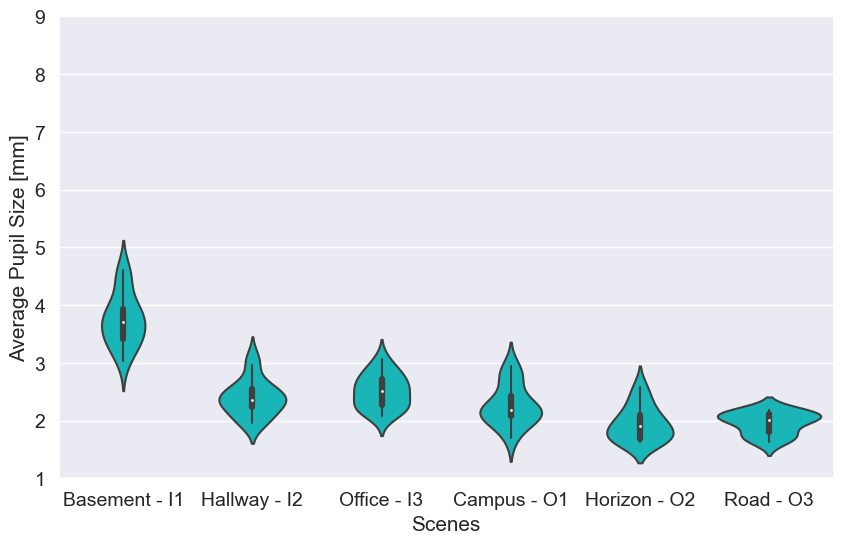

In [292]:
############################################################################
###########Violin Plots for Pupilsize over all six environments#############
############################################################################
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd


pupil_list_all = [avr_pupil_S1, avr_pupil_S2, avr_pupil_S3, avr_pupil_S4, avr_pupil_S5, avr_pupil_S6]
for i in pupil_list_all:
    print(len(i))

df_pupil = pd.DataFrame(pupil_list_all).T

column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_pupil.columns = column_names


plt.figure(figsize=(10, 6))
sea.violinplot(data=df_pupil, color="darkturquoise")
plt.xlabel('Scenes', fontsize=15, family='Arial')
plt.ylabel('Average Pupil Size [mm]', fontsize=15, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(1,9)

17
17
17
14
13
12
    Basement - I1  Hallway - I2  Office - I3  Campus - O1  Horizon - O2  \
0        1.115014      1.176623     1.095050     0.523955      0.848069   
1        1.179760      0.764380     1.022610     1.062011      1.003442   
2        1.621823      1.514647     1.393922     1.363922      1.532708   
3        0.825089      0.796432     0.675968     0.665270      1.151145   
4        1.556057      1.394875     0.699849     1.058548      1.069576   
5        1.096864      0.943289     1.001733     0.420230      0.622665   
6        1.127536      0.900787     0.798786     0.611557      0.834460   
7        1.360840      1.116321     1.107972     0.934056      1.284555   
8        0.830261      0.902535     0.329758     0.954654      0.759157   
9        1.105070      0.919676     0.691750     1.258891      1.781578   
10       1.380796      1.059457     1.231209     1.188312      1.216856   
11       0.242664      0.832362     0.730471     1.036516      1.168702   
12     

(0.0, 2.5)

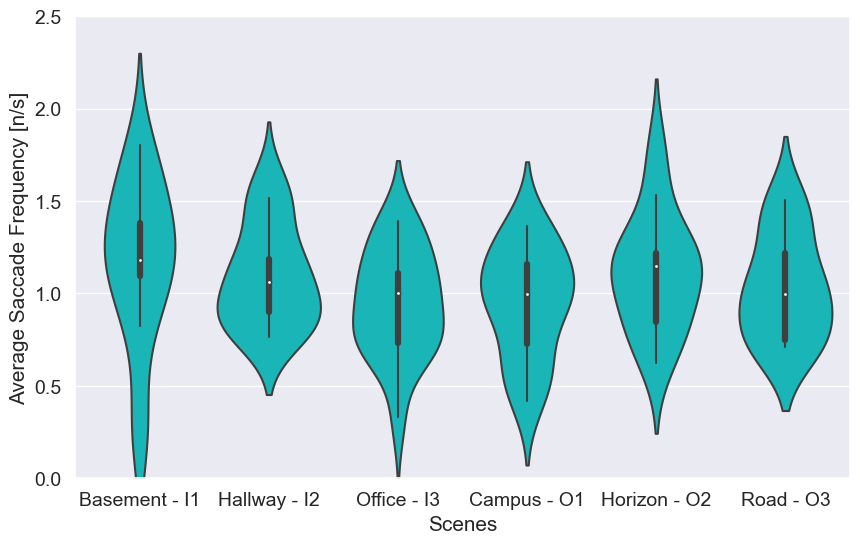

In [293]:
############################################################################
###########Violin Plots for Saccade frequency over all six environments#############
############################################################################
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd

nr_sacc_all = [freq_sacc_S1, freq_sacc_S2, freq_sacc_S3, freq_sacc_S4, freq_sacc_S5, freq_sacc_S6]
for i in nr_sacc_all:
    print(len(i))

df_sacc_all = pd.DataFrame(nr_sacc_all).T

column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_sacc_all.columns = column_names

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_sacc_all, color="darkturquoise")
plt.xlabel('Scenes', fontsize=15, family='Arial')
plt.ylabel('Average Saccade Frequency [n/s]', fontsize=15, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(0,2.5)




17
17
17
14
13
12
    Basement - I1  Hallway - I2  Office - I3  Campus - O1  Horizon - O2  \
0          211.80        224.73       258.49       195.30        241.46   
1          235.30        201.72       250.92       210.78        202.72   
2          242.41        249.11       224.60       246.97        226.89   
3          249.99        201.85       219.53       233.19        234.70   
4          256.39        229.49       213.63       213.33        226.74   
5          221.28        239.31       216.49       162.41        181.29   
6          262.46        212.54       230.75       234.91        203.92   
7          203.17        194.18       192.44       238.88        231.30   
8          190.60        200.78       190.05       201.11        211.33   
9          210.95        207.17       211.01       240.50        233.76   
10         222.91        210.53       214.66       236.36        221.13   
11         234.69        186.96       226.13       200.62        215.38   
12     

(100.0, 600.0)

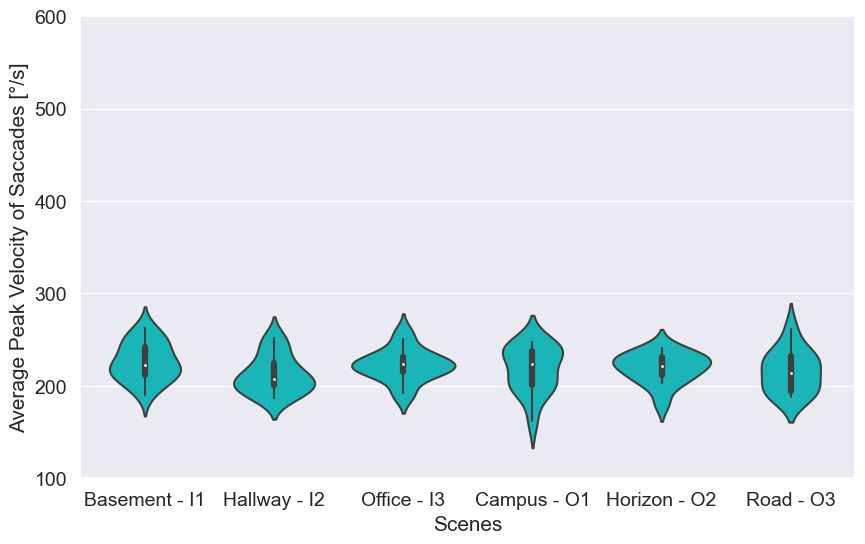

In [294]:
############################################################################
###########Violin Plots for Saccade velocity over all six environments#############
############################################################################
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd

avr_peak_velo_all = [avr_peak_velo_S1, avr_peak_velo_S2, avr_peak_velo_S3, avr_peak_velo_S4, avr_peak_velo_S5, avr_peak_velo_S6]
for i in avr_peak_velo_all:
    print(len(i))

df_velo_all = pd.DataFrame(avr_peak_velo_all).T

column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_velo_all.columns = column_names


print(df_velo_all)
plt.figure(figsize=(10, 6))
sea.violinplot(data=df_velo_all,color="darkturquoise")
plt.xlabel('Scenes', fontsize=15, family='Arial')
plt.ylabel('Average Peak Velocity of Saccades [°/s]', fontsize=15, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(100,600)

17
17
17
14
13
12
    Basement - I1  Hallway - I2  Office - I3  Campus - O1  Horizon - O2  \
0            4.65          5.47         5.01         4.74          6.78   
1            6.81          6.27         7.48         6.01          4.34   
2            7.62          9.86         7.36         7.94          6.39   
3            6.71          5.98         6.49         7.68          7.67   
4            7.13          7.35         5.85         6.38          6.00   
5            7.67          8.56         7.46         4.47          6.37   
6            8.90          7.24         6.50         8.19          6.19   
7            8.07          8.45         7.92         7.15          7.64   
8            8.08          9.09         7.40         4.38          7.50   
9            6.36          7.43         7.04        10.16          5.62   
10           6.98          6.84         6.78         8.43          8.74   
11           6.81          4.93         6.70         7.77          6.91   
12     

(0.0, 15.0)

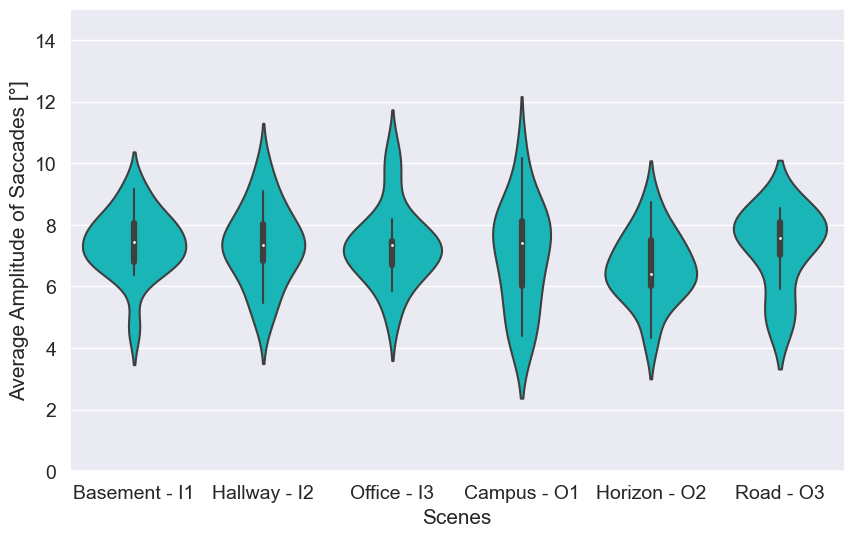

In [295]:
############################################################################
###########Violin Plots for Saccade amplitude over all six environments#############
############################################################################
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd

avr_amp_all = [avr_amp_S1, avr_amp_S2, avr_amp_S3, avr_amp_S4, avr_amp_S5, avr_amp_S6]
for i in avr_amp_all:
    print(len(i))
df_amp_all = pd.DataFrame(avr_amp_all).T

column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_amp_all.columns = column_names

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_amp_all,color="darkturquoise")
plt.xlabel('Scenes', fontsize=15, family='Arial')
plt.ylabel('Average Amplitude of Saccades [°]', fontsize=15, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(0,15)



17
17
17
14
13
12
    Basement - I1  Hallway - I2  Office - I3  Campus - O1  Horizon - O2  \
0        2.536333      3.141690     3.367570     1.963865      2.268294   
1        1.506796      1.002737     1.294767     1.454588      2.093276   
2        2.010899      1.612877     1.631002     1.651282      2.592487   
3        1.601153      1.576442     1.199429     0.975457      1.541568   
4        2.321802      1.809234     1.109115     2.437063      2.648095   
5        1.841756      1.787725     1.765163     1.355454      1.152937   
6        1.646036      1.379577     1.466491     0.961021      1.218071   
7        1.501750      1.279787     1.251596     1.768910      2.329265   
8        1.300610      1.169194     0.432807     2.325960      1.877476   
9        1.485443      1.243333     0.928919     1.953316      2.848110   
10       2.057105      1.718124     1.828421     1.504914      1.404692   
11       1.731002      1.371648     1.623271     1.114666      1.681011   
12     

(0.0, 5.0)

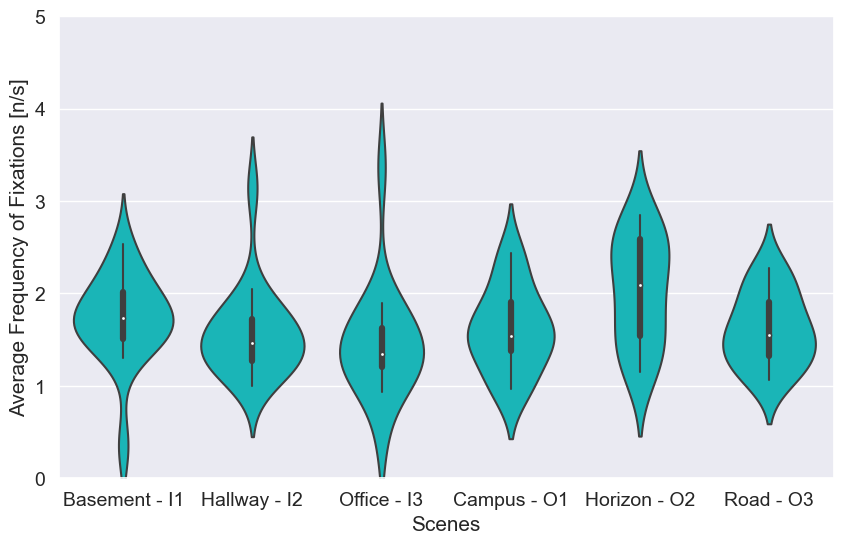

In [296]:
############################################################################
###########Violin Plots for frequency of fixations over all six environments#############
############################################################################
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd

freq_fix_all = [freq_fix_S1, freq_fix_S2, freq_fix_S3, freq_fix_S4, freq_fix_S5, freq_fix_S6]
for i in freq_fix_all:
    print(len(i))

df_fix_all = pd.DataFrame(freq_fix_all).T

column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_fix_all.columns = column_names

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_fix_all, color="darkturquoise")
plt.xlabel('Scenes', fontsize=15)
plt.ylabel('Average Frequency of Fixations [n/s]', fontsize=15, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(0,5)



17
17
17
14
13
12


(0.0, 3500.0)

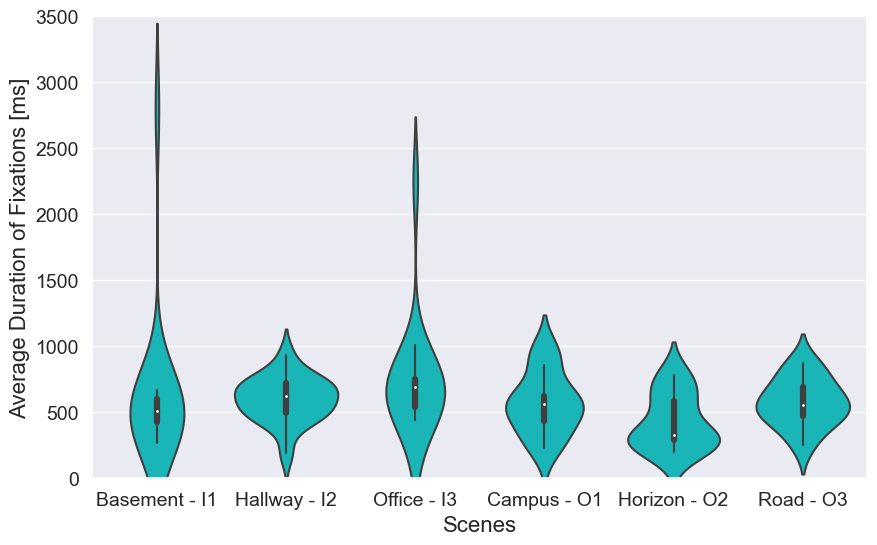

In [297]:
############################################################################
###########Violin Plots for fixation duration over all six environments#####
############################################################################
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd

avr_dur_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avr_fix_dur_S4, avr_fix_dur_S5, avr_dur_fix_S6]
for i in avr_dur_all:
    print(len(i))

df_dur_all = pd.DataFrame(avr_dur_all).T

column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_dur_all.columns = column_names

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_dur_all,color="darkturquoise")
plt.xlabel('Scenes', fontsize=16, family='Arial')
plt.ylabel('Average Duration of Fixations [ms]', fontsize=16, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(0, 3500)

In [485]:
############################################################################
###########Extract light data (Melaopic and photopic) for all scenes#############
############################################################################
import statistics
import numpy as np
import pandas as pd

#Creat data dictionary
data_dict = {}

def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Convert number to float before comparison
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Light/mcs15.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # TO work with floats as well as with integers
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))

photopic_S1 = []
photopic_S2 = []
photopic_S3 = []    
photopic_S4 = []
photopic_S5 = []
photopic_S6 = []
melanopic_S1 = []
melanopic_S2 = []
melanopic_S3 = []
melanopic_S4 = []
melanopic_S5 = []
melanopic_S6 = []
count = 101
for participant in data_dict:
    if len(photopic_S1) < 18:
        if count not in (102,120):
            S1_photopic = data_dict.get(count, {})
            S1_photopic_data_list = list(S1_photopic.values())
            #print(S1_participant_data_list)
            S_float_list = [item[0] for item in S1_photopic_data_list]
            photopic_S1.append(S_float_list[1])
            count = count + 1
            
        else:
            count = count + 1
            continue
    else: 
        break

count = 101
for participant in data_dict:
    if len(melanopic_S1) < 18:
        if count not in (102,120):
            S1_melanopic = data_dict.get(count, {})
            S1_melanopic_data_list = list(S1_melanopic.values())
            #print(S1_participant_data_list)
            S_float_list = [item[0] for item in S1_melanopic_data_list]
            melanopic_S1.append(S_float_list[2])
            count = count + 1
            
        else:
            count = count + 1
            continue
    else: 
        break        

count = 101
for participant in data_dict:
    if len(photopic_S2) < 18:
        if count not in (102,120):
            S2_photopic = data_dict.get(count, {})
            S2_photopic_data_list = list(S2_photopic.values())
            #print(S1_participant_data_list)
            S_float_list = [item[0] for item in S2_photopic_data_list]
            photopic_S2.append(S_float_list[3])
            count = count + 1
            
        else:
            count = count + 1
            continue
    else: 
        break

count = 101
for participant in data_dict:
    if len(melanopic_S2) < 18:
        if count not in (102,120):
            S2_melanopic = data_dict.get(count, {})
            S2_melanopic_data_list = list(S2_melanopic.values())
            #print(S1_participant_data_list)
            S_float_list = [item[0] for item in S2_melanopic_data_list]
            melanopic_S2.append(S_float_list[4])
            count = count + 1
            
        else:
            count = count + 1
            continue
    else: 
        break
        
count = 101
for participant in data_dict:
    if len(photopic_S3) < 18:
        if count not in (102,120):
            S3_photopic = data_dict.get(count, {})
            S3_photopic_data_list = list(S3_photopic.values())
            #print(S1_participant_data_list)
            S_float_list = [item[0] for item in S3_photopic_data_list]
            photopic_S3.append(S_float_list[5])
            count = count + 1
            
        else:
            count = count + 1
            continue
    else: 
        break

count = 101
for participant in data_dict:
    if len(melanopic_S3) < 18:
        if count not in (102,120):
            S3_melanopic = data_dict.get(count, {})
            S3_melanopic_data_list = list(S3_melanopic.values())
            #print(S1_participant_data_list)
            S_float_list = [item[0] for item in S3_melanopic_data_list]
            melanopic_S3.append(S_float_list[6])
            count = count + 1
            
        else:
            count = count + 1
            continue
    else: 
        break
                    
count = 101
for participant in data_dict:
    if len(photopic_S4) < 18:
        if count not in (101,106,108,110):
            if count not in (102,120):
                S4_photopic = data_dict.get(count, {})
                S4_photopic_data_list = list(S4_photopic.values())
                #print(S1_participant_data_list)
                S_float_list = [item[0] for item in S4_photopic_data_list]
                photopic_S4.append(S_float_list[7])
                count = count + 1
            else:
                S4_photopic = data_dict.get(count, {})
                S4_photopic_data_list = list(S4_photopic.values())
                #print(S1_participant_data_list)
                S_float_list = [item[0] for item in S4_photopic_data_list]
                photopic_S4.append(S_float_list[1])
                count = count + 1
        else:
            count = count + 1
            continue
    else: 
        break

count = 101
for participant in data_dict:
    if len(melanopic_S4) < 18:
        if count not in (101,106,108,110):
            if count not in (102,120):
                S4_melanopic = data_dict.get(count, {})
                S4_melanopic_data_list = list(S4_melanopic.values())
                #print(S1_participant_data_list)
                S_float_list = [item[0] for item in S4_melanopic_data_list]
                melanopic_S4.append(S_float_list[8])
                count = count + 1
            else:
                S4_melanopic = data_dict.get(count, {})
                S4_melanopic_data_list = list(S4_melanopic.values())
                #print(S1_participant_data_list)
                S_float_list = [item[0] for item in S4_melanopic_data_list]
                melanopic_S4.append(S_float_list[2])
                count = count + 1
        else:
            count = count + 1
            continue
    else: 
        break
        
count = 101
for participant in data_dict:
    if len(photopic_S5) < 18:
        if count not in (102,106,108,110,113):
            if count not in (102,120):
                S5_photopic = data_dict.get(count, {})
                S5_photopic_data_list = list(S5_photopic.values())
                #print(S1_participant_data_list)
                S_float_list = [item[0] for item in S5_photopic_data_list]
                photopic_S5.append(S_float_list[9])
                count = count + 1
            else:
                S5_photopic = data_dict.get(count, {})
                S5_photopic_data_list = list(S5_photopic.values())
                #print(S1_participant_data_list)
                S_float_list = [item[0] for item in S5_photopic_data_list]
                photopic_S5.append(S_float_list[3])
                count = count + 1
        else:
            count = count + 1
            continue
    else: 
        break

count = 101
for participant in data_dict:
    if len(melanopic_S5) < 18:
        if count not in (102,106,108,110,113):
            if count not in (102,120):
                S5_melanopic = data_dict.get(count, {})
                S5_melanopic_data_list = list(S5_melanopic.values())
                #print(S1_participant_data_list)
                S_float_list = [item[0] for item in S5_melanopic_data_list]
                melanopic_S5.append(S_float_list[10])
                count = count + 1
            else:
                S5_melanopic = data_dict.get(count, {})
                S5_melanopic_data_list = list(S5_melanopic.values())
                #print(S1_participant_data_list)
                S_float_list = [item[0] for item in S5_melanopic_data_list]
                melanopic_S5.append(S_float_list[4])
                count = count + 1
        else:
            count = count + 1
            continue
    else: 
        break
        
count = 101
for participant in data_dict:
    if len(photopic_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113):
            if count not in (121,120):
                S6_photopic = data_dict.get(count, {})
                S6_photopic_data_list = list(S6_photopic.values())
                #print(S1_participant_data_list)
                S_float_list = [item[0] for item in S6_photopic_data_list]
                photopic_S6.append(S_float_list[11])
                count = count + 1
            else:
                S6_photopic = data_dict.get(count, {})
                S6_photopic_data_list = list(S6_photopic.values())
                #print(S1_participant_data_list)
                S_float_list = [item[0] for item in S6_photopic_data_list]
                photopic_S6.append(S_float_list[5])
                count = count + 1
        else:
            count = count + 1
            continue
    else: 
        break

count = 101
for participant in data_dict:
    if len(melanopic_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113):
            if count not in (102,120):
                S6_melanopic = data_dict.get(count, {})
                S6_melanopic_data_list = list(S6_melanopic.values())
                #print(S1_participant_data_list)
                S_float_list = [item[0] for item in S6_melanopic_data_list]
                melanopic_S6.append(S_float_list[12])
                count = count + 1
            else:
                S6_melanopic = data_dict.get(count, {})
                S6_melanopic_data_list = list(S6_melanopic.values())
                #print(S1_participant_data_list)
                S_float_list = [item[0] for item in S6_melanopic_data_list]
                melanopic_S6.append(S_float_list[6])
                count = count + 1
        else:
            count = count + 1
            continue
    else: 
        break
        
mean_melS1 = sum(melanopic_S1)/len(melanopic_S1)
mean_melS2 = sum(melanopic_S2)/len(melanopic_S2)
mean_melS3 = sum(melanopic_S3)/len(melanopic_S3)
mean_melS4 = sum(melanopic_S4)/len(melanopic_S4)
mean_melS5 = sum(melanopic_S5)/len(melanopic_S5)
mean_melS6 = sum(melanopic_S6)/len(melanopic_S6)
mean_phoS1 = sum(photopic_S1)/len(photopic_S1)
mean_phoS2 = sum(photopic_S2)/len(photopic_S2)
mean_phoS3 = sum(photopic_S3)/len(photopic_S3)
mean_phoS4 = sum(photopic_S4)/len(photopic_S4)
mean_phoS5 = sum(photopic_S5)/len(photopic_S5)
mean_phoS6 = sum(photopic_S6)/len(photopic_S6)
mean_melin = sum(melanopic_S1+melanopic_S2+melanopic_S3)/len(melanopic_S1+melanopic_S2+melanopic_S3)
tot_mel_in = melanopic_S1+melanopic_S2+melanopic_S3
tot_mel_out = melanopic_S4+melanopic_S5+melanopic_S6
tot_pho_in = photopic_S1+photopic_S2+photopic_S3
tot_pho_out = photopic_S4+photopic_S5+photopic_S6
mean_phoin = sum(photopic_S1+photopic_S2+photopic_S3)/len(photopic_S1+photopic_S2+photopic_S3)
mean_melout = sum(melanopic_S4+melanopic_S5+melanopic_S6)/len(melanopic_S4+melanopic_S5+melanopic_S6)
mean_phoout = sum(photopic_S4+photopic_S5+photopic_S6)/len(photopic_S4+photopic_S5+photopic_S6)
print("mean Photo S1: "+str(mean_phoS1))
print("mean Photo S2: "+str(mean_phoS2))
print("mean Photo S3: "+str(mean_phoS3))
print("mean Photo S4: "+str(mean_phoS4))
print("mean Photo S5: "+str(mean_phoS5))
print("mean Photo S6: "+str(mean_phoS6))
print("mean Melano S1: "+str(mean_melS1))
print("mean Melano S2: "+str(mean_melS2))
print("mean Melano S3: "+str(mean_melS3))
print("mean Melano S4: "+str(mean_melS4))
print("mean Melano S5: "+str(mean_melS5))
print("mean Melano S6: "+str(mean_melS6))
print("mean Melano IN: "+str(mean_melin))
print("mean Melano OUT: "+str(mean_melout))
print("mean Photo IN: "+str(mean_phoin))
print("mean Photo OUT: "+str(mean_phoout))
print("min Pho Out: "+str(min(tot_pho_out)))
print("max Pho Out: "+str(max(tot_pho_out)))
print("min Mel Out: "+str(min(tot_mel_out)))
print("max Mel Out: "+str(max(tot_mel_out)))
print("min Pho In: "+str(min(tot_pho_in)))
print("max Pho In: "+str(max(tot_pho_in)))
print("min Mel In: "+str(min(tot_mel_in)))
print("max Mel In: "+str(max(tot_mel_in)))
#print("Photo_in_liste: "+ str(tot_pho_in))
std_deviation = statistics.stdev(tot_pho_in)
#print("Photo_out_liste: "+ str(tot_pho_out))
std_deviation = statistics.stdev(tot_pho_out)



{101.0: {'Participant': [101.0], 'Photopic S1': [150.7], 'Melanopic S1 (W/m_)': [78.43], 'Photopic S2': [1069.0], 'Melanopic S2': [837.8], 'Photopic S3': [717.9], 'Melanopic S3': [589.7], 'Photopic S4': [18080.0], 'Melanopic S4': [16350.0], 'Photopic S5': [11810.0], 'Melanopic S5': [11620.0], 'Photopic S6': [9506.0], 'Melanopic S6': [9137.0]}, 102.0: {'Participant': [102.0], 'Photopic S4': [13010.0], 'Melanopic S4': [11850.0], 'Photopic S5': [11250.0], 'Melanopic S5': [11380.0], 'Photopic S6': [8261.0], 'Melanopic S6': [8148.0]}, 103.0: {'Participant': [103.0], 'Photopic S1': [141.6], 'Melanopic S1 (W/m_)': [73.64], 'Photopic S2': [485.1], 'Melanopic S2': [323.7], 'Photopic S3': [508.0], 'Melanopic S3': [389.1], 'Photopic S4': [4964.0], 'Melanopic S4': [4524.0], 'Photopic S5': [13520.0], 'Melanopic S5': [12930.0], 'Photopic S6': [5707.0], 'Melanopic S6': [5462.0]}, 104.0: {'Participant': [104.0], 'Photopic S1': [154.1], 'Melanopic S1 (W/m_)': [81.03], 'Photopic S2': [1017.0], 'Melanopi

In [1]:
import pandas as pd

Photopic_data = [photopic_S1, photopic_S2, photopic_S3, photopic_S4, photopic_S5, photopic_S6]

df_illu = pd.DataFrame(Photopic_data).T

column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]

df_illu.columns = column_names
####
print(df_illu)
plt.figure(figsize=(10, 6))
sea.boxplot(data=df_illu,color="darkturquoise")
plt.xlabel('Scenes',family='Arial', fontsize=15)
plt.ylabel('Photopic Illuminance [lux]',family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yscale('log')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(100, 60000)

NameError: name 'photopic_S1' is not defined

In [ ]:
import pandas as pd

dataset_mel_all = [melanopic_S1, melanopic_S2, melanopic_S3, melanopic_S4, melanopic_S5, melanopic_S6]
df_mel = pd.DataFrame(dataset_mel_all).T
print(df_mel)
column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_mel.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.boxplot(data=df_mel, color="darkturquoise")
plt.xlabel('Scenes',family='Arial', fontsize=15)
plt.ylabel('Melanopic irradiance [W/m^2]',family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial',)
plt.yscale('log')
plt.yticks(fontsize=14, family='Arial',)
plt.ylim(50, 20000)

In [6]:
###Here, all questionnaire data is put into different lists which can then be further processed
import pandas as pd
import numpy as np

#Defining a function to validate that fields in the opened file are not empty 
def is_valid_value(value):
    return not pd.isnull(value) and value != ""

data_dict_Q = {}
csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/Used for code/Questionnaires/INDOOR PMQ-Tabelle 1.csv"
df_Q = pd.read_csv(csv_file_path, sep=",")

for index, row in df_Q.iterrows():
    participant = row["Participant"]

    if participant not in data_dict_Q:
        data_dict_Q[participant] = {}

    for column in df_Q.columns:
        col_name = column
        if is_valid_value(row[column]):
            if col_name not in data_dict_Q[participant]:
                data_dict_Q[participant][col_name] = []
                value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict_Q[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict_Q[participant][col_name].append(float(str(value).replace(',', '.')))
########Scene 1#######

S1_Q1 = []
count = 101
for participant in data_dict_Q:
    if len(S1_Q1) < 18:
        if count not in (120,121):
            S1_Q1_participant = data_dict_Q.get(count, {})
            S1_Q1_participant_data_list = list(S1_Q1_participant.values())
            #print(S6_participant_data_list)
            S1_Q1_float_list = [item[0] for item in S1_Q1_participant_data_list]
            #print(S1_Q1_float_list)
            S1_Q1.append(S1_Q1_float_list[1])
            count = count + 1
        else: 
            count = count + 1
            continue
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)
del S1_Q1[1]
print("S1Q1")
print(S1_Q1)

S1Q1_sum = 0
for i in S1_Q1:
    S1Q1_sum = S1Q1_sum + i
mean_S1Q1 = S1Q1_sum/18

S1_Q2 = []
count = 101
for participant in data_dict_Q:
    if len(S1_Q2) < 18:
        if count not in (120,121):
            S1_Q2_participant = data_dict_Q.get(count, {})
            S1_Q2_participant_data_list = list(S1_Q2_participant.values())
            #print(S6_participant_data_list)
            S1_Q2_float_list = [item[0] for item in S1_Q2_participant_data_list]
            #print(S6_float_list)
            S1_Q2.append(S1_Q2_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)
del S1_Q2[1]
S1Q2_sum = 0
for i in S1_Q2:
    S1Q2_sum = S1Q2_sum + i
mean_S1Q2 = S1Q2_sum/18


S1_Q3 = []
count = 101
for participant in data_dict_Q:
    if len(S1_Q3) < 18:
        if count not in (120,121):
            S1_Q3_participant = data_dict_Q.get(count, {})
            S1_Q3_participant_data_list = list(S1_Q3_participant.values())
            #print(S6_participant_data_list)
            S1_Q3_float_list = [item[0] for item in S1_Q3_participant_data_list]
            #print(S6_float_list)
            S1_Q3.append(S1_Q3_float_list[3])
            count = count + 1
        else: 
            count = count + 1
            continue
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)
del S1_Q3[1]
S1Q3_sum = 0
for i in S1_Q3:
    S1Q3_sum = S1Q3_sum + i
mean_S1Q3 = S1Q3_sum/18

S1_Q4 = []
count = 101
for participant in data_dict_Q:
    if len(S1_Q4) < 18:
        if count not in (120,121):
            S1_Q4_participant = data_dict_Q.get(count, {})
            S1_Q4_participant_data_list = list(S1_Q4_participant.values())
            #print(S6_participant_data_list)
            S1_Q4_float_list = [item[0] for item in S1_Q4_participant_data_list]
            #print(S6_float_list)
            S1_Q4.append(S1_Q4_float_list[4])
            count = count + 1
        else: 
            count = count + 1
            continue
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)
del S1_Q4[1]
S1Q4_sum = 0
for i in S1_Q4:
    S1Q4_sum = S1Q4_sum + i
mean_S1Q4 = S1Q4_sum/18

S1_Q5 = []
count = 101
for participant in data_dict_Q:
    if len(S1_Q5) < 18:
        if count not in (120,121):
            S1_Q5_participant = data_dict_Q.get(count, {})
            S1_Q5_participant_data_list = list(S1_Q5_participant.values())
            #print(S6_participant_data_list)
            S1_Q5_float_list = [item[0] for item in S1_Q5_participant_data_list]
            #print(S6_float_list)
            S1_Q5.append(S1_Q5_float_list[5])
            count = count + 1
        else: 
            count = count + 1
            continue
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)
del S1_Q5[1]
S1Q5_sum = 0
for i in S1_Q5:
    S1Q5_sum = S1Q5_sum + i
mean_S1Q5 = S1Q5_sum/18

########SZENE 2#######
S2_Q1 = []
count = 101
for participant in data_dict_Q:
    if len(S2_Q1) < 18:
        if count not in (120,121):
            S2_Q1_participant = data_dict_Q.get(count, {})
            S2_Q1_participant_data_list = list(S2_Q1_participant.values())
            #print(S6_participant_data_list)
            S2_Q1_float_list = [item[0] for item in S2_Q1_participant_data_list]
            #print(S6_float_list)
            S2_Q1.append(S2_Q1_float_list[6])
            count = count + 1
        else: 
            count = count + 1
            continue
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)
del S2_Q1[1]
S2Q1_sum = 0
for i in S2_Q1:
    S2Q1_sum = S2Q1_sum + i
mean_S2Q1 = S2Q1_sum/18

S2_Q2 = []
count = 101
for participant in data_dict_Q:
    if len(S2_Q2) < 18:
        if count not in (120,121):
            S2_Q2_participant = data_dict_Q.get(count, {})
            S2_Q2_participant_data_list = list(S2_Q2_participant.values())
            #print(S6_participant_data_list)
            S2_Q2_float_list = [item[0] for item in S2_Q2_participant_data_list]
            #print(S6_float_list)
            S2_Q2.append(S2_Q2_float_list[7])
            count = count + 1
        else: 
            count = count + 1
            continue
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)
del S2_Q2[1]
S2Q2_sum = 0
for i in S2_Q2:
    S2Q2_sum = S2Q2_sum + i
mean_S2Q2 = S2Q2_sum/18


S2_Q3 = []
count = 101
for participant in data_dict_Q:
    if len(S2_Q3) < 18:
        if count not in (120,121):
            S2_Q3_participant = data_dict_Q.get(count, {})
            S2_Q3_participant_data_list = list(S2_Q3_participant.values())
            #print(S6_participant_data_list)
            S2_Q3_float_list = [item[0] for item in S2_Q3_participant_data_list]
            #print(S6_float_list)
            S2_Q3.append(S2_Q3_float_list[8])
            count = count + 1
        else: 
            count = count + 1
            continue
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)
del S2_Q3[1]
S2Q3_sum = 0
for i in S2_Q3:
    S2Q3_sum = S2Q3_sum + i
mean_S2Q3 = S2Q3_sum/18

S2_Q4 = []
count = 101
for participant in data_dict_Q:
    if len(S2_Q4) < 18:
        #if count != 112:
        if count not in (120,121):
            S2_Q4_participant = data_dict_Q.get(count, {})
            S2_Q4_participant_data_list = list(S2_Q4_participant.values())
            #print(S6_participant_data_list)
            S2_Q4_float_list = [item[0] for item in S2_Q4_participant_data_list]
            #print(S6_float_list)
            S2_Q4.append(S2_Q4_float_list[9])
            count = count + 1
        else: 
            count = count + 1
            continue
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)
del S2_Q4[1]
S2Q4_sum = 0
for i in S2_Q4:
    S2Q4_sum = S2Q4_sum + i
mean_S2Q4 = S2Q4_sum/18

S2_Q5 = []
count = 101
for participant in data_dict_Q:
    if len(S2_Q5) < 18:
        if count not in (120,121):
            S2_Q5_participant = data_dict_Q.get(count, {})
            S2_Q5_participant_data_list = list(S2_Q5_participant.values())
            #print(S6_participant_data_list)
            S2_Q5_float_list = [item[0] for item in S2_Q5_participant_data_list]
            #print(S6_float_list)
            S2_Q5.append(S2_Q5_float_list[10])
            count = count + 1
        else: 
            count = count + 1
            continue
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)
del S2_Q5[1]
S2Q5_sum = 0
for i in S2_Q5:
    S2Q5_sum = S2Q5_sum + i
mean_S2Q5 = S2Q5_sum/18




######SZENE 3#######
S3_Q1 = []
count = 101
for participant in data_dict_Q:
    if len(S3_Q1) < 18:
        if count not in (120,121):
            S3_Q1_participant = data_dict_Q.get(count, {})
            S3_Q1_participant_data_list = list(S3_Q1_participant.values())
            #print(S6_participant_data_list)
            S3_Q1_float_list = [item[0] for item in S3_Q1_participant_data_list]
            #print(S6_float_list)
            S3_Q1.append(S3_Q1_float_list[11])
            count = count + 1
        else: 
            count = count + 1
            continue
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)
del S3_Q1[1]
S3Q1_sum = 0
for i in S3_Q1:
    S3Q1_sum = S3Q1_sum + i
mean_S3Q1 = S3Q1_sum/18
i=0
S3_Q2 = []
count = 101
for participant in data_dict_Q:
    if len(S3_Q2) < 18:
        if count not in (120,121):
            S3_Q2_participant = data_dict_Q.get(count, {})
            S3_Q2_participant_data_list = list(S3_Q2_participant.values())
            #print(S6_participant_data_list)
            S3_Q2_float_list = [item[0] for item in S3_Q2_participant_data_list]
            #print(S6_float_list)
            S3_Q2.append(S3_Q2_float_list[12])
            count = count + 1
        else: 
            count = count + 1
            continue
del S3_Q2[1]
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)

S3Q2_sum = 0
for i in S3_Q2:
    S3Q2_sum = S3Q2_sum + i
mean_S3Q2 = S3Q2_sum/18

S3_Q3 = []
count = 101
for participant in data_dict_Q:
    if len(S3_Q3) < 18:
        if count not in (120,121):
            S3_Q3_participant = data_dict_Q.get(count, {})
            S3_Q3_participant_data_list = list(S3_Q3_participant.values())
            #print(S6_participant_data_list)
            S3_Q3_float_list = [item[0] for item in S3_Q3_participant_data_list]
            #print(S6_float_list)
            S3_Q3.append(S3_Q3_float_list[13])
            count = count + 1
        else: 
            count = count + 1
            continue
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)
del S3_Q3[1]
S3Q3_sum = 0
for i in S3_Q3:
    S3Q3_sum = S3Q3_sum + i
mean_S3Q3 = S3Q3_sum/18

S3_Q4 = []
count = 101
for participant in data_dict_Q:
    if len(S3_Q4) < 18:
        if count not in (120,121):
            S3_Q4_participant = data_dict_Q.get(count, {})
            S3_Q4_participant_data_list = list(S3_Q4_participant.values())
            #print(S6_participant_data_list)
            S3_Q4_float_list = [item[0] for item in S3_Q4_participant_data_list]
            #print(S6_float_list)
            S3_Q4.append(S3_Q4_float_list[14])
            count = count + 1
        else: 
            count = count + 1
            continue
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)
del S3_Q4[1]
S3Q4_sum = 0
for i in S3_Q4:
    S3Q4_sum = S3Q4_sum + i
mean_S3Q4 = S3Q4_sum/18

S3_Q5 = []
count = 101
for participant in data_dict_Q:
    if len(S3_Q5) < 18:
        if count not in (120,121):
            S3_Q5_participant = data_dict_Q.get(count, {})
            S3_Q5_participant_data_list = list(S3_Q5_participant.values())
            #print(S6_participant_data_list)
            S3_Q5_float_list = [item[0] for item in S3_Q5_participant_data_list]
            #print(S6_float_list)
            S3_Q5.append(S3_Q5_float_list[15])
            count = count + 1
        else: 
            count = count + 1
            continue
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)
del S3_Q5[1]
S3Q5_sum = 0
for i in S3_Q5:
    S3Q5_sum = S3Q5_sum + i
mean_S3Q5 = S3Q5_sum/18

######SZENE 4#######
S4_Q1 = []
count = 101
for participant in data_dict_Q:
    if len(S4_Q1) < 18:
        if count not in (120,121):
            S4_Q1_participant = data_dict_Q.get(count, {})
            S4_Q1_participant_data_list = list(S4_Q1_participant.values())
            S4_Q1_float_list = [item[0] for item in S4_Q1_participant_data_list]
            S4_Q1.append(S4_Q1_float_list[16])
            count = count + 1
        else: 
            count = count + 1
            continue

del S4_Q1[0]
del S4_Q1[5]
del S4_Q1[7]
del S4_Q1[9]
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)

S4Q1_sum = 0
for i in S4_Q1:
    S4Q1_sum = S4Q1_sum + i
mean_S4Q1 = S4Q1_sum/18

S4_Q2 = []
count = 101
for participant in data_dict_Q:
    if len(S4_Q2) < 18:
        if count not in (120,121):
            S4_Q2_participant = data_dict_Q.get(count, {})
            S4_Q2_participant_data_list = list(S4_Q2_participant.values())
            #print(S6_participant_data_list)
            S4_Q2_float_list = [item[0] for item in S4_Q2_participant_data_list]
            #print(S6_float_list)
            S4_Q2.append(S4_Q2_float_list[17])
            count = count + 1
        else: 
            count = count + 1
            continue
del S4_Q2[0]
del S4_Q2[5]
del S4_Q2[7]
del S4_Q2[9]
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)
S4Q2_sum = 0
for i in S4_Q2:
    S4Q2_sum = S4Q2_sum + i
mean_S4Q2 = S4Q2_sum/18

S4_Q3 = []
count = 101
for participant in data_dict_Q:
    if len(S4_Q3) < 18:
        if count not in (122,121):
            S4_Q3_participant = data_dict_Q.get(count, {})
            S4_Q3_participant_data_list = list(S4_Q3_participant.values())
            #print(S6_participant_data_list)
            S4_Q3_float_list = [item[0] for item in S4_Q3_participant_data_list]
            #print(S6_float_list)
            S4_Q3.append(S4_Q3_float_list[18])
            count = count + 1
        else: 
            count = count + 1
            continue
del S4_Q3[0]
del S4_Q3[5]
del S4_Q3[7]
del S4_Q3[9]
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)
S4Q3_sum = 0
for i in S4_Q3:
    S4Q3_sum = S4Q3_sum + i
mean_S4Q3 = S4Q3_sum/18

S4_Q4 = []
count = 101
for participant in data_dict_Q:
    if len(S4_Q4) < 18:
        if count not in (122,121):
            S4_Q4_participant = data_dict_Q.get(count, {})
            S4_Q4_participant_data_list = list(S4_Q4_participant.values())
            #print(S6_participant_data_list)
            S4_Q4_float_list = [item[0] for item in S4_Q4_participant_data_list]
            #print(S6_float_list)
            S4_Q4.append(S4_Q4_float_list[19])
            count = count + 1
        else: 
            count = count + 1
            continue
del S4_Q4[0]
del S4_Q4[5]
del S4_Q4[7]
del S4_Q4[9]
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)

S4Q4_sum = 0
for i in S4_Q4:
    S4Q4_sum = S4Q4_sum + i
mean_S4Q4 = S4Q4_sum/18

S4_Q5 = []
count = 101
for participant in data_dict_Q:
    if len(S4_Q5) < 18:
        #if count != 112:
        if count not in (122,121):
            S4_Q5_participant = data_dict_Q.get(count, {})
            S4_Q5_participant_data_list = list(S4_Q5_participant.values())
            #print(S6_participant_data_list)
            S4_Q5_float_list = [item[0] for item in S4_Q5_participant_data_list]
            #print(S6_float_list)
            S4_Q5.append(S4_Q5_float_list[20])
            count = count + 1
        else: 
            count = count + 1
            continue
del S4_Q5[0]
del S4_Q5[5]
del S4_Q5[7]
del S4_Q5[9]
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)

S4Q5_sum = 0
for i in S4_Q5:
    S4Q5_sum = S4Q5_sum + i
mean_S4Q5 = S4Q5_sum/18



######SZENE 5#######
S5_Q1 = []
count = 101
for participant in data_dict_Q:
    if len(S5_Q1) < 18:
        if count not in (120,1211):
            S5_Q1_participant = data_dict_Q.get(count, {})
            S5_Q1_participant_data_list = list(S5_Q1_participant.values())
            #print(S6_participant_data_list)
            S5_Q1_float_list = [item[0] for item in S5_Q1_participant_data_list]
            #print(S6_float_list)
            S5_Q1.append(S5_Q1_float_list[21])
            count = count + 1
        else: 
            count = count + 1
            continue
            
del S5_Q1[1]
del S5_Q1[5]
del S5_Q1[7]
del S5_Q1[9]
del S5_Q1[12]
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)

S5Q1_sum = 0
for i in S5_Q1:
    S5Q1_sum = S5Q1_sum + i
mean_S5Q1 = S5Q1_sum/18

S5_Q2 = []
count = 101
for participant in data_dict_Q:
    if len(S5_Q2) < 18:
        if count not in (122,121):
            S5_Q2_participant = data_dict_Q.get(count, {})
            S5_Q2_participant_data_list = list(S5_Q2_participant.values())
            #print(S6_participant_data_list)
            S5_Q2_float_list = [item[0] for item in S5_Q2_participant_data_list]
            #print(S6_float_list)
            S5_Q2.append(S5_Q2_float_list[22])
            count = count + 1
        else: 
            count = count + 1
            continue
del S5_Q2[1]
del S5_Q2[5]
del S5_Q2[7]
del S5_Q2[9]
del S5_Q2[12]
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)


S5_Q3 = []
count = 101
for participant in data_dict_Q:
    if len(S5_Q3) < 18:
        if count not in (120,121):
            S5_Q3_participant = data_dict_Q.get(count, {})
            S5_Q3_participant_data_list = list(S5_Q3_participant.values())
            #print(S6_participant_data_list)
            S5_Q3_float_list = [item[0] for item in S5_Q3_participant_data_list]
            #print(S6_float_list)
            S5_Q3.append(S5_Q3_float_list[23])
            count = count + 1
        else: 
            count = count + 1
            continue
del S5_Q3[1]
del S5_Q3[5]
del S5_Q3[7]
del S5_Q3[9]
del S5_Q3[12]
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)

S5Q3_sum = 0
for i in S5_Q3:
    S5Q3_sum = S5Q3_sum + i
mean_S5Q3 = S5Q3_sum/18

S5_Q4 = []
count = 101
for participant in data_dict_Q:
    if len(S5_Q4) < 18:
        if count not in (120,121):
            S5_Q4_participant = data_dict_Q.get(count, {})
            S5_Q4_participant_data_list = list(S5_Q4_participant.values())
            #print(S6_participant_data_list)
            S5_Q4_float_list = [item[0] for item in S5_Q4_participant_data_list]
            #print(S6_float_list)
            S5_Q4.append(S5_Q4_float_list[24])
            count = count + 1
        else: 
            count = count + 1
            continue
del S5_Q4[1]
del S5_Q4[5]
del S5_Q4[7]
del S5_Q4[9]
del S5_Q4[12]
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)

S5Q4_sum = 0
for i in S5_Q4:
    S5Q4_sum = S5Q4_sum + i
mean_S5Q4 = S5Q4_sum/18

S5_Q5 = []
count = 101
for participant in data_dict_Q:
    if len(S5_Q5) < 18:
        if count not in (121,212):
            S5_Q5_participant = data_dict_Q.get(count, {})
            S5_Q5_participant_data_list = list(S5_Q5_participant.values())
            #print(S6_participant_data_list)
            S5_Q5_float_list = [item[0] for item in S5_Q5_participant_data_list]
            #print(S6_float_list)
            S5_Q5.append(S5_Q5_float_list[25])
            count = count + 1
        else: 
            count = count + 1
            continue
del S5_Q5[1]
del S5_Q5[5]
del S5_Q5[7]
del S5_Q5[9]
del S5_Q5[12]
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)

S5Q5_sum = 0
for i in S5_Q5:
    S5Q5_sum = S5Q5_sum + i
mean_S5Q5 = S5Q5_sum/18

######SZENE 6#######
S6_Q1 = []
count = 101
for participant in data_dict_Q:
    if len(S6_Q1) < 18:
        if count not in (121,122):
            S6_Q1_participant = data_dict_Q.get(count, {})
            S6_Q1_participant_data_list = list(S6_Q1_participant.values())
            #print(S6_participant_data_list)
            S6_Q1_float_list = [item[0] for item in S6_Q1_participant_data_list]
            #print(S6_float_list)
            S6_Q1.append(S6_Q1_float_list[26])
            count = count + 1
        else: 
            count = count + 1
            continue
del S6_Q1[1]
del S6_Q1[3]
del S6_Q1[5]
del S6_Q1[7]
del S6_Q1[9]
del S6_Q1[12]
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)

S6Q1_sum = 0
for i in S6_Q1:
    S6Q1_sum = S6Q1_sum + i
mean_S6Q1 = S6Q1_sum/18

S6_Q2 = []
count = 101
for participant in data_dict_Q:
    if len(S6_Q2) < 18:
        if count not in (121,122):
            S6_Q2_participant = data_dict_Q.get(count, {})
            S6_Q2_participant_data_list = list(S6_Q2_participant.values())
            #print(S6_participant_data_list)
            S6_Q2_float_list = [item[0] for item in S6_Q2_participant_data_list]
            #print(S6_float_list)
            S6_Q2.append(S6_Q2_float_list[27])
            count = count + 1
        else: 
            count = count + 1
            continue
del S6_Q2[1]
del S6_Q2[3]
del S6_Q2[5]
del S6_Q2[7]
del S6_Q2[9]
del S6_Q2[12]
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)

S6Q2_sum = 0
for i in S6_Q2:
    S6Q2_sum = S6Q2_sum + i
mean_S6Q2 = S6Q2_sum/18

S6_Q3 = []
count = 101
for participant in data_dict_Q:
    if len(S6_Q3) < 18:
        if count not in (122,121):
            S6_Q3_participant = data_dict_Q.get(count, {})
            S6_Q3_participant_data_list = list(S6_Q3_participant.values())
            #print(S6_participant_data_list)
            S6_Q3_float_list = [item[0] for item in S6_Q3_participant_data_list]
            #print(S6_float_list)
            S6_Q3.append(S6_Q3_float_list[28])
            count = count + 1
        else: 
            count = count + 1
            continue
del S6_Q3[1]
del S6_Q3[3]
del S6_Q3[5]
del S6_Q3[7]
del S6_Q3[9]
del S6_Q3[12]
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)

S6Q3_sum = 0
for i in S6_Q3:
    S6Q3_sum = S6Q3_sum + i
mean_S6Q3 = S6Q3_sum/18

S6_Q4 = []
count = 101
for participant in data_dict_Q:
    if len(S6_Q4) < 18:
        if count not in (122,121):
            S6_Q4_participant = data_dict_Q.get(count, {})
            S6_Q4_participant_data_list = list(S6_Q4_participant.values())
            #print(S6_participant_data_list)
            S6_Q4_float_list = [item[0] for item in S6_Q4_participant_data_list]
            #print(S6_float_list)
            S6_Q4.append(S6_Q4_float_list[29])
            count = count + 1
        else: 
            count = count + 1
            continue
del S6_Q4[1]
del S6_Q4[3]
del S6_Q4[5]
del S6_Q4[7]
del S6_Q4[9]
del S6_Q4[12]   

#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)

S6Q4_sum = 0
for i in S6_Q4:
    S6Q4_sum = S6Q4_sum + i
mean_S6Q4 = S6Q4_sum/18

S6_Q5 = []
count = 101
for participant in data_dict_Q:
    if len(S6_Q5) < 18:
        #if count != 112:
        if count not in (121,122):
            S6_Q5_participant = data_dict_Q.get(count, {})
            S6_Q5_participant_data_list = list(S6_Q5_participant.values())
            #print(S6_participant_data_list)
            S6_Q5_float_list = [item[0] for item in S6_Q5_participant_data_list]
            #print(S6_float_list)
            S6_Q5.append(S6_Q5_float_list[30])
            count = count + 1
        else: 
            count = count + 1
            continue
del S6_Q5[1]
del S6_Q5[3]
del S6_Q5[5]
del S6_Q5[7]
del S6_Q5[9]
del S6_Q5[12]
#since some participants are not suitable for data analysis because of lacking eye tracking measurement. They are
#also excluded from the questionnaire analysis. This is realized by simply deleting the respective positions of the
#participant IDs in the lists (e.g. ID102 translates to position 1 in the list)



S1Q1
[1.0, 3.0, 1.0, 1.0, 3.0, 4.0, 2.0, 4.0, 1.0, 1.0, 2.0, 1.0, 2.0, 5.0, 1.0, 1.0, 5.0]


[1.0, 3.0, 1.0, 1.0, 3.0, 4.0, 2.0, 4.0, 1.0, 1.0, 2.0, 1.0, 2.0, 5.0, 1.0, 1.0, 5.0, 5.0, 10.0, 3.0, 3.0, 5.0, 4.0, 3.0, 5.0, 7.0, 5.0, 3.0, 5.0, 7.0, 6.0, 4.0, 3.0, 3.0, 5.0, 2.0, 3.0, 2.0, 4.0, 5.0, 5.0, 8.0, 7.0, 6.0, 3.0, 2.0, 6.0, 6.0, 3.0, 6.0, 5.0]
[4.0, 3.0, 2.0, 1.0, 5.0, 7.0, 5.0, 3.0, 4.0, 5.0, 7.0, 4.0, 4.0, 8.0, 6.0, 10.0, 7.0, 5.0, 9.0, 9.0, 10.0, 6.0, 8.0, 7.0, 10.0, 4.0, 10.0, 4.0, 2.0, 2.0, 8.0, 7.0, 9.0, 7.0, 6.0, 5.0, 8.0, 7.0, 5.0]
Cohen's d: -0.9327409341801598
    Indoor  Outdoor
0      1.0      4.0
1      3.0      3.0
2      1.0      2.0
3      1.0      1.0
4      3.0      5.0
5      4.0      7.0
6      2.0      5.0
7      4.0      3.0
8      1.0      4.0
9      1.0      5.0
10     2.0      7.0
11     1.0      4.0
12     2.0      4.0
13     5.0      8.0
14     1.0      6.0
15     1.0     10.0
16     5.0      7.0
17     5.0      5.0
18    10.0      9.0
19     3.0      9.0
20     3.0     10.0
21     5.0      6.0
22     4.0      8.0
23     3.0      7.0
24     5.0  

([<matplotlib.axis.YTick at 0x7fa051ca4d90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

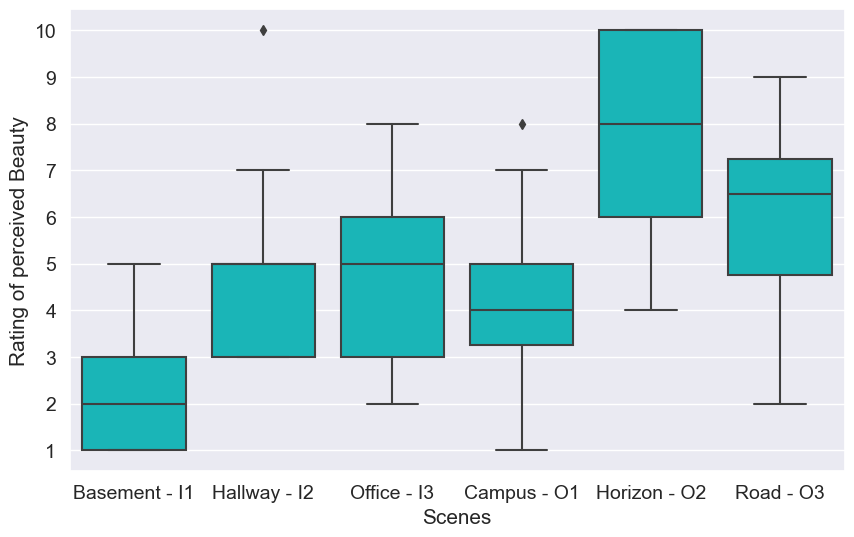

In [491]:
#Here I plot for question 1 the results over all scenes
import pandas as pd

dataset_Q1_all = [S1_Q1, S2_Q1, S3_Q1, S4_Q1, S5_Q1, S6_Q1]
dataset_Q1_in =[S1_Q1, S2_Q1, S3_Q1] 
dataset_Q1_out = [S4_Q1, S5_Q1, S6_Q1]
Q1_in=[]
for item in dataset_Q1_in:
    for i in item:
        Q1_in.append(i)
#print(Q1_in)

Q1_out=[]
for item in dataset_Q1_out:
    for i in item:
        Q1_out.append(i)
#print(Q1_out)

Q1_all = [Q1_in, Q1_out]


# Calculate Cohen's d
def cohen_d(group1, group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    n1, n2 = len(group1), len(group2)
    #Using pooled SD as the group sizes are different between Indoor and Outdoor
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    pooled_sd = np.sqrt(pooled_var)
    d = mean_diff / pooled_sd
    return d

cohen_d_value = cohen_d(Q1_in, Q1_out)
#print("Cohen's d:", cohen_d_value)


df_Q1_all = pd.DataFrame(Q1_all).T
column_names_IO = ["Indoor", "Outdoor"]
df_Q1_all.columns = column_names_IO
#print(df_Q1_all)

df_Sfreq_f = pd.DataFrame(Sfreq_all).T
#print(df_Sfreq_f)

column_names = ["Indoor", "Outdoor"]
df_Sfreq_f.columns = column_names

df_Q1 = pd.DataFrame(dataset_Q1_all).T
#print(df_Q1)

column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_Q1.columns = column_names
####
#print(Q1_all)

plt.figure(figsize=(10, 6))
sea.boxplot(data=df_Q1, color="darkturquoise")
plt.xlabel('Scenes',family='Arial', fontsize=15)
plt.ylabel('Rating of perceived Beauty', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(range(1, 11), family='Arial')

[7.0, 5.0, 3.0, 3.0, 5.0, 6.0, 4.0, 8.0, 6.0, 7.0, 6.0, 5.0, 4.0, 6.0, 6.0, 5.0, 5.0, 7.0, 7.0, 6.0, 5.0, 8.0, 7.0, 8.0, 8.0, 7.0, 6.0, 5.0, 6.0, 8.0, 6.0, 7.0, 6.0, 6.0, 4.0, 5.0, 5.0, 5.0, 6.0, 6.0, 9.0, 8.0, 7.0, 7.0, 4.0, 5.0, 7.0, 5.0, 7.0, 7.0, 6.0]
[5.0, 5.0, 5.0, 3.0, 7.0, 7.0, 10.0, 3.0, 4.0, 6.0, 6.0, 6.0, 4.0, 6.0, 7.0, 7.0, 8.0, 4.0, 8.0, 8.0, 10.0, 6.0, 6.0, 7.0, 7.0, 7.0, 9.0, 6.0, 5.0, 7.0, 6.0, 8.0, 9.0, 8.0, 6.0, 8.0, 7.0, 8.0, 4.0]
    Indoor  Outdoor
0      7.0      5.0
1      5.0      5.0
2      3.0      5.0
3      3.0      3.0
4      5.0      7.0
5      6.0      7.0
6      4.0     10.0
7      8.0      3.0
8      6.0      4.0
9      7.0      6.0
10     6.0      6.0
11     5.0      6.0
12     4.0      4.0
13     6.0      6.0
14     6.0      7.0
15     5.0      7.0
16     5.0      8.0
17     7.0      4.0
18     7.0      8.0
19     6.0      8.0
20     5.0     10.0
21     8.0      6.0
22     7.0      6.0
23     8.0      7.0
24     8.0      7.0
25     7.0      7.0
26    

([<matplotlib.axis.YTick at 0x7fa0900b3520>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

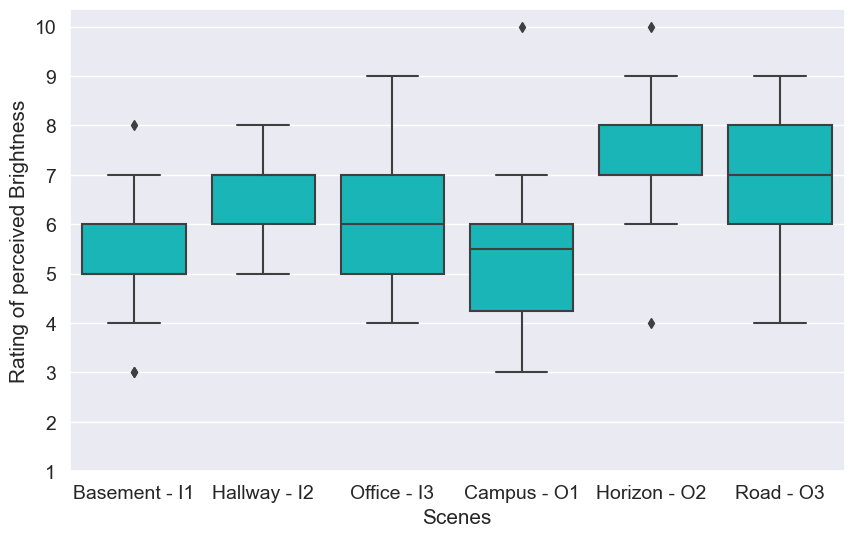

In [492]:
#Here, I plot the results over all scenes for question 2 
import pandas as pd

dataset_Q2_in =[S1_Q2, S2_Q2, S3_Q2] 
dataset_Q2_out = [S4_Q2, S5_Q2, S6_Q2]

Q2_in=[]
for item in dataset_Q2_in:
    for i in item:
        Q2_in.append(i)
#print(Q2_in)

Q2_out=[]
for item in dataset_Q2_out:
    for i in item:
        Q2_out.append(i)
#print(Q2_out)

Q2_all = [Q2_in, Q2_out]
df_Q2_all = pd.DataFrame(Q2_all).T

column_names_IO = ["Indoor", "Outdoor"]
df_Q2_all.columns = column_names_IO
#print(df_Q2_all)

dataset_Q2_all = [S1_Q2, S2_Q2, S3_Q2, S4_Q2, S5_Q2, S6_Q2]
df_Q2 = pd.DataFrame(dataset_Q2_all).T
#print(df_Q1)

column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_Q2.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.boxplot(data=df_Q2, color="darkturquoise")
plt.xlabel('Scenes',family='Arial', fontsize=15)
plt.ylabel('Rating of perceived Brightness', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(range(1, 11), family='Arial')

[7.0, 8.0, 2.0, 3.0, 1.0, 9.0, 2.0, 6.0, 8.0, 2.0, 2.0, 8.0, 8.0, 6.0, 2.0, 9.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 9.0, 7.0, 9.0, 2.0, 1.0, 5.0, 1.0, 2.0, 7.0, 2.0, 3.0, 2.0, 1.0, 9.0, 1.0, 1.0, 1.0, 2.0, 5.0, 9.0, 6.0, 1.0, 3.0, 3.0, 3.0, 5.0, 2.0, 3.0, 2.0]
[6.0, 8.0, 1.0, 2.0, 7.0, 3.0, 3.0, 1.0, 3.0, 5.0, 6.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 5.0, 4.0, 2.0, 1.0, 9.0, 3.0, 10.0, 2.0, 3.0, 3.0, 9.0, 1.0, 4.0, 2.0, 2.0, 3.0, 6.0, 1.0, 7.0, 2.0, 3.0]
    Indoor  Outdoor
0      7.0      6.0
1      8.0      8.0
2      2.0      1.0
3      3.0      2.0
4      1.0      7.0
5      9.0      3.0
6      2.0      3.0
7      6.0      1.0
8      8.0      3.0
9      2.0      5.0
10     2.0      6.0
11     8.0      3.0
12     8.0      2.0
13     6.0      2.0
14     2.0      2.0
15     9.0      2.0
16     2.0      2.0
17     1.0      1.0
18     2.0      5.0
19     2.0      4.0
20     1.0      2.0
21     1.0      1.0
22     9.0      9.0
23     7.0      3.0
24     9.0     10.0
25     2.0      2.0
26     

([<matplotlib.axis.YTick at 0x7fa050df1490>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

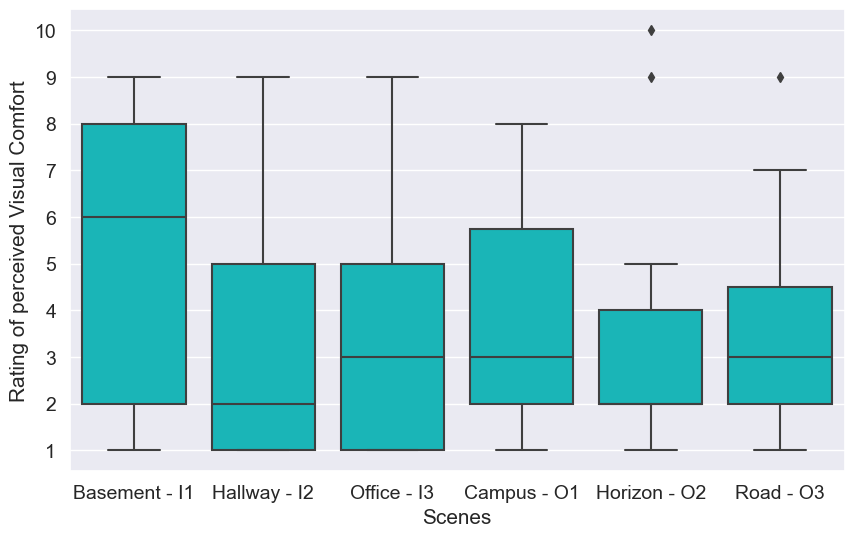

In [493]:
#Here, I plot the results over all scenes for question 3
import pandas as pd

dataset_Q3_in =[S1_Q3, S2_Q3, S3_Q3] 
dataset_Q3_out = [S4_Q3, S5_Q3, S6_Q3]

Q3_in=[]
for item in dataset_Q3_in:
    for i in item:
        Q3_in.append(i)
#print(Q3_in)

Q3_out=[]
for item in dataset_Q3_out:
    for i in item:
        Q3_out.append(i)
#print(Q3_out)

Q3_all = [Q3_in, Q3_out]
df_Q3_all = pd.DataFrame(Q3_all).T
column_names_IO = ["Indoor", "Outdoor"]
df_Q3_all.columns = column_names_IO
#print(df_Q3_all)

dataset_Q3_all = [S1_Q3, S2_Q3, S3_Q3, S4_Q3, S5_Q3, S6_Q3]

df_Q3 = pd.DataFrame(dataset_Q3_all).T
#print(df_Q3)

column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_Q3.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.boxplot(data=df_Q3, color="darkturquoise")
plt.xlabel('Scenes',family='Arial', fontsize=15)
plt.ylabel("Rating of perceived Visual Comfort", family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(range(1, 11), family='Arial')

[7.0, 3.0, 6.0, 3.0, 4.0, 7.0, 8.0, 8.0, 4.0, 4.0, 8.0, 5.0, 7.0, 4.0, 5.0, 4.0, 6.0, 2.0, 8.0, 5.0, 4.0, 3.0, 1.0, 5.0, 4.0, 5.0, 5.0, 3.0, 3.0, 4.0, 4.0, 3.0, 1.0, 2.0, 6.0, 5.0, 7.0, 2.0, 5.0, 2.0, 2.0, 6.0, 6.0, 7.0, 4.0, 6.0, 6.0, 6.0, 4.0, 5.0, 6.0]
[2.0, 3.0, 3.0, 2.0, 7.0, 4.0, 5.0, 4.0, 7.0, 3.0, 9.0, 5.0, 2.0, 6.0, 2.0, 8.0, 7.0, 5.0, 6.0, 4.0, 7.0, 7.0, 7.0, 8.0, 10.0, 7.0, 2.0, 7.0, 5.0, 6.0, 5.0, 5.0, 7.0, 8.0, 8.0, 7.0, 7.0, 5.0, 2.0]
    Indoor  Outdoor
0      7.0      2.0
1      3.0      3.0
2      6.0      3.0
3      3.0      2.0
4      4.0      7.0
5      7.0      4.0
6      8.0      5.0
7      8.0      4.0
8      4.0      7.0
9      4.0      3.0
10     8.0      9.0
11     5.0      5.0
12     7.0      2.0
13     4.0      6.0
14     5.0      2.0
15     4.0      8.0
16     6.0      7.0
17     2.0      5.0
18     8.0      6.0
19     5.0      4.0
20     4.0      7.0
21     3.0      7.0
22     1.0      7.0
23     5.0      8.0
24     4.0     10.0
25     5.0      7.0
26     

([<matplotlib.axis.YTick at 0x7fa0d2004370>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

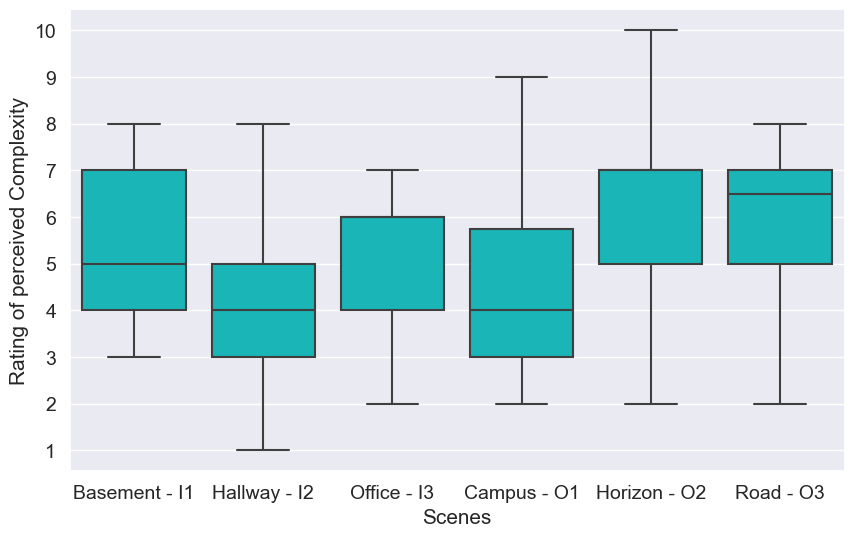

In [494]:
#Here, I plot the results over all scenes for question 4
import pandas as pd

dataset_Q4_in =[S1_Q4, S2_Q4, S3_Q4] 
dataset_Q4_out = [S4_Q4, S5_Q4, S6_Q4]

Q4_in=[]
for item in dataset_Q4_in:
    for i in item:
        Q4_in.append(i)
#print(Q4_in)

Q4_out=[]
for item in dataset_Q4_out:
    for i in item:
        Q4_out.append(i)
#print(Q4_out)

Q4_all = [Q4_in, Q4_out]
df_Q4_all = pd.DataFrame(Q4_all).T
column_names_IO = ["Indoor", "Outdoor"]
df_Q4_all.columns = column_names_IO
#print(df_Q4_all)
dataset_Q4_all = [S1_Q4, S2_Q4, S3_Q4, S4_Q4, S5_Q4, S6_Q4]

df_Q4 = pd.DataFrame(dataset_Q4_all).T
#print(df_Q4)

column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_Q4.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.boxplot(data=df_Q4, color="darkturquoise")
plt.xlabel('Scenes',family='Arial', fontsize=15)
plt.ylabel('Rating of perceived Complexity', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(range(1, 11), family='Arial')

[7.0, 2.0, 5.0, 4.0, 7.0, 1.0, 8.0, 4.0, 3.0, 4.0, 2.0, 5.0, 7.0, 4.0, 3.0, 8.0, 5.0, 7.0, 3.0, 5.0, 4.0, 7.0, 2.0, 8.0, 5.0, 4.0, 5.0, 2.0, 4.0, 6.0, 4.0, 3.0, 7.0, 5.0, 8.0, 4.0, 6.0, 4.0, 6.0, 2.0, 9.0, 4.0, 3.0, 5.0, 2.0, 5.0, 6.0, 3.0, 3.0, 8.0, 5.0]
[6.0, 2.0, 4.0, 6.0, 7.0, 2.0, 4.0, 3.0, 2.0, 7.0, 4.0, 5.0, 7.0, 6.0, 6.0, 3.0, 4.0, 6.0, 5.0, 2.0, 2.0, 3.0, 2.0, 2.0, 1.0, 3.0, 6.0, 4.0, 4.0, 4.0, 5.0, 3.0, 3.0, 2.0, 2.0, 5.0, 4.0, 6.0, 5.0]
    Indoor  Outdoor
0      7.0      6.0
1      2.0      2.0
2      5.0      4.0
3      4.0      6.0
4      7.0      7.0
5      1.0      2.0
6      8.0      4.0
7      4.0      3.0
8      3.0      2.0
9      4.0      7.0
10     2.0      4.0
11     5.0      5.0
12     7.0      7.0
13     4.0      6.0
14     3.0      6.0
15     8.0      3.0
16     5.0      4.0
17     7.0      6.0
18     3.0      5.0
19     5.0      2.0
20     4.0      2.0
21     7.0      3.0
22     2.0      2.0
23     8.0      2.0
24     5.0      1.0
25     4.0      3.0
26     5

([<matplotlib.axis.YTick at 0x7fa051c757c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

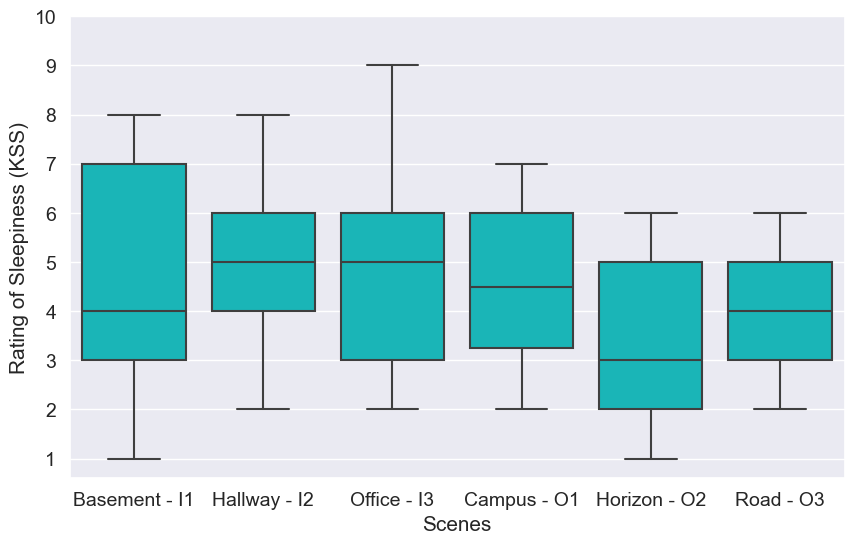

In [495]:
#Here, I plot the results over all scenes for question 5
import pandas as pd

dataset_Q5_in =[S1_Q5, S2_Q5, S3_Q5] 
dataset_Q5_out = [S4_Q5, S5_Q5, S6_Q5]

Q5_in=[]
for item in dataset_Q5_in:
    for i in item:
        Q5_in.append(i)
#print(Q5_in)

Q5_out=[]
for item in dataset_Q5_out:
    for i in item:
        Q5_out.append(i)
#print(Q5_out)

Q5_all = [Q5_in, Q5_out]
df_Q5_all = pd.DataFrame(Q5_all).T
column_names_IO = ["Indoor", "Outdoor"]
df_Q5_all.columns = column_names_IO
#print(df_Q5_all)
dataset_Q5_all = [S1_Q5, S2_Q5, S3_Q5, S4_Q5, S5_Q5, S6_Q5]
# Liste von Listen in einen DataFrame umwandeln
df_Q5 = pd.DataFrame(dataset_Q5_all).T
#print(df_Q5)
# Spaltennamen festlegen (optional)
column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_Q5.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.boxplot(data=df_Q5, color="darkturquoise")
plt.xlabel('Scenes',family='Arial', fontsize=15)
plt.ylabel('Rating of Sleepiness (KSS)', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(range(1, 11), family='Arial')

In [496]:
###Indoor vs. Outdoor --> These are needed in order to plot indoor vs outdoor side by side properly
##Average Pupil Size
pupil_in = []
pupil_out = []

#print("Pupil in")
pupil_in.append(avr_pupil_S1)
pupil_in.append(avr_pupil_S2)
pupil_in.append(avr_pupil_S3)
pupil1 = (sum(avr_pupil_S1) + sum(avr_pupil_S2) + sum(avr_pupil_S3))
pupil2 = (len(avr_pupil_S1) + len(avr_pupil_S2) + len(avr_pupil_S3))
mean_pupil_in = pupil1/pupil2
#print(pupil1)
#print(pupil2)
#print(mean_pupil_in)

#print("Pupil out")
pupil_out.append(avr_pupil_S4)
pupil_out.append(avr_pupil_S5)
pupil_out.append(avr_pupil_S6)
pupil3 = (sum(avr_pupil_S4) + sum(avr_pupil_S5) + sum(avr_pupil_S6))
pupil4 = (len(avr_pupil_S4) + len(avr_pupil_S5) + len(avr_pupil_S6))
mean_pupil_out = pupil3/pupil4
#print(pupil3)
#print(pupil4)
#print(mean_pupil_out)

##Average Saccade Peak Velocity
velo_in = []
velo_out = []

#print("Velocity in")
velo_in.append(avr_peak_velo_S1)
velo_in.append(avr_peak_velo_S2)
velo_in.append(avr_peak_velo_S3)
velo1 = (sum(avr_peak_velo_S1) + sum(avr_peak_velo_S2) + sum(avr_peak_velo_S3))
velo2 = (len(avr_peak_velo_S1) + len(avr_peak_velo_S2) + len(avr_pupil_S2))
mean_velo_in = velo1/velo2
#print(velo1)
#print(velo2)
#print(mean_velo_in)

#print("Velocity out")
velo_out.append(avr_peak_velo_S4)
velo_out.append(avr_peak_velo_S5)
velo_out.append(avr_peak_velo_S6)
velo3 = (sum(avr_peak_velo_S4) + sum(avr_peak_velo_S5) + sum(avr_peak_velo_S6))
velo4 = (len(avr_peak_velo_S4) + len(avr_peak_velo_S5) + len(avr_peak_velo_S6))
mean_velo_out = velo3/velo4
#print(velo3)
#print(velo4)
#print(mean_velo_out)

##Average Saccade Amplitude
amp_in = []
amp_out = []

#print("Amplitude in")
amp_in.append(avr_amp_S1)
amp_in.append(avr_amp_S2)
amp_in.append(avr_amp_S3)

amp1 = (sum(avr_amp_S1) + sum(avr_amp_S2) + sum(avr_amp_S3))
amp2 = (len(avr_amp_S1) + len(avr_amp_S2) + len(avr_amp_S3))
mean_amp_in = amp1/amp2
#print(amp1)
#print(amp2)
#print(mean_amp_in)

#print("Amplitude out")
amp_out.append(avr_amp_S4)
amp_out.append(avr_amp_S5)
amp_out.append(avr_amp_S6)

amp3 = (sum(avr_amp_S4) + sum(avr_amp_S5) + sum(avr_amp_S6))
amp4 = (len(avr_amp_S4) + len(avr_amp_S5) + len(avr_amp_S6))
mean_amp_out = amp3/amp4
#print(amp3)
#print(amp4)
#print(mean_amp_out)

##Average Saccade Frequency
freq_in = []
freq_out = []

#print("Saccade Frequency in")
freq_in.append(freq_sacc_S1)
freq_in.append(freq_sacc_S2)
freq_in.append(freq_sacc_S3)

freq1 = (sum(freq_sacc_S1) + sum(freq_sacc_S2) + sum(freq_sacc_S3))
freq2 = (len(freq_sacc_S1) + len(freq_sacc_S2) + len(freq_sacc_S3))
mean_freq_in = freq1/freq2
#print(freq1)
#print(freq2)
#print(mean_freq_in)

#print("Saccade Frequency out")
freq_out.append(freq_sacc_S4)
freq_out.append(freq_sacc_S5)
freq_out.append(freq_sacc_S6)

freq3 = (sum(freq_sacc_S4) + sum(freq_sacc_S5) + sum(freq_sacc_S6))
freq4 = (len(freq_sacc_S4) + len(freq_sacc_S5) + len(freq_sacc_S6))
mean_freq_out = freq3/freq4
#print(freq3)
#print(freq4)
#print(mean_freq_out)

##Average Fixation Duration
dur_in = []
dur_out = []

#print("Duration in")
dur_in.append(avg_fix_dur_S1)
dur_in.append(avg_fix_dur_S2)
dur_in.append(avg_fix_dur_S3)

dur1 = (sum(avg_fix_dur_S1) + sum(avg_fix_dur_S2) + sum(avg_fix_dur_S3))
dur2 = (len(avg_fix_dur_S1) + len(avg_fix_dur_S2) + len(avg_fix_dur_S3))
mean_dur_in = dur1/dur2
#print(dur1)
#print(dur2)
#print(mean_dur_in)

#print("Duration out")
dur_out.append(avr_fix_dur_S4)
dur_out.append(avr_fix_dur_S5)
dur_out.append(avr_dur_fix_S6)

dur3 = (sum(avr_fix_dur_S4) + sum(avr_fix_dur_S5) + sum(avr_dur_fix_S6))
dur4 = (len(avr_fix_dur_S4) + len(avr_fix_dur_S5) + len(avr_dur_fix_S6))
mean_dur_out = dur3/dur4
#print(dur3)
#print(dur4)
#print(mean_dur_out)

##Average Fixation Frequency
freqfix_in=[]
freqfix_out=[]

#print("Fixation Frequency in")
freqfix_in.append(freq_fix_S1)
freqfix_in.append(freq_fix_S2)
freqfix_in.append(freq_fix_S3)

freqfix1 = (sum(freq_fix_S1) + sum(freq_fix_S2) + sum(freq_fix_S3))
freqfix2 = (len(freq_fix_S1) + len(freq_fix_S2) + len(freq_fix_S3))
mean_freqfix_in = freqfix1/freqfix2
#print(freqfix1)
#print(freqfix2)
#print(mean_freqfix_in)

#print("Fixation Frequency out")
freqfix_out.append(freq_fix_S4)
freqfix_out.append(freq_fix_S5)
freqfix_out.append(freq_fix_S6)


freqfix3 = (sum(freq_fix_S4) + sum(freq_fix_S5) + sum(freq_fix_S6))
freqfix4 = (len(freq_fix_S4) + len(freq_fix_S5) + len(freq_fix_S6))
mean_freqfix_out = freqfix3/freqfix4
#print(freqfix_out)
#print(mean_freqfix_out)



Pupil in
147.16838
51
2.885654509803922
Pupil out
80.63164
39
2.067477948717949
Velocity in
11241.14
51
220.41450980392156
Velocity out
8494.18
39
217.7994871794872
Amplitude in
374.9200000000001
51
7.351372549019609
Amplitude out
270.53
39
6.936666666666666
Saccade Frequency in
54.635301511974326
51
1.0712804218034182
Saccade Frequency out
40.16443413423553
39
1.0298572854932186
Duration in
33340.0
51
653.7254901960785
Duration out
20436.0
39
524.0
Fixation Frequency in
80.92766855021286
51
1.5868170303963305
Fixation Frequency out
[[1.9638648860958368, 1.4545877698260312, 1.6512822206443303, 0.9754574895626048, 2.4370628518509494, 1.3554543482975494, 0.9610209886983933, 1.7689096440953795, 2.3259600400065126, 1.953315753491552, 1.5049135427169709, 1.1146656560364718, 1.5709191447916175, 1.48625953063924], [2.2682937894116044, 2.093276396215356, 2.592486972752962, 1.541568391681697, 2.648094695866324, 1.152937107280798, 1.218071305894247, 2.3292648840026087, 1.8774759213713084, 2.8481

[[2.5363329697922743, 1.5067956483741676, 2.010899072975527, 1.6011528300376272, 2.3218017181332713, 1.841756298806542, 1.6460363444824861, 1.501749538212017, 1.3006099860834732, 1.4854426619132501, 2.0571052415041553, 1.7310022503029252, 1.6816332021659437, 1.8492834026814609, 0.3505758207856404, 1.7582108446444897, 2.1577766269635767], [3.1416902293433866, 1.0027374733021148, 1.6128772116578765, 1.5764416558943153, 1.8092343320306845, 1.7877254768757709, 1.379576745854372, 1.2797870434359722, 1.1691940745244302, 1.2433326287781772, 1.7181244953009296, 1.3716480351141898, 1.233867186536041, 1.6461447290445776, 1.270292929549554, 1.4654806043642012, 2.049138337329153], [3.3675702980299715, 1.2947665535903876, 1.6310020876826723, 1.1994290717618414, 1.109114704642754, 1.7651627480053662, 1.4664906877841326, 1.2515957846253973, 0.43280675178532785, 0.9289191097239252, 1.8284209756454328, 1.6232712161547953, 1.2153769491607822, 1.4382694741686803, 1.0419814318908838, 1.3412197051999086, 1

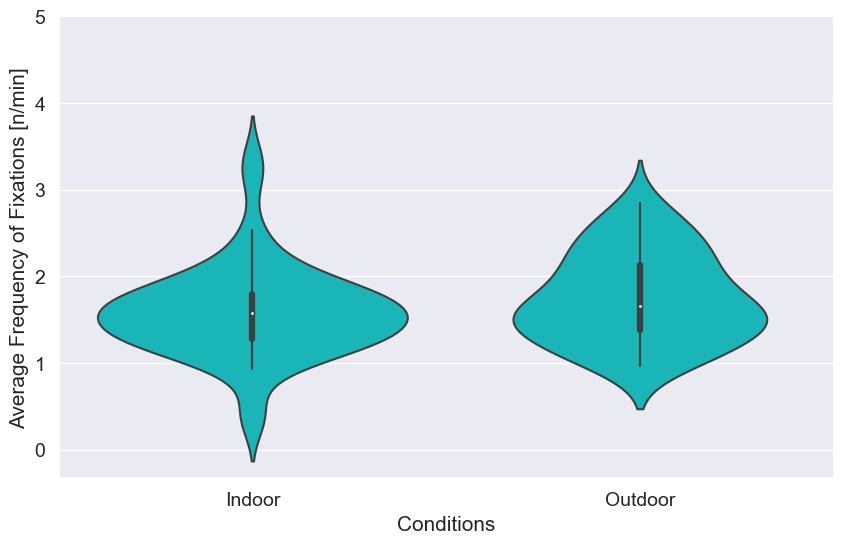

In [497]:
#Here, I plot the results over indoor and outdoor condition for fix_frequency
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats


#print(freqfix_in)
ff_in=[]
for item in freqfix_in:
    for i in item:
        ff_in.append(i)
#print(ff_in)

ff_out=[]
for item in freqfix_out:
    for i in item:
        ff_out.append(i)
#print(ff_out)

fix_freq_all = [ff_in, ff_out]

df_fix_f = pd.DataFrame(fix_freq_all).T
#print(df_fix_f)

column_names = ["Indoor", "Outdoor"]
df_fix_f.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_fix_f, color="darkturquoise")
plt.xlabel('Conditions',family='Arial', fontsize=15)
plt.ylabel('Average Frequency of Fixations [n/min]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks([0,1,2,3,4,5], family='Arial')  # Corrected yticks setting

# indpendent samples t-test
t_statistic, p_value = stats.ttest_ind(ff_in, ff_out)

# Calculate Cohen's d
def cohen_d(group1, group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    n1, n2 = len(group1), len(group2)
    #Using pooled SD as the group sizes are different between Indoor and Outdoor
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    pooled_sd = np.sqrt(pooled_var)
    d = mean_diff / pooled_sd
    if d < 0:
        d = d *(-1)
    return d

cohen_d_value = cohen_d(ff_in, ff_out)
#print("Cohen's d:", cohen_d_value)

# Results
print("Average Fixation Frequency T-Statistic:", t_statistic)
print("Average Fixation Frequency P-Value:", p_value)
print("Mean Fixation Frequency Indoor = " + str(mean_freqfix_in))
print("Mean Fixation Frequency Outdoor = " + str(mean_freqfix_out))

[267.0, 609.0, 430.0, 540.0, 367.0, 439.0, 527.0, 617.0, 669.0, 604.0, 417.0, 428.0, 509.0, 505.0, 2801.0, 511.0, 418.0, 191.0, 936.0, 572.0, 488.0, 498.0, 421.0, 651.0, 732.0, 765.0, 721.0, 497.0, 632.0, 714.0, 569.0, 746.0, 625.0, 436.0, 162.0, 712.0, 566.0, 754.0, 838.0, 445.0, 603.0, 752.0, 2244.0, 1006.0, 477.0, 541.0, 693.0, 655.0, 889.0, 690.0, 461.0]
[231.0, 628.0, 554.0, 946.0, 308.0, 604.0, 965.0, 470.0, 276.0, 423.0, 614.0, 855.0, 578.0, 505.0, 289.0, 358.0, 289.0, 586.0, 199.0, 784.0, 759.0, 325.0, 285.0, 289.0, 661.0, 534.0, 216.0, 252.0, 622.0, 584.0, 375.0, 721.0, 873.0, 529.0, 509.0, 455.0, 828.0, 677.0, 480.0]
         0      1
0    267.0  231.0
1    609.0  628.0
2    430.0  554.0
3    540.0  946.0
4    367.0  308.0
5    439.0  604.0
6    527.0  965.0
7    617.0  470.0
8    669.0  276.0
9    604.0  423.0
10   417.0  614.0
11   428.0  855.0
12   509.0  578.0
13   505.0  505.0
14  2801.0  289.0
15   511.0  358.0
16   418.0  289.0
17   191.0  586.0
18   936.0  199.0
19   

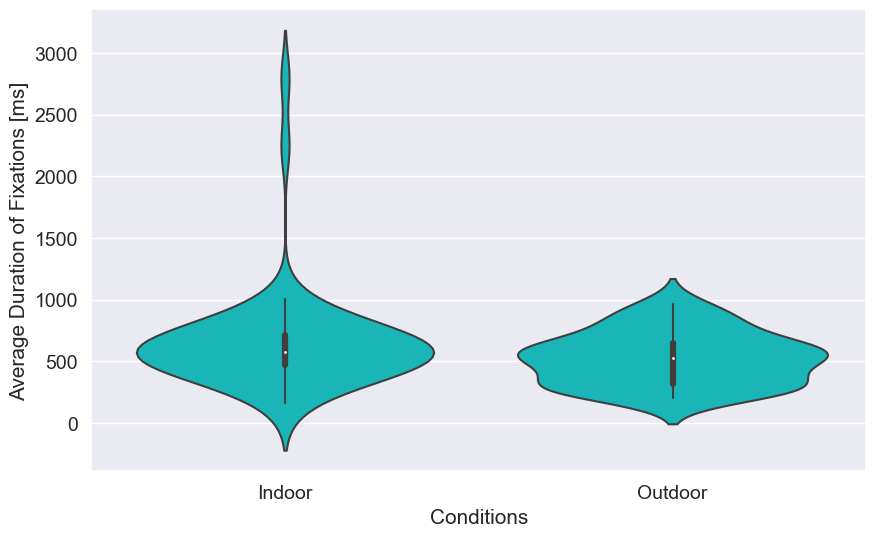

In [499]:
#Here, I plot the results over indoor and outdoor condition for fix_duration
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats


Fdur_in=[]
for item in dur_in:
    for i in item:
        Fdur_in.append(i)
#print(Fdur_in)

Fdur_out=[]
for item in dur_out:
    for i in item:
        Fdur_out.append(i)
#print(Fdur_out)

Fdur_all = [Fdur_in, Fdur_out]

df_fdur_f = pd.DataFrame(Fdur_all).T
#print(df_fdur_f)

column_names = ["Indoor", "Outdoor"]
df_fdur_f.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_fdur_f, color="darkturquoise")
plt.xlabel('Conditions',family='Arial', fontsize=15)
plt.ylabel('Average Duration of Fixations [ms]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(family='Arial')  # Corrected yticks setting

# indpendent samples t-test
t_statistic, p_value = stats.ttest_ind(Fdur_in, Fdur_out)

# Calculate Cohen's d
def cohen_d(group1, group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    n1, n2 = len(group1), len(group2)
    #Using pooled SD as the group sizes are different between Indoor and Outdoor
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    pooled_sd = np.sqrt(pooled_var)
    d = mean_diff / pooled_sd
    return d

cohen_d_value = cohen_d(Fdur_in, Fdur_out)
print("Cohen's d:", cohen_d_value)

# Results
print("Average Fixation Duration T-Statistic:", t_statistic)
print("Average Fixation Duration P-Value:", p_value)
print("Mean Indoor = " + str(mean_dur_in))
print("Mean Outdoor = " + str(mean_dur_out))


[1.1150136589173216, 1.179760036808513, 1.6218232537018116, 0.8250893159184481, 1.5560569516844318, 1.0968640656363455, 1.1275355455580738, 1.3608404550650481, 0.8302613662781043, 1.1050700614418956, 1.380795890751429, 0.2426636705792139, 1.301100731218611, 1.707854422489027, 0.30625057421982665, 1.3788348845225784, 1.8049889895671638, 1.1766228570756216, 0.7643798968087139, 1.5146466329405348, 0.796431984708506, 1.3948752284108188, 0.9432894389314418, 0.9007872880897904, 1.1163206072784104, 0.9025352214370166, 0.9196755384700278, 1.0594567105988049, 0.8323622440486099, 0.7959438700382849, 1.4914465540127368, 1.1856067342462504, 1.1797322007904205, 1.6171024757838905, 1.0950503723171265, 1.0226099049995399, 1.3939224979091163, 0.6759679861561757, 0.699848832652147, 1.00173299808669, 0.7987858455148175, 1.1079718575148192, 0.3297576610948614, 0.6917495036697312, 1.2312086775587594, 0.7304708615173341, 0.8292148993333112, 1.3012869728161152, 0.8186990871505178, 1.0201375145369596, 1.3548

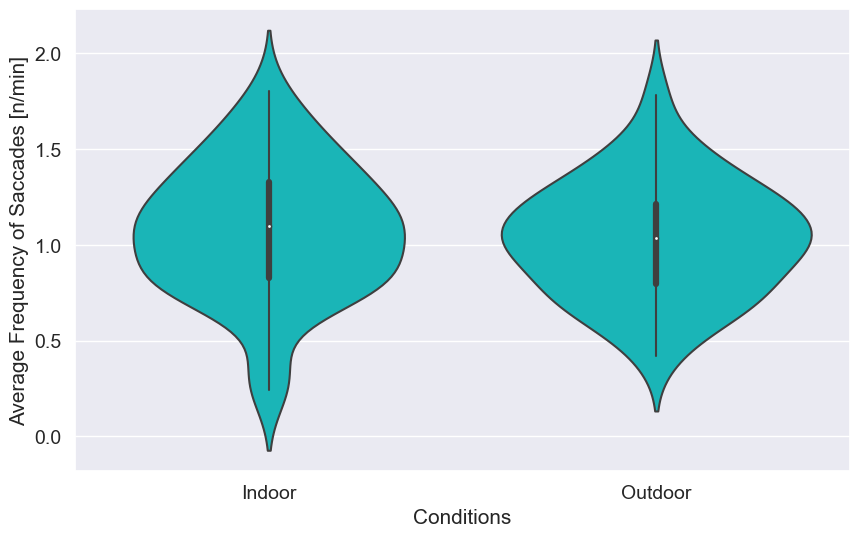

In [500]:
#Here, I plot the results over indoor and outdoor condition for Saccade_frequency
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats


Sfreq_in=[]
for item in freq_in:
    for i in item:
        Sfreq_in.append(i)
#print(Sfreq_in)

Sfreq_out=[]
for item in freq_out:
    for i in item:
        Sfreq_out.append(i)
#print(Sfreq_out)

Sfreq_all = [Sfreq_in, Sfreq_out]

df_Sfreq_f = pd.DataFrame(Sfreq_all).T
#print(df_Sfreq_f)
column_names = ["Indoor", "Outdoor"]
df_Sfreq_f.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_Sfreq_f, color="darkturquoise")
plt.xlabel('Conditions',family='Arial', fontsize=15)
plt.ylabel('Average Frequency of Saccades [n/min]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(family='Arial')  # Corrected yticks setting

# indpendent samples t-test
t_statistic, p_value = stats.ttest_ind(Sfreq_in, Sfreq_out)

# Calculate Cohen's d
def cohen_d(group1, group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    n1, n2 = len(group1), len(group2)
    #Using pooled SD as the group sizes are different between Indoor and Outdoor
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    pooled_sd = np.sqrt(pooled_var)
    d = mean_diff / pooled_sd
    return d

cohen_d_value = cohen_d(Sfreq_in, Sfreq_out)
print("Cohen's d:", cohen_d_value)

# Results
print("Average Frequency of Saccades T-Statistic:", t_statistic)
print("Average Frequency of Saccades P-Value:", p_value)
print("Mean Indoor = " + str(mean_freq_in))
print("Mean Outdoor = " + str(mean_freq_out))


[4.65, 6.81, 7.62, 6.71, 7.13, 7.67, 8.9, 8.07, 8.08, 6.36, 6.98, 6.81, 9.18, 6.92, 8.08, 8.01, 7.44, 5.47, 6.27, 9.86, 5.98, 7.35, 8.56, 7.24, 8.45, 9.09, 7.43, 6.84, 4.93, 7.25, 7.35, 7.81, 8.03, 6.89, 5.01, 7.48, 7.36, 6.49, 5.85, 7.46, 6.5, 7.92, 7.4, 7.04, 6.78, 6.7, 9.58, 8.19, 10.32, 7.14, 7.48]
[4.74, 6.01, 7.94, 7.68, 6.38, 4.47, 8.19, 7.15, 4.38, 10.16, 8.43, 7.77, 8.27, 6.07, 6.78, 4.34, 6.39, 7.67, 6.0, 6.37, 6.19, 7.64, 7.5, 5.62, 8.74, 6.91, 5.83, 4.88, 4.96, 7.69, 8.43, 7.41, 5.93, 7.39, 8.28, 8.01, 8.54, 7.95, 7.44]
        0      1
0    4.65   4.74
1    6.81   6.01
2    7.62   7.94
3    6.71   7.68
4    7.13   6.38
5    7.67   4.47
6    8.90   8.19
7    8.07   7.15
8    8.08   4.38
9    6.36  10.16
10   6.98   8.43
11   6.81   7.77
12   9.18   8.27
13   6.92   6.07
14   8.08   6.78
15   8.01   4.34
16   7.44   6.39
17   5.47   7.67
18   6.27   6.00
19   9.86   6.37
20   5.98   6.19
21   7.35   7.64
22   8.56   7.50
23   7.24   5.62
24   8.45   8.74
25   9.09   6.91
26 

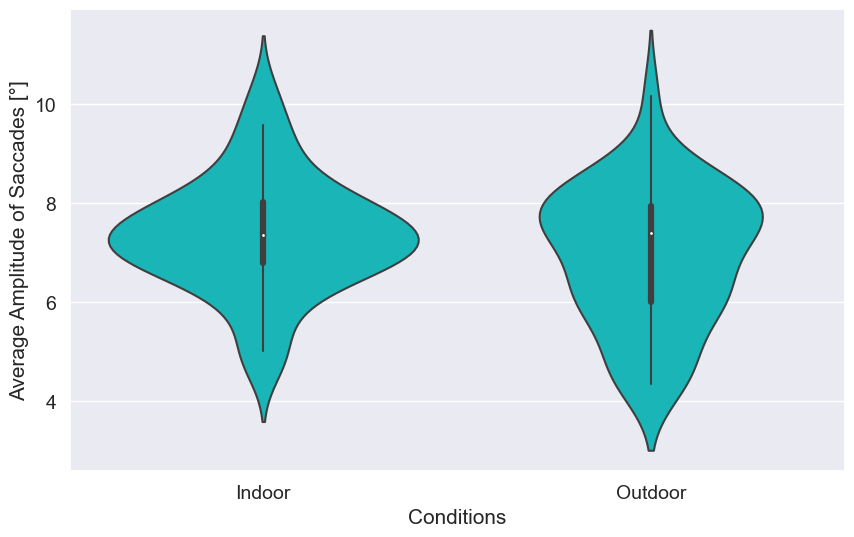

In [501]:
#Here, I plot the results over indoor and outdoor condition for Saccade_amplitude
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats


Samp_in=[]
for item in amp_in:
    for i in item:
        Samp_in.append(i)
#print(Samp_in)

Samp_out=[]
for item in amp_out:
    for i in item:
        Samp_out.append(i)
#print(Samp_out)

Samp_all = [Samp_in, Samp_out]

df_Samp_f = pd.DataFrame(Samp_all).T
#print(df_Samp_f)

column_names = ["Indoor", "Outdoor"]
df_Samp_f.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_Samp_f, color="darkturquoise")
plt.xlabel('Conditions',family='Arial', fontsize=15)
plt.ylabel('Average Amplitude of Saccades [°]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(family='Arial')  # Corrected yticks setting

# indpendent samples t-test
t_statistic, p_value = stats.ttest_ind(Samp_in, Samp_out)


# Calculate Cohen's d
def cohen_d(group1, group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    n1, n2 = len(group1), len(group2)
    #Using pooled SD as the group sizes are different between Indoor and Outdoor
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    pooled_sd = np.sqrt(pooled_var)
    d = mean_diff / pooled_sd
    return d

cohen_d_value = cohen_d(Samp_in, Samp_out)
print("Cohen's d:", cohen_d_value)


#Results
print("Average Saccade Amplitude T-Statistic:", t_statistic)
print("Average Saccade Amplitude P-Value:", p_value)
print("Mean Indoor = " + str(mean_amp_in))
print("Mean Outdoor = " + str(mean_amp_out))


[211.8, 235.3, 242.41, 249.99, 256.39, 221.28, 262.46, 203.17, 190.6, 210.95, 222.91, 234.69, 202.53, 222.71, 214.2, 246.82, 218.97, 224.73, 201.72, 249.11, 201.85, 229.49, 239.31, 212.54, 194.18, 200.78, 207.17, 210.53, 186.96, 188.08, 217.14, 203.18, 251.75, 191.27, 258.49, 250.92, 224.6, 219.53, 213.63, 216.49, 230.75, 192.44, 190.05, 211.01, 214.66, 226.13, 217.52, 234.72, 224.97, 234.44, 223.82]
[195.3, 210.78, 246.97, 233.19, 213.33, 162.41, 234.91, 238.88, 201.11, 240.5, 236.36, 200.62, 243.12, 195.63, 241.46, 202.72, 226.89, 234.7, 226.74, 181.29, 203.92, 231.3, 211.33, 233.76, 221.13, 215.38, 220.83, 188.32, 189.08, 233.57, 261.67, 192.99, 195.01, 225.5, 217.38, 232.56, 208.11, 234.64, 210.79]
         0       1
0   211.80  195.30
1   235.30  210.78
2   242.41  246.97
3   249.99  233.19
4   256.39  213.33
5   221.28  162.41
6   262.46  234.91
7   203.17  238.88
8   190.60  201.11
9   210.95  240.50
10  222.91  236.36
11  234.69  200.62
12  202.53  243.12
13  222.71  195.63
14 

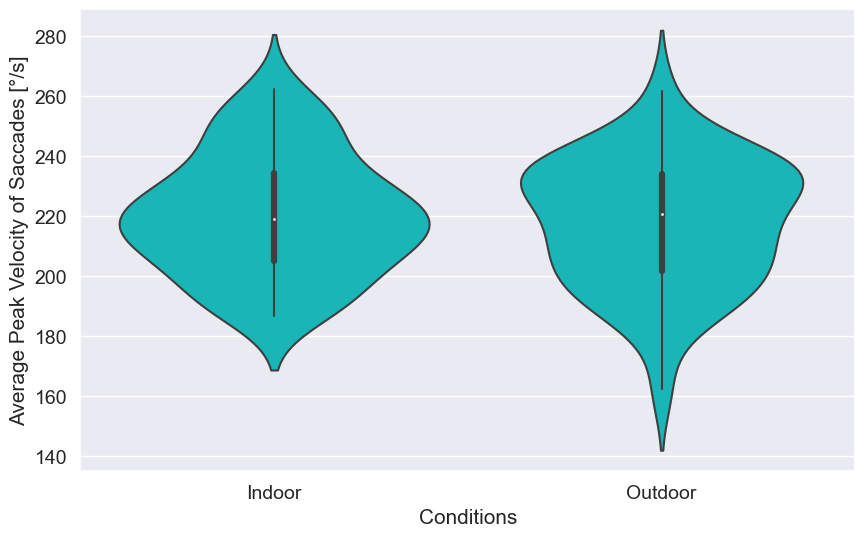

In [502]:
#Here, I plot the results over indoor and outdoor condition for fix_frequency
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats


Svelo_in=[]
for item in velo_in:
    for i in item:
        Svelo_in.append(i)
#print(Svelo_in)

Svelo_out=[]
for item in velo_out:
    for i in item:
        Svelo_out.append(i)
#print(Svelo_out)

Svelo_all = [Svelo_in, Svelo_out]

df_Svelo_f = pd.DataFrame(Svelo_all).T
#print(df_Svelo_f)

column_names = ["Indoor", "Outdoor"]
df_Svelo_f.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_Svelo_f, color="darkturquoise")
plt.xlabel('Conditions',family='Arial', fontsize=15)
plt.ylabel('Average Peak Velocity of Saccades [°/s]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(family='Arial')  # Corrected yticks setting

# indpendent samples t-test
t_statistic, p_value = stats.ttest_ind(Svelo_in, Svelo_out)



# Calculate Cohen's d
def cohen_d(group1, group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    n1, n2 = len(group1), len(group2)
    #Using pooled SD as the group sizes are different between Indoor and Outdoor
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    pooled_sd = np.sqrt(pooled_var)
    d = mean_diff / pooled_sd
    return d

cohen_d_value = cohen_d(Svelo_in, Svelo_out)
print("Cohen's d:", cohen_d_value)


# Results
print("Average Velocity of Saccades T-Statistic:", t_statistic)
print("Average Velocity of Saccades P-Value:", p_value)
print("Mean Indoor = " + str(mean_velo_in))
print("Mean Outdoor = " + str(mean_velo_out))


[3.71009, 3.40685, 4.04744, 3.57457, 3.34055, 3.02597, 4.36827, 3.90725, 4.53768, 3.8536, 4.60768, 3.93695, 3.74783, 3.48371, 3.67016, 3.3953, 3.19321, 2.37931, 2.38416, 2.23498, 2.35528, 2.00495, 1.95788, 2.51039, 2.36351, 2.54207, 3.09754, 2.95441, 2.58465, 2.00505, 2.29665, 2.29379, 2.12358, 2.6317, 2.66683, 2.71135, 2.21254, 2.35455, 2.15497, 2.0707, 2.54317, 2.56659, 2.51276, 3.07216, 2.77734, 2.85454, 2.27021, 2.28684, 2.49995, 2.18614, 2.90073]
[2.00761, 2.1134, 2.07322, 2.78498, 2.13962, 2.11535, 2.74262, 2.94333, 2.27391, 1.93459, 2.23601, 2.48258, 2.22655, 1.70426, 1.93474, 1.84052, 1.67045, 2.37208, 1.72617, 1.90233, 2.23024, 2.58504, 1.68664, 2.00556, 2.09136, 1.62815, 1.64668, 1.98797, 2.12571, 1.99905, 1.76406, 2.06193, 2.11518, 2.17462, 1.69013, 2.00816, 2.1718, 1.80788, 1.62716]
          0        1
0   3.71009  2.00761
1   3.40685  2.11340
2   4.04744  2.07322
3   3.57457  2.78498
4   3.34055  2.13962
5   3.02597  2.11535
6   4.36827  2.74262
7   3.90725  2.94333
8   4

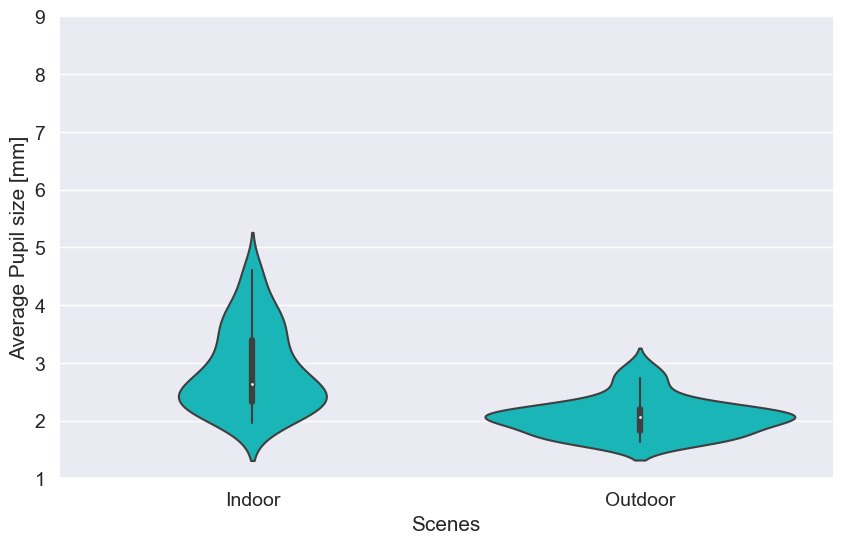

In [503]:
#Here, I plot the results over indoor and outdoor condition for fix_frequency
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats


Pup_in=[]
for item in pupil_in:
    for i in item:
        Pup_in.append(i)
#print(Pup_in)

Pup_out=[]
for item in pupil_out:
    for i in item:
        Pup_out.append(i)
#print(Pup_out)

Pup_all = [Pup_in, Pup_out]

df_Pup_f = pd.DataFrame(Pup_all).T

column_names_IO = ["Indoor", "Outdoor"]
df_Pup_f.columns = column_names_IO
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_Pup_f, color="darkturquoise")
plt.xlabel('Scenes',family='Arial', fontsize=15)
plt.ylabel('Average Pupil size [mm]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(family='Arial')  # Corrected yticks setting
plt.ylim(1,9)

# independent samples t-test
t_statistic, p_value = stats.ttest_ind(Pup_in, Pup_out)


# Calculate Cohen's d
def cohen_d(group1, group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    n1, n2 = len(group1), len(group2)
    #Using pooled SD as the group sizes are different between Indoor and Outdoor
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    pooled_sd = np.sqrt(pooled_var)
    d = mean_diff / pooled_sd
    return d

cohen_d_value = cohen_d(Pup_in, Pup_out)
print("Cohen's d:", cohen_d_value)


#Results
print("Average Pupil size T-Statistic:", t_statistic)
print("Average Pupil size P-Value:", p_value)
print("Mean Indoor = " + str(mean_pupil_in))
print("Mean Outdoor = " + str(mean_pupil_out))


In [7]:
#Statistical Tests#
import scipy.stats as stats
#ANOVA --> Gibt es SSU zwischen den Szenen im Hinblick auf die Metriken?

#ANOVA 
###Average Pupil Size
f_statistic, p_value = stats.f_oneway(*pupil_list_all)
print("Average Pupil Size - F-statistic:", f_statistic)
print("Average Pupil Size - P-value:", p_value)
###Average Saccade Peak Velocity
f_statistic, p_value = stats.f_oneway(*avr_peak_velo_all)
print("Average Saccade Peak Velocity - F-statistic:", f_statistic)
print("Average Saccade Peak Velocity - P-value:", p_value)
###Average Saccade Amplitude
f_statistic, p_value = stats.f_oneway(*avr_amp_all)
print("Average Saccade Amplitude - F-statistic:", f_statistic)
print("Average Saccade Amplitude - P-value:", p_value)
###Average Saccade Frequency
f_statistic, p_value = stats.f_oneway(*nr_sacc_all)
print("Average Saccade Frequency - F-statistic:", f_statistic)
print("Average Saccade Frequency - P-value:", p_value)
###Average Frequency of Fixations
f_statistic, p_value = stats.f_oneway(*freq_fix_all)
print("Average Fixation Frequency - F-statistic:", f_statistic)
print("Average Fixation Frequency - P-value:", p_value)
###Average Duration of Fixations
f_statistic, p_value = stats.f_oneway(*avr_dur_all)
print("Average Fixation Duration - F-statistic:", f_statistic)
print("Average Fixation Duration - P-value:", p_value)


NameError: name 'pupil_list_all' is not defined

    Basement - I1  Hallway - I2  Office - I3  Campus - O1  Horizon - O2  \
0             1.0           5.0          5.0          4.0           6.0   
1             3.0          10.0          2.0          3.0          10.0   
2             1.0           3.0          3.0          2.0           7.0   
3             1.0           3.0          2.0          1.0           5.0   
4             3.0           5.0          4.0          5.0           9.0   
5             4.0           4.0          5.0          7.0           9.0   
6             2.0           3.0          5.0          5.0          10.0   
7             4.0           5.0          8.0          3.0           6.0   
8             1.0           7.0          7.0          4.0           8.0   
9             1.0           5.0          6.0          5.0           7.0   
10            2.0           3.0          3.0          7.0          10.0   
11            1.0           5.0          2.0          4.0           4.0   
12            2.0        

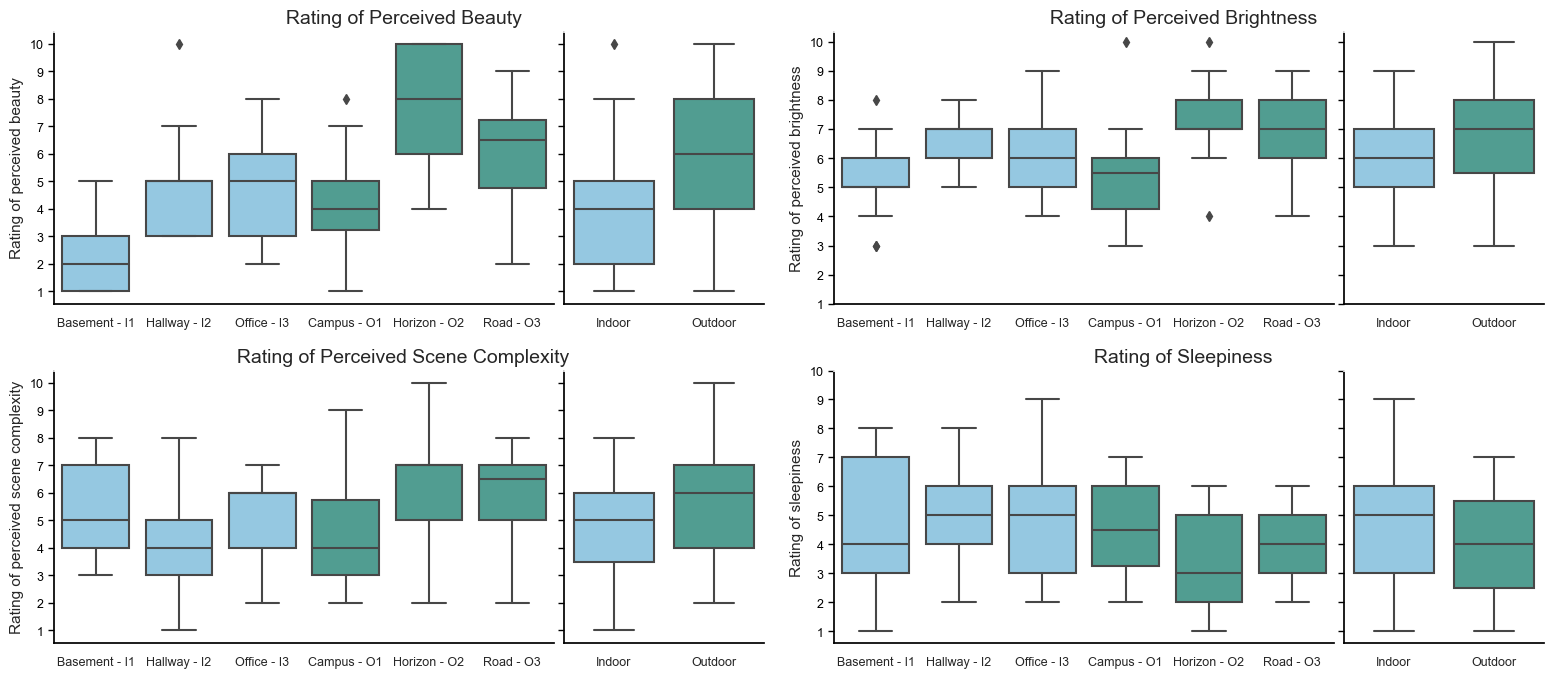

In [506]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats
#Subplots
### Rating Metrics

#set seaborn plotting aesthetics as default
sea.set()

fig, axes = plt.subplots(2, 4, figsize=(20, 12))  
my_pal_all1 = {"Basement - I1": "#88CCEE", "Hallway - I2": "#88CCEE", "Office - I3": "#88CCEE", "Campus - O1": "#44AA99", "Horizon - O2": "#44AA99", "Road - O3": "#44AA99"}
my_pal_IO1 = {"Indoor": "#88CCEE", "Outdoor": "#44AA99"}
#Create boxplot in each subplot
sea.boxplot(data=df_Q1, ax=axes[0, 0], palette=my_pal_all1)
axes[0, 0].set_ylabel('Rating of perceived beauty', family="Arial", fontsize=11)  # Add y-label as needed
axes[0, 0].tick_params(labelsize=9)
axes[0, 0].set_yticks(range(1, 11))  # Set the tick positions (1 to 10)
axes[0, 0].set_yticklabels(range(1, 11))  # Set the tick labels (1 to 10)
axes[0, 0].set_facecolor('white')
axes[0, 0].spines['left'].set_color('black')
axes[0, 0].spines['bottom'].set_color('black')
axes[0, 0].tick_params(axis='y', colors='black', length=4.0, width=1, left=True)
axes[0, 0].set_title('                                     Rating of Perceived Beauty',fontsize=14)
axes[0, 0].set_position([0, 0.6525, 0.25, 0.2269])


sea.boxplot(data=df_Q1_all, ax=axes[0,1], palette=my_pal_IO1)
axes[0, 1].set_yticklabels([])
axes[0, 1].tick_params(labelsize=9)
axes[0, 1].set_yticks(range(1, 11))
axes[0, 1].set_facecolor('white')
axes[0, 1].spines['left'].set_color('black')
axes[0, 1].spines['bottom'].set_color('black')
axes[0, 1].tick_params(axis='y', colors='black', length=4.0, width=1, left=True)
axes[0, 1].set_position([0.255, 0.6525, 0.1, 0.2269])


sea.boxplot(data=df_Q2, ax=axes[0, 2], palette=my_pal_all1)
axes[0, 2].set_ylabel('Rating of perceived brightness', family="Arial", fontsize=11)
axes[0, 2].tick_params(labelsize=9)
axes[0, 2].set_yticks(range(1, 11))  # Set the tick positions (1 to 10)
axes[0, 2].set_yticklabels(range(1, 11))  # Set the tick labels (1 to 10)
axes[0, 2].set_facecolor('white')
axes[0, 2].spines['left'].set_color('black')
axes[0, 2].spines['bottom'].set_color('black')
axes[0, 2].tick_params(axis='y', colors='black', length=4.0, width=1, left=True)
axes[0, 2].set_title('                                     Rating of Perceived Brightness',fontsize=14)
axes[0, 2].set_position([0.39, 0.6525, 0.25, 0.2269])

sea.boxplot(data=df_Q2_all, ax=axes[0,3], palette=my_pal_IO1)
axes[0, 3].set_yticklabels([])
axes[0, 3].tick_params(labelsize=9)
axes[0, 3].set_yticks(range(1, 11))
axes[0, 3].set_facecolor('white')
axes[0, 3].spines['left'].set_color('black')
axes[0, 3].spines['bottom'].set_color('black')
axes[0, 3].tick_params(axis='y', colors='black', length=4.0, width=1, left=True)
axes[0, 3].set_position([0.39+0.255, 0.6525, 0.1, 0.2269])


sea.boxplot(data=df_Q4, ax=axes[1,0], palette=my_pal_all1)
axes[1, 0].set_ylabel('Rating of perceived scene complexity', family="Arial", fontsize=11)
axes[1, 0].tick_params(labelsize=9)
axes[1, 0].set_yticks(range(1, 11))  # Set the tick positions (1 to 10)
axes[1, 0].set_yticklabels(range(1, 11))  # Set the tick labels (1 to 10)
axes[1, 0].set_facecolor('white')
axes[1, 0].spines['left'].set_color('black')
axes[1, 0].spines['bottom'].set_color('black')
axes[1, 0].tick_params(axis='y', colors='black', length=4.0, width=1, left=True)
axes[1, 0].set_title('                                     Rating of Perceived Scene Complexity',fontsize=14)
axes[1, 0].set_position([0, 0.37, 0.25, 0.2269])

sea.boxplot(data=df_Q4_all, ax=axes[1,1], palette=my_pal_IO1)
axes[1, 1].set_yticklabels([])
axes[1, 1].tick_params(labelsize=9)
axes[1, 1].set_yticks(range(1, 11))
axes[1, 1].set_facecolor('white')
axes[1, 1].spines['left'].set_color('black')
axes[1, 1].spines['bottom'].set_color('black')
axes[1, 1].tick_params(axis='y', colors='black', length=4.0, width=1, left=True)
axes[1, 1].set_position([0.255, 0.37, 0.1, 0.2269])

sea.boxplot(data=df_Q5, ax=axes[1,2], palette=my_pal_all1)
axes[1, 2].set_ylabel('Rating of sleepiness', family="Arial", fontsize=11)
axes[1, 2].tick_params(labelsize=9)
axes[1, 2].set_yticks(range(1, 11))  # Set the tick positions (1 to 10)
axes[1, 2].set_yticklabels(range(1, 11))  # Set the tick labels (1 to 10)
axes[1, 2].set_facecolor('white')
axes[1, 2].spines['left'].set_color('black')
axes[1, 2].spines['bottom'].set_color('black')
axes[1, 2].tick_params(axis='y', colors='black', length=4.0, width=1, left=True)
axes[1, 2].set_title('                                     Rating of Sleepiness',fontsize=14)
axes[1, 2].set_position([0.39, 0.37, 0.25, 0.2269])

sea.boxplot(data=df_Q5_all, ax=axes[1,3], palette=my_pal_IO1)
axes[1, 3].set_yticklabels([])
axes[1, 3].tick_params(labelsize=9)
axes[1, 3].set_yticks(range(1, 11))
axes[1, 3].set_facecolor('white')
axes[1, 3].spines['left'].set_color('black')
axes[1, 3].spines['bottom'].set_color('black')
axes[1, 3].tick_params(axis='y', colors='black', length=4.0, width=1, left=True)
axes[1, 3].set_position([0.39+0.255, 0.37, 0.1, 0.2269])

print(df_Q1)
#axes[2, 1].axis('off')
#axes[2, 0].axis('off')




In [507]:
#Statistical Tests#
import scipy.stats as stats
#ANOVA --> Gibt es SSU zwischen den Szenen im Hinblick auf die Metriken?

#ANOVA 
###Average Pupil Size
f_statistic, p_value = stats.f_oneway(*dataset_Q1_all)
print("Beauty - F-statistic:", f_statistic)
print("Beauty - P-value:", p_value)
###Average Saccade Peak Velocity
f_statistic, p_value = stats.f_oneway(*dataset_Q2_all)
print("Brightness - F-statistic:", f_statistic)
print("Brightness - P-value:", p_value)
###Average Saccade Amplitude
f_statistic, p_value = stats.f_oneway(*dataset_Q3_all)
print("Visual Comfort - F-statistic:", f_statistic)
print("Visual Comfort - P-value:", p_value)
###Average Saccade Frequency
f_statistic, p_value = stats.f_oneway(*dataset_Q4_all)
print("Complexity - F-statistic:", f_statistic)
print("Complexity - P-value:", p_value)
###Average Frequency of Fixations
f_statistic, p_value = stats.f_oneway(*dataset_Q5_all)
print("Sleepiness - F-statistic:", f_statistic)
print("Sleepiness - P-value:", p_value)
###Average Duration of Fixations



Beauty - F-statistic: 13.211008377522944
Beauty - P-value: 1.7065787470161812e-09
Brightness - F-statistic: 4.084523994168191
Brightness - P-value: 0.0022820373929703488
Visual Comfort - F-statistic: 0.8816204076885263
Visual Comfort - P-value: 0.497162146657549
Complexity - F-statistic: 3.824896198127676
Complexity - P-value: 0.0035963429500719198
Sleepiness - F-statistic: 1.257137159698912
Sleepiness - P-value: 0.2901693011099127


In [508]:
#Tukeys HSD posthoc test for question 1
import numpy as np
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

beauty1 = np.array(S1_Q1).flatten()
beauty2 = np.array(S2_Q1).flatten()
beauty3 = np.array(S3_Q1).flatten()
beauty4 = np.array(S4_Q1).flatten()
beauty5 = np.array(S5_Q1).flatten()
beauty6 = np.array(S6_Q1).flatten()


# Combine all data into one array
all_data = np.concatenate([beauty1, beauty2, beauty3, beauty4, beauty5, beauty6])

labels = ['beauty1'] * len(beauty1) + ['beauty2'] * len(beauty2) + \
         ['beauty3'] * len(beauty3) + ['beauty4'] * len(beauty4) + \
         ['beauty5'] * len(beauty5) + ['beauty6'] * len(beauty6)

data = pd.DataFrame({'data': all_data, 'Scenes': labels})

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(data['data'], data['Scenes'], alpha=0.05)

print(tukey_results)
print("mean p-value for IM1: "+ str((0.003+0.0072+0.0247+0.0+0.0)/4))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
beauty1 beauty2   2.5294  0.003   0.615 4.4438   True
beauty1 beauty3   2.3529 0.0072  0.4385 4.2674   True
beauty1 beauty4   2.1933 0.0247  0.1789 4.2077   True
beauty1 beauty5   5.5339    0.0  3.4775 7.5904   True
beauty1 beauty6    3.598    0.0  1.4936 5.7025   True
beauty2 beauty3  -0.1765 0.9998 -2.0909  1.738  False
beauty2 beauty4  -0.3361 0.9965 -2.3505 1.6782  False
beauty2 beauty5   3.0045 0.0007  0.9481  5.061   True
beauty2 beauty6   1.0686 0.6772 -1.0358 3.1731  False
beauty3 beauty4  -0.1597 0.9999  -2.174 1.8547  False
beauty3 beauty5    3.181 0.0003  1.1246 5.2374   True
beauty3 beauty6   1.2451 0.5191 -0.8593 3.3495  False
beauty4 beauty5   3.3407 0.0003  1.1909 5.4904   True
beauty4 beauty6   1.4048 0.4302  -0.791 3.6005  False
beauty5 beauty6  -1.9359  0.128 -4.1703 0.2985  False
----------------------------

In [509]:
#Tukeys HSD posthoc test for question 2

import numpy as np
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Brightness1 = np.array(S1_Q2).flatten()
Brightness2 = np.array(S2_Q2).flatten()
Brightness3 = np.array(S3_Q2).flatten()
Brightness4 = np.array(S4_Q2).flatten()
Brightness5 = np.array(S5_Q2).flatten()
Brightness6 = np.array(S6_Q2).flatten()

# Combine all data into one array
all_data = np.concatenate([Brightness1, Brightness2, Brightness3, Brightness4, Brightness5, Brightness6])

labels = ['Brightness1'] * len(Brightness1) + ['Brightness2'] * len(Brightness2) + \
         ['Brightness3'] * len(Brightness3) + ['Brightness4'] * len(Brightness4) + \
         ['Brightness5'] * len(Brightness5) + ['Brightness6'] * len(Brightness6) 

data = pd.DataFrame({'data': all_data, 'Scenes': labels})

tukey_results = pairwise_tukeyhsd(data['data'], data['Scenes'], alpha=0.025)

print(tukey_results)
print("mean p-value for CS5: ")

     Multiple Comparison of Means - Tukey HSD, FWER=0.03     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
Brightness1 Brightness2   1.2941 0.0966 -0.2542 2.8424  False
Brightness1 Brightness3   0.7059 0.6991 -0.8424 2.2542  False
Brightness1 Brightness4   0.1471 0.9997  -1.482 1.7762  False
Brightness1 Brightness5   1.8778 0.0073  0.2147 3.5409   True
Brightness1 Brightness6   1.4804 0.0746 -0.2215 3.1823  False
Brightness2 Brightness3  -0.5882 0.8333 -2.1365   0.96  False
Brightness2 Brightness4  -1.1471  0.234 -2.7762  0.482  False
Brightness2 Brightness5   0.5837 0.8747 -1.0794 2.2468  False
Brightness2 Brightness6   0.1863 0.9993 -1.5157 1.8882  False
Brightness3 Brightness4  -0.5588 0.8849 -2.1879 1.0703  False
Brightness3 Brightness5   1.1719 0.2332 -0.4912 2.8351  False
Brightness3 Brightness6   0.7745 0.7007 -0.9274 2.4764  False
Brightness4 Brightness5   1.7308  0.026 -0.0078 3.4694  False
Brightne

Text(0.5, 1.0, 'Average Frequency of Fixations')

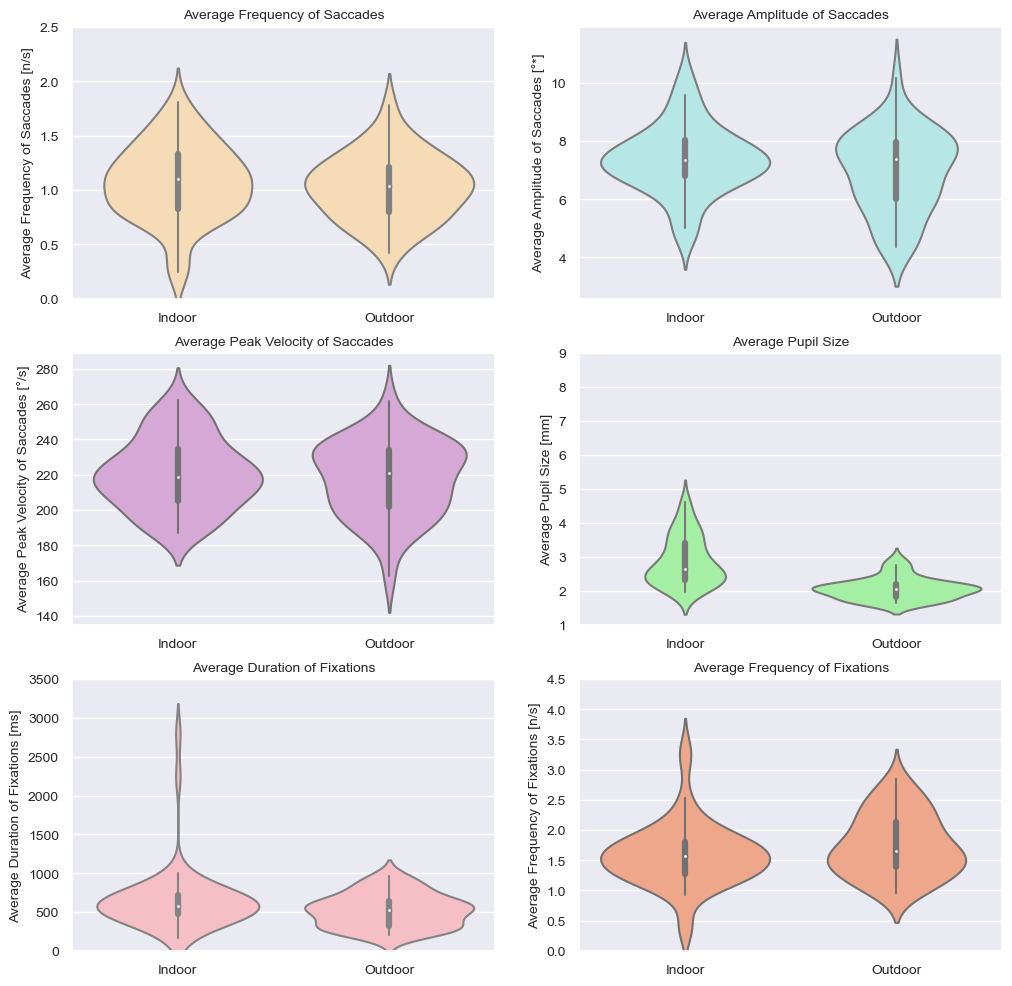

In [511]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats
#Subplots
### Light Data + Indoor/Outdoor 6 Metrics
# Spaltennamen festlegen (optional)

#set seaborn plotting aesthetics as default
sea.set()

#define plotting region (4 rows,  2 columns)
# Define plotting region (4 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # You can adjust the figsize as needed

#Create boxplot in each subplot

sea.violinplot(data=df_Sfreq_f, ax=axes[0,0], color="navajowhite")
axes[0, 0].set_ylabel('Average Frequency of Saccades [n/s]', family="Arial", fontsize=10)
axes[0, 0].tick_params(labelsize=10)
axes[0, 0].set_ylim(0, 2.5)
axes[0, 0].set_title('Average Frequency of Saccades',fontsize=10)


sea.violinplot(data=df_Samp_f, ax=axes[0,1], color="paleturquoise")
axes[0, 1].set_ylabel('Average Amplitude of Saccades [°*]', family="Arial", fontsize=10)
axes[0, 1].tick_params(labelsize=10)
axes[0, 1].set_title('Average Amplitude of Saccades',fontsize=10)

sea.violinplot(data=df_Svelo_f, ax=axes[1,0], color="plum")
axes[1, 0].set_ylabel('Average Peak Velocity of Saccades [°/s]', family="Arial", fontsize=10)
axes[1, 0].tick_params(labelsize=10)
axes[1, 0].set_title('Average Peak Velocity of Saccades',fontsize=10)


sea.violinplot(data=df_Pup_f, ax=axes[1,1], color="palegreen")
axes[1, 1].set_ylabel('Average Pupil Size [mm]', family="Arial", fontsize=10)
axes[1, 1].tick_params(labelsize=10)
axes[1, 1].set_ylim(1, 9)
axes[1, 1].set_title('Average Pupil Size',fontsize=10)


sea.violinplot(data=df_fdur_f, ax=axes[2,0], color="lightpink")
axes[2, 0].set_ylabel('Average Duration of Fixations [ms]', family="Arial", fontsize=10)
axes[2, 0].tick_params(labelsize=10)
axes[2, 0].set_ylim(0, 3500)
axes[2, 0].set_title('Average Duration of Fixations',fontsize=10)


sea.violinplot(data=df_fix_f, ax=axes[2,1], color="lightsalmon")
axes[2, 1].set_ylabel('Average Frequency of Fixations [n/s]', family="Arial", fontsize=10)
axes[2, 1].tick_params(labelsize=10)
axes[2, 1].set_ylim(0, 4.5)
axes[2, 1].set_title('Average Frequency of Fixations',fontsize=10)



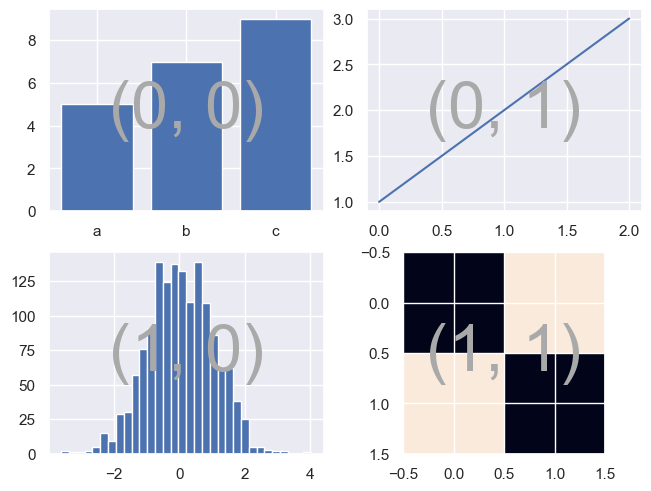

In [512]:

# Helper function used for visualization in the following examples
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, axes in ax_dict.items():
        axes.text(0.5, 0.5, k, transform=axes.transAxes, **kw)

np.random.seed(19680801)
hist_data = np.random.randn(1_500)


fig = plt.figure(constrained_layout=True)
ax_array = fig.subplots(2, 2, squeeze=False)

ax_array[0, 0].bar(["a", "b", "c"], [5, 7, 9])
ax_array[0, 1].plot([1, 2, 3])
ax_array[1, 0].hist(hist_data, bins="auto")
ax_array[1, 1].imshow([[1, 2], [2, 1]])

identify_axes(
    {(j, k): a for j, r in enumerate(ax_array) for k, a in enumerate(r)},
)

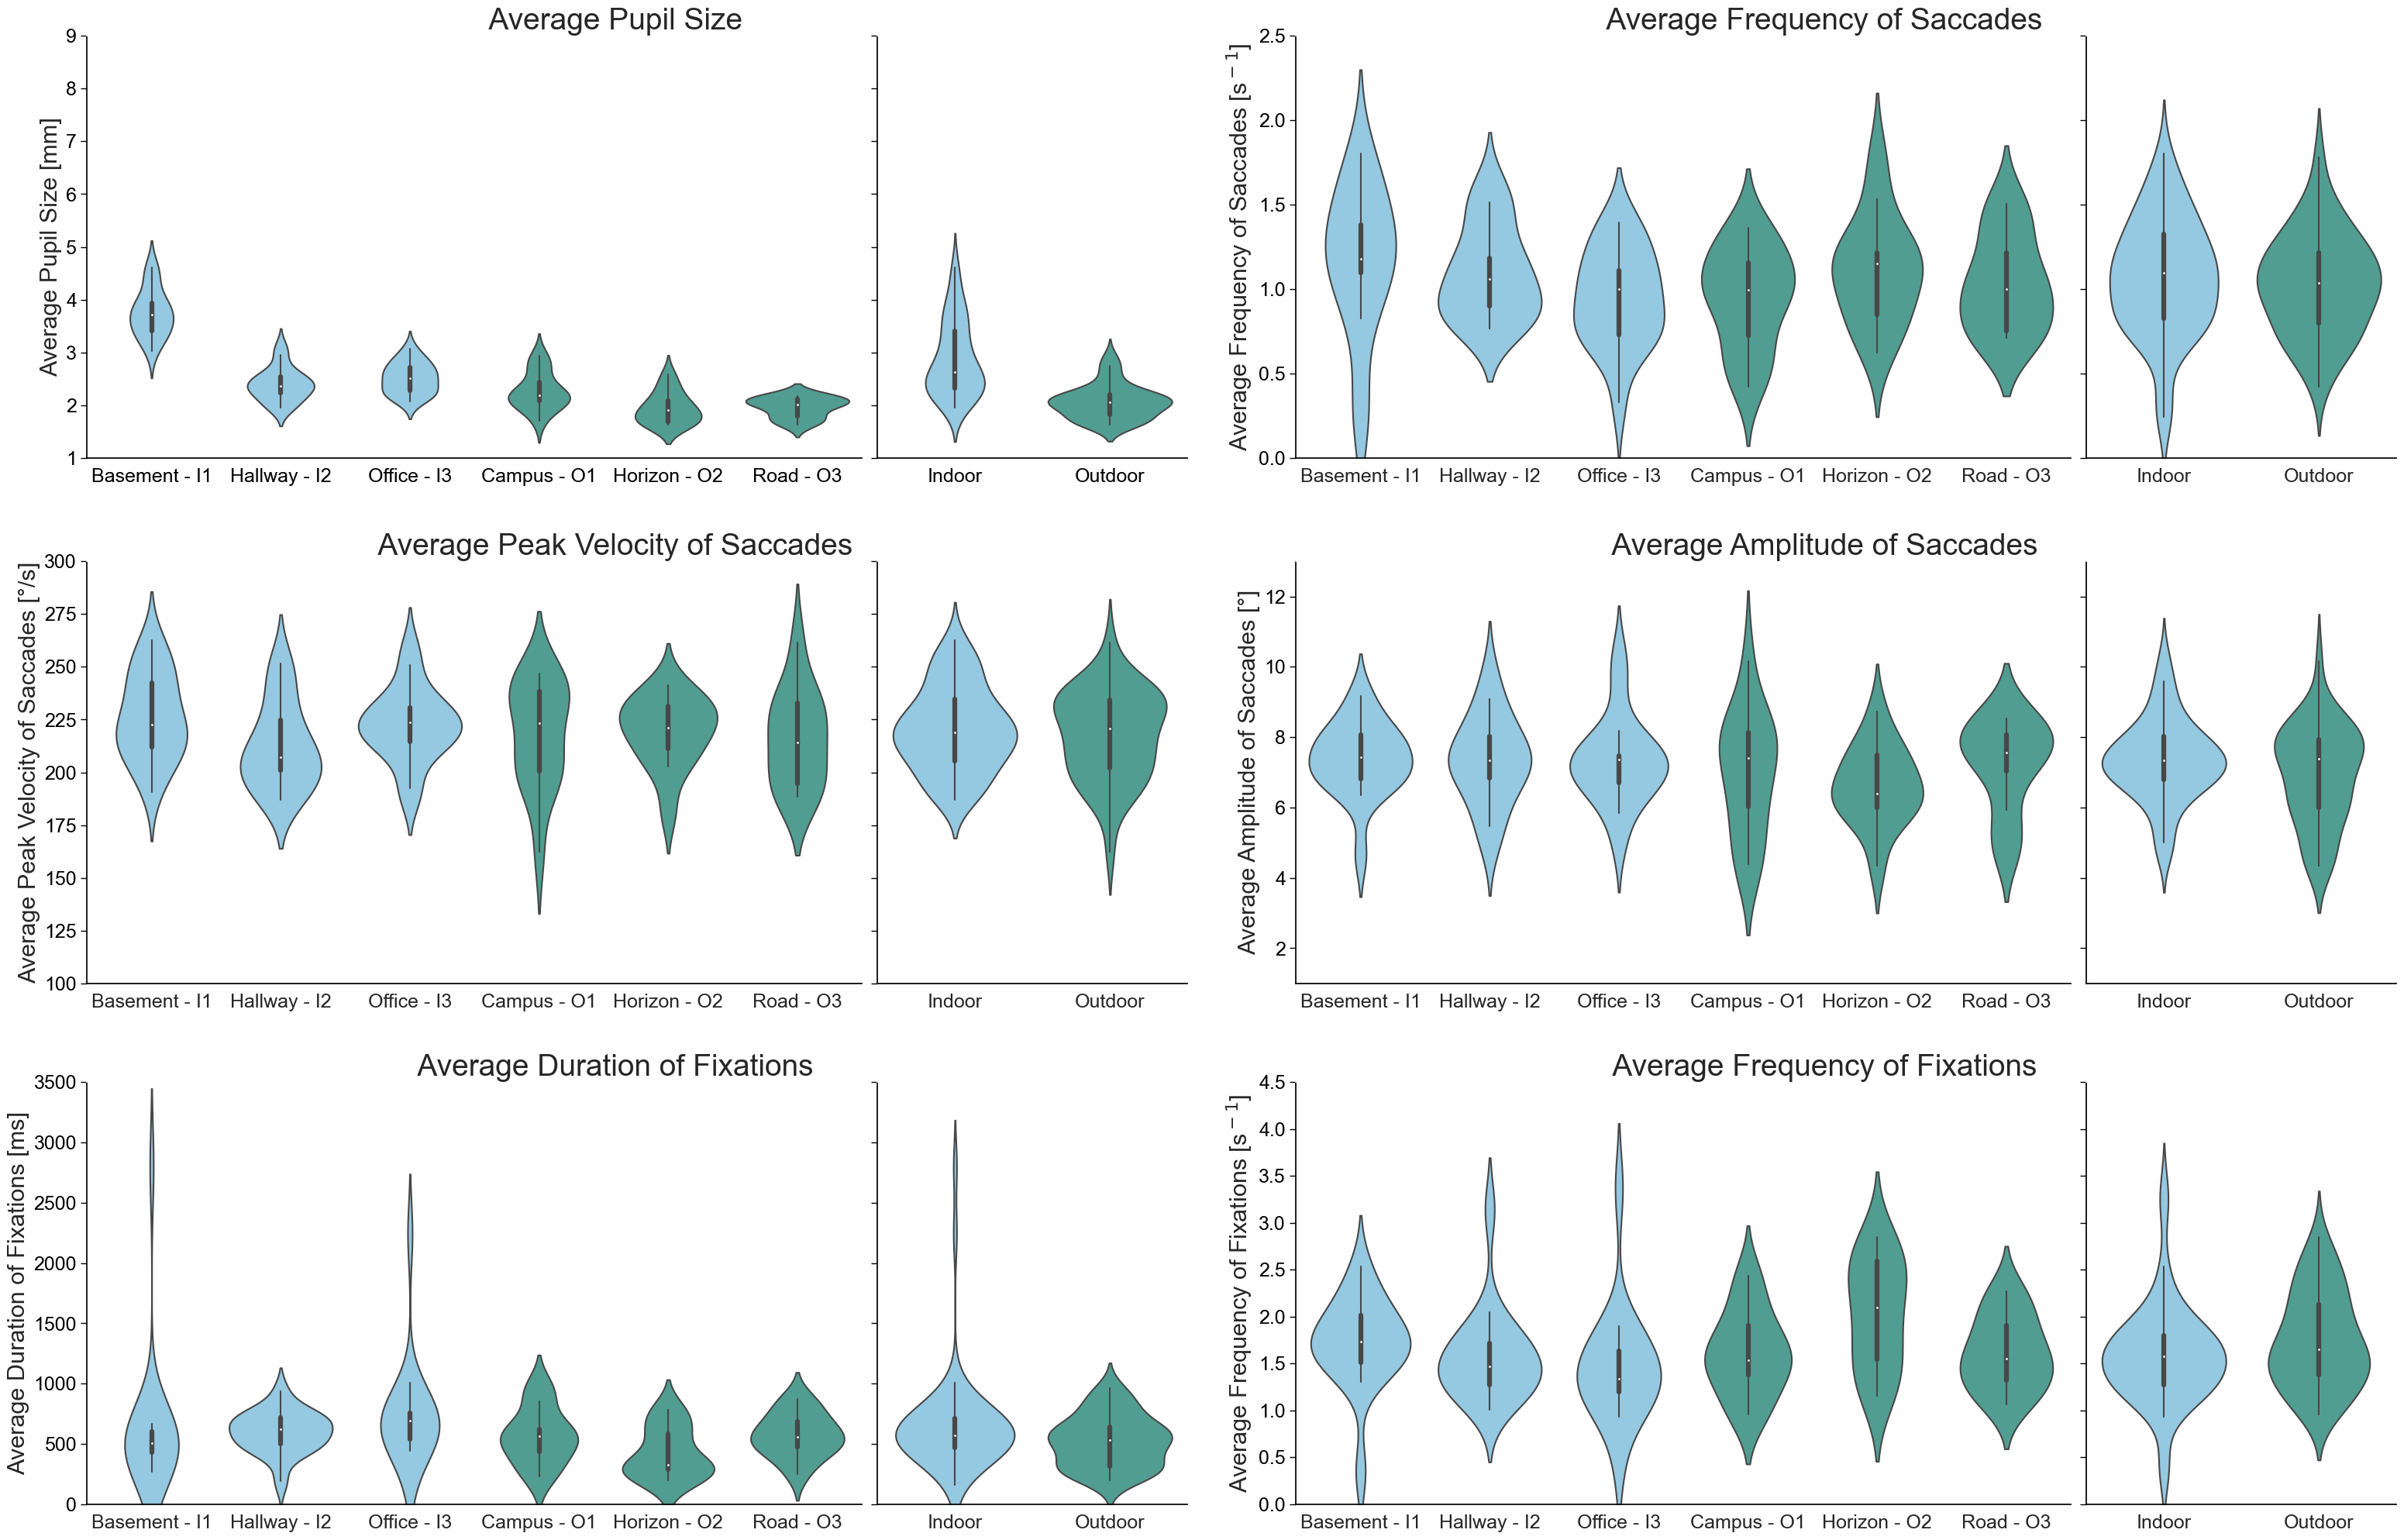

In [514]:
#Summarized eye movement results as violinplots
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats


sea.set()

fig, axes = plt.subplots(3, 4, figsize=(40, 24))  
fig.set_facecolor('white')
###Pupil Size
       
my_pal_all1 = {"Basement - I1": "#88CCEE", "Hallway - I2": "#88CCEE", "Office - I3": "#88CCEE", "Campus - O1": "#44AA99", "Horizon - O2": "#44AA99", "Road - O3": "#44AA99"}
my_pal_IO1 = {"Indoor": "#88CCEE", "Outdoor": "#44AA99"}

sea.violinplot(data=df_pupil, ax=axes[0, 0], palette=my_pal_all1)
axes[0, 0].set_ylabel('Average Pupil Size [mm]', family="Arial", fontsize=22)
axes[0, 0].tick_params(labelsize=18, colors='black') 
axes[0, 0].set_ylim(1, 9)
axes[0, 0].set_facecolor('white')
axes[0, 0].spines['left'].set_color('black')
axes[0, 0].spines['bottom'].set_color('black')
axes[0, 0].tick_params(axis='y', colors='black', length=6.0, width=1, left=True, direction= 'out')
axes[0, 0].set_title('                                  Average Pupil Size', fontsize=28)
axes[0, 0].set_position([0, 0.6525, 0.25, 0.2269])

sea.violinplot(data=df_Pup_f, ax=axes[0, 1], palette=my_pal_IO1)
axes[0, 1].tick_params(labelsize=18, colors='black')  
axes[0, 1].set_yticklabels([])
axes[0, 1].set_ylim(1, 9)
axes[0, 1].set_facecolor('white')
axes[0, 1].spines['left'].set_color('black')
axes[0, 1].spines['bottom'].set_color('black')
axes[0, 1].yaxis.label.set_color('black')
axes[0, 1].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[0, 1].set_position([0.255, 0.6525, 0.1, 0.2269])

my_pal_all2 = {"Basement - I1": "darkkhaki", "Hallway - I2": "darkkhaki", "Office - I3": "darkkhaki", "Campus - O1": "khaki", "Horizon - O2": "khaki", "Road - O3": "khaki"}
my_pal_IO2 = {"Indoor": "darkkhaki", "Outdoor": "khaki"}
sea.violinplot(data=df_sacc_all, ax=axes[0,2], palette=my_pal_all1)
axes[0, 2].set_ylabel('Average Frequency of Saccades [s$^-$$^1$]', family="Arial", fontsize=22)
axes[0, 2].tick_params(labelsize=18)
axes[0, 2].set_ylim(0, 2.5)
axes[0, 2].set_facecolor('white')
axes[0, 2].spines['left'].set_color('black')
axes[0, 2].spines['bottom'].set_color('black')
axes[0, 2].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[0, 2].set_title('                                  Average Frequency of Saccades',fontsize=28)
axes[0, 2].set_position([0.39, 0.6525, 0.25, 0.2269])

sea.violinplot(data=df_Sfreq_f, ax=axes[0,3], palette=my_pal_IO1)
axes[0, 3].set_yticklabels([])
axes[0, 3].tick_params(labelsize=18)
axes[0, 3].set_ylim(0, 2.5)
axes[0, 3].set_facecolor('white')
axes[0, 3].spines['left'].set_color('black')
axes[0, 3].spines['bottom'].set_color('black')
axes[0, 3].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[0, 3].set_position([0.39+0.255, 0.6525, 0.1, 0.2269])

###Velo of Saccades
my_pal_all3 = {"Basement - I1": "darkturquoise", "Hallway - I2": "darkturquoise", "Office - I3": "darkturquoise", "Campus - O1": "paleturquoise", "Horizon - O2": "paleturquoise", "Road - O3": "paleturquoise"}
my_pal_IO3 = {"Indoor": "darkturquoise", "Outdoor": "paleturquoise"}
sea.violinplot(data=df_velo_all, ax=axes[1,0], palette=my_pal_all1)
axes[1, 0].set_ylabel('Average Peak Velocity of Saccades [°/s]', family="Arial", fontsize=22)
axes[1, 0].tick_params(labelsize=18)
axes[1, 0].set_ylim(100, 300)
axes[1, 0].set_facecolor('white')
axes[1, 0].spines['left'].set_color('black')
axes[1, 0].spines['bottom'].set_color('black')
axes[1, 0].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[1, 0].set_title('                                  Average Peak Velocity of Saccades',fontsize=28)
axes[1, 0].set_position([0, 0.37, 0.25, 0.2269])


sea.violinplot(data=df_Svelo_f, ax=axes[1,1], palette=my_pal_IO1)
axes[1, 1].set_yticklabels([])
axes[1, 1].tick_params(labelsize=18)
axes[1, 1].set_ylim(100, 300)
axes[1, 1].set_facecolor('white')
axes[1, 1].spines['left'].set_color('black')
axes[1, 1].spines['bottom'].set_color('black')
axes[1, 1].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[1, 1].set_position([0.255, 0.37, 0.1, 0.2269])

###Amplitude of Saccades
my_pal_all4 = {"Basement - I1": "red", "Hallway - I2": "mediumorchid", "Office - I3": "mediumorchid", "Campus - O1": "violet", "Horizon - O2": "violet", "Road - O3": "violet"}
my_pal_IO4 = {"Indoor": "mediumorchid", "Outdoor": "violet"}
sea.violinplot(data=df_amp_all, ax=axes[1,2], palette=my_pal_all1)
axes[1, 2].set_ylabel('Average Amplitude of Saccades [°]', family="Arial", fontsize=22)
axes[1, 2].tick_params(labelsize=18)
axes[1, 2].set_title('                                  Average Amplitude of Saccades',fontsize=28)
axes[1, 2].set_ylim(1, 13)
axes[1, 2].set_facecolor('white')
axes[1, 2].spines['left'].set_color('black')
axes[1, 2].spines['bottom'].set_color('black')
axes[1, 2].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[1, 2].set_position([0.39, 0.37, 0.25, 0.2269])

sea.violinplot(data=df_Samp_f, ax=axes[1,3], palette=my_pal_IO1)
axes[1, 3].set_yticklabels([])
axes[1, 3].tick_params(labelsize=18)
axes[1, 3].set_ylim(1, 13)
axes[1, 3].set_facecolor('white')
axes[1, 3].spines['left'].set_color('black')
axes[1, 3].spines['bottom'].set_color('black')
axes[1, 3].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[1, 3].set_position([0.39+0.255, 0.37, 0.1, 0.2269])

###Duration of Fixation
my_pal_all5 = {"Basement - I1": "sandybrown", "Hallway - I2": "sandybrown", "Office - I3": "sandybrown", "Campus - O1": "peachpuff", "Horizon - O2": "peachpuff", "Road - O3": "peachpuff"}
my_pal_IO5 = {"Indoor": "sandybrown", "Outdoor": "peachpuff"}
sea.violinplot(data=df_dur_all, ax=axes[2,0], palette=my_pal_all1)
axes[2, 0].set_ylabel('Average Duration of Fixations [ms]', family="Arial", fontsize=22)
axes[2, 0].tick_params(labelsize=18)
axes[2, 0].set_ylim(0, 3500)
axes[2, 0].set_facecolor('white')
axes[2, 0].spines['left'].set_color('black')
axes[2, 0].spines['bottom'].set_color('black')
axes[2, 0].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[2, 0].set_title('                                  Average Duration of Fixations',fontsize=28)
axes[2, 0].set_position([0, 0.37-0.28, 0.25, 0.2269])

sea.violinplot(data=df_fdur_f, ax=axes[2,1], palette=my_pal_IO1)
axes[2, 1].set_yticklabels([])
axes[2, 1].tick_params(labelsize=18)
axes[2, 1].set_ylim(0, 3500)
axes[2, 1].set_facecolor('white')
axes[2, 1].spines['left'].set_color('black')
axes[2, 1].spines['bottom'].set_color('black')
axes[2, 1].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[2, 1].set_position([0.255, 0.37-0.28, 0.1, 0.2269])

###Frequency of Fixation
my_pal_all6 = {"Basement - I1": "tomato", "Hallway - I2": "tomato", "Office - I3": "tomato", "Campus - O1": "lightsalmon", "Horizon - O2": "lightsalmon", "Road - O3": "lightsalmon"}
my_pal_IO6 = {"Indoor": "tomato", "Outdoor": "lightsalmon"}
sea.violinplot(data=df_fix_all, ax=axes[2,2], palette=my_pal_all1)
axes[2, 2].set_ylabel('Average Frequency of Fixations [s$^-$$^1$]', family="Arial", fontsize=22)
axes[2, 2].tick_params(labelsize=18)
axes[2, 2].set_ylim(0, 4.5)
axes[2, 2].set_facecolor('white')
axes[2, 2].spines['left'].set_color('black')
axes[2, 2].spines['bottom'].set_color('black')
axes[2, 2].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[2, 2].set_title('                                  Average Frequency of Fixations',fontsize=28)
axes[2, 2].set_position([0.39, 0.37-0.28, 0.25, 0.2269])

sea.violinplot(data=df_fix_f, ax=axes[2,3], palette=my_pal_IO1)
axes[2, 3].set_yticklabels([])
axes[2, 3].tick_params(labelsize=18)
axes[2, 3].set_ylim(0, 4.5)
axes[2, 3].set_facecolor('white')
axes[2, 3].spines['left'].set_color('black')
axes[2, 3].spines['bottom'].set_color('black')
axes[2, 3].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[2, 3].set_position([0.39+0.255, 0.37-0.28, 0.1, 0.2269])


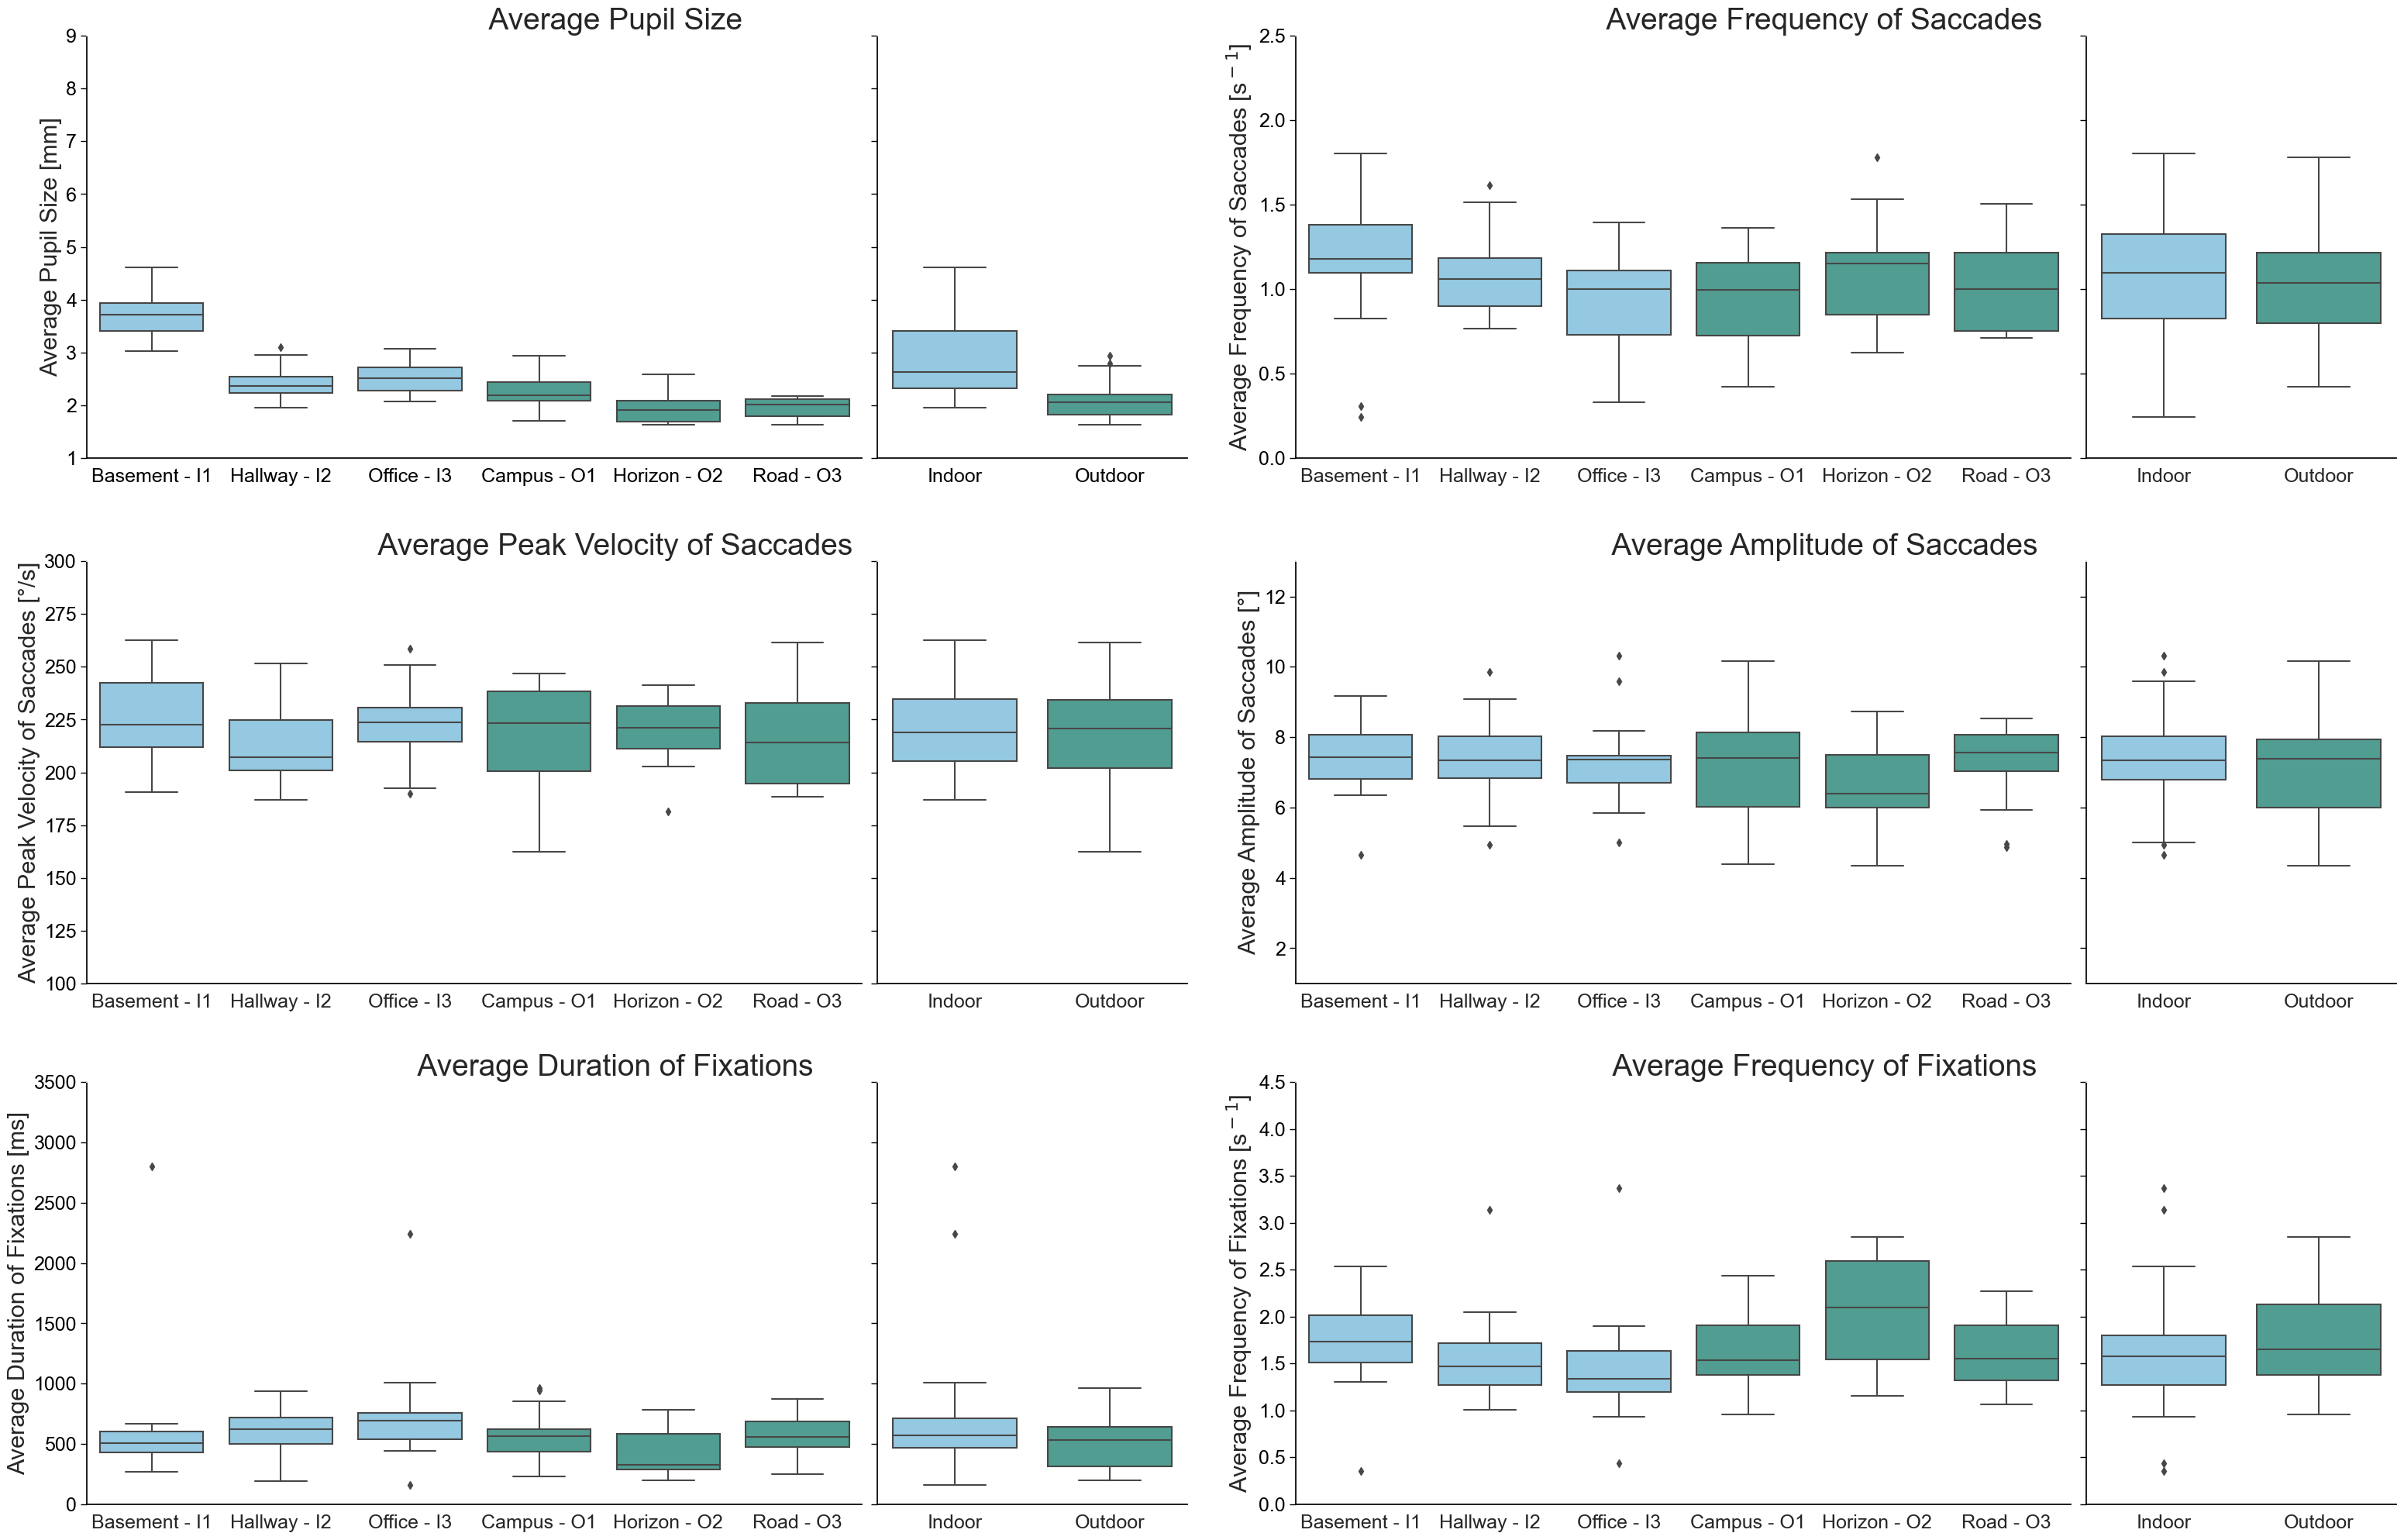

In [517]:
#Summarized eye movement results as boxplots
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats


sea.set()

fig, axes = plt.subplots(3, 4, figsize=(40, 24))  
fig.set_facecolor('white')
###Pupil Size
       
my_pal_all1 = {"Basement - I1": "#88CCEE", "Hallway - I2": "#88CCEE", "Office - I3": "#88CCEE", "Campus - O1": "#44AA99", "Horizon - O2": "#44AA99", "Road - O3": "#44AA99"}
my_pal_IO1 = {"Indoor": "#88CCEE", "Outdoor": "#44AA99"}

sea.boxplot(data=df_pupil, ax=axes[0, 0], palette=my_pal_all1)
axes[0, 0].set_ylabel('Average Pupil Size [mm]', family="Arial", fontsize=22)
axes[0, 0].tick_params(labelsize=18, colors='black') 
axes[0, 0].set_ylim(1, 9)
axes[0, 0].set_facecolor('white')
axes[0, 0].spines['left'].set_color('black')
axes[0, 0].spines['bottom'].set_color('black')
axes[0, 0].tick_params(axis='y', colors='black', length=6.0, width=1, left=True, direction= 'out')
axes[0, 0].set_title('                                  Average Pupil Size', fontsize=28)
axes[0, 0].set_position([0, 0.6525, 0.25, 0.2269])

sea.boxplot(data=df_Pup_f, ax=axes[0, 1], palette=my_pal_IO1)
axes[0, 1].tick_params(labelsize=18, colors='black') 
axes[0, 1].set_yticklabels([])
axes[0, 1].set_ylim(1, 9)
axes[0, 1].set_facecolor('white')
axes[0, 1].spines['left'].set_color('black')
axes[0, 1].spines['bottom'].set_color('black')
axes[0, 1].yaxis.label.set_color('black')
axes[0, 1].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[0, 1].set_position([0.255, 0.6525, 0.1, 0.2269])

my_pal_all2 = {"Basement - I1": "darkkhaki", "Hallway - I2": "darkkhaki", "Office - I3": "darkkhaki", "Campus - O1": "khaki", "Horizon - O2": "khaki", "Road - O3": "khaki"}
my_pal_IO2 = {"Indoor": "darkkhaki", "Outdoor": "khaki"}
sea.boxplot(data=df_sacc_all, ax=axes[0,2], palette=my_pal_all1)
axes[0, 2].set_ylabel('Average Frequency of Saccades [s$^-$$^1$]', family="Arial", fontsize=22)
axes[0, 2].tick_params(labelsize=18)
axes[0, 2].set_ylim(0, 2.5)
axes[0, 2].set_facecolor('white')
axes[0, 2].spines['left'].set_color('black')
axes[0, 2].spines['bottom'].set_color('black')
axes[0, 2].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[0, 2].set_title('                                  Average Frequency of Saccades',fontsize=28)
axes[0, 2].set_position([0.39, 0.6525, 0.25, 0.2269])

sea.boxplot(data=df_Sfreq_f, ax=axes[0,3], palette=my_pal_IO1)
axes[0, 3].set_yticklabels([])
axes[0, 3].tick_params(labelsize=18)
axes[0, 3].set_ylim(0, 2.5)
axes[0, 3].set_facecolor('white')
axes[0, 3].spines['left'].set_color('black')
axes[0, 3].spines['bottom'].set_color('black')
axes[0, 3].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[0, 3].set_position([0.39+0.255, 0.6525, 0.1, 0.2269])

###Velo of Saccades
my_pal_all3 = {"Basement - I1": "darkturquoise", "Hallway - I2": "darkturquoise", "Office - I3": "darkturquoise", "Campus - O1": "paleturquoise", "Horizon - O2": "paleturquoise", "Road - O3": "paleturquoise"}
my_pal_IO3 = {"Indoor": "darkturquoise", "Outdoor": "paleturquoise"}
sea.boxplot(data=df_velo_all, ax=axes[1,0], palette=my_pal_all1)
axes[1, 0].set_ylabel('Average Peak Velocity of Saccades [°/s]', family="Arial", fontsize=22)
axes[1, 0].tick_params(labelsize=18)
axes[1, 0].set_ylim(100, 300)
axes[1, 0].set_facecolor('white')
axes[1, 0].spines['left'].set_color('black')
axes[1, 0].spines['bottom'].set_color('black')
axes[1, 0].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[1, 0].set_title('                                  Average Peak Velocity of Saccades',fontsize=28)
axes[1, 0].set_position([0, 0.37, 0.25, 0.2269])


sea.boxplot(data=df_Svelo_f, ax=axes[1,1], palette=my_pal_IO1)
axes[1, 1].set_yticklabels([])
axes[1, 1].tick_params(labelsize=18)
axes[1, 1].set_ylim(100, 300)
axes[1, 1].set_facecolor('white')
axes[1, 1].spines['left'].set_color('black')
axes[1, 1].spines['bottom'].set_color('black')
axes[1, 1].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[1, 1].set_position([0.255, 0.37, 0.1, 0.2269])

###Amplitude of Saccades
my_pal_all4 = {"Basement - I1": "red", "Hallway - I2": "mediumorchid", "Office - I3": "mediumorchid", "Campus - O1": "violet", "Horizon - O2": "violet", "Road - O3": "violet"}
my_pal_IO4 = {"Indoor": "mediumorchid", "Outdoor": "violet"}
sea.boxplot(data=df_amp_all, ax=axes[1,2], palette=my_pal_all1)
axes[1, 2].set_ylabel('Average Amplitude of Saccades [°]', family="Arial", fontsize=22)
axes[1, 2].tick_params(labelsize=18)
axes[1, 2].set_title('                                  Average Amplitude of Saccades',fontsize=28)
axes[1, 2].set_ylim(1, 13)
axes[1, 2].set_facecolor('white')
axes[1, 2].spines['left'].set_color('black')
axes[1, 2].spines['bottom'].set_color('black')
axes[1, 2].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[1, 2].set_position([0.39, 0.37, 0.25, 0.2269])

sea.boxplot(data=df_Samp_f, ax=axes[1,3], palette=my_pal_IO1)
axes[1, 3].set_yticklabels([])
axes[1, 3].tick_params(labelsize=18)
axes[1, 3].set_ylim(1, 13)
axes[1, 3].set_facecolor('white')
axes[1, 3].spines['left'].set_color('black')
axes[1, 3].spines['bottom'].set_color('black')
axes[1, 3].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[1, 3].set_position([0.39+0.255, 0.37, 0.1, 0.2269])

###Duration of Fixation
my_pal_all5 = {"Basement - I1": "sandybrown", "Hallway - I2": "sandybrown", "Office - I3": "sandybrown", "Campus - O1": "peachpuff", "Horizon - O2": "peachpuff", "Road - O3": "peachpuff"}
my_pal_IO5 = {"Indoor": "sandybrown", "Outdoor": "peachpuff"}
sea.boxplot(data=df_dur_all, ax=axes[2,0], palette=my_pal_all1)
axes[2, 0].set_ylabel('Average Duration of Fixations [ms]', family="Arial", fontsize=22)
axes[2, 0].tick_params(labelsize=18)
axes[2, 0].set_ylim(0, 3500)
axes[2, 0].set_facecolor('white')
axes[2, 0].spines['left'].set_color('black')
axes[2, 0].spines['bottom'].set_color('black')
axes[2, 0].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[2, 0].set_title('                                  Average Duration of Fixations',fontsize=28)
axes[2, 0].set_position([0, 0.37-0.28, 0.25, 0.2269])

sea.boxplot(data=df_fdur_f, ax=axes[2,1], palette=my_pal_IO1)
axes[2, 1].set_yticklabels([])
axes[2, 1].tick_params(labelsize=18)
axes[2, 1].set_ylim(0, 3500)
axes[2, 1].set_facecolor('white')
axes[2, 1].spines['left'].set_color('black')
axes[2, 1].spines['bottom'].set_color('black')
axes[2, 1].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[2, 1].set_position([0.255, 0.37-0.28, 0.1, 0.2269])

###Frequency of Fixation
my_pal_all6 = {"Basement - I1": "tomato", "Hallway - I2": "tomato", "Office - I3": "tomato", "Campus - O1": "lightsalmon", "Horizon - O2": "lightsalmon", "Road - O3": "lightsalmon"}
my_pal_IO6 = {"Indoor": "tomato", "Outdoor": "lightsalmon"}
sea.boxplot(data=df_fix_all, ax=axes[2,2], palette=my_pal_all1)
axes[2, 2].set_ylabel('Average Frequency of Fixations [s$^-$$^1$]', family="Arial", fontsize=22)
axes[2, 2].tick_params(labelsize=18)
axes[2, 2].set_ylim(0, 4.5)
axes[2, 2].set_facecolor('white')
axes[2, 2].spines['left'].set_color('black')
axes[2, 2].spines['bottom'].set_color('black')
axes[2, 2].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[2, 2].set_title('                                  Average Frequency of Fixations',fontsize=28)
axes[2, 2].set_position([0.39, 0.37-0.28, 0.25, 0.2269])

sea.boxplot(data=df_fix_f, ax=axes[2,3], palette=my_pal_IO1)
axes[2, 3].set_yticklabels([])
axes[2, 3].tick_params(labelsize=18)
axes[2, 3].set_ylim(0, 4.5)
axes[2, 3].set_facecolor('white')
axes[2, 3].spines['left'].set_color('black')
axes[2, 3].spines['bottom'].set_color('black')
axes[2, 3].tick_params(axis='y', colors='black', length=6.0, width=1, left=True)
axes[2, 3].set_position([0.39+0.255, 0.37-0.28, 0.1, 0.2269])

In [11]:
#Combining the images from Bins_plot (different Notebook) and whole eye movement duration to one image + adding of letters
from PIL import Image, ImageDraw, ImageFont

# Function to add letter to image
def add_letter_to_image(image, letter, font_size=50, position=(0, 0)):
    draw = ImageDraw.Draw(image)
    
    # Load a system with good size
    font_path = "/Library/Fonts/Arial.ttf"  # Update with your font path
    font = ImageFont.truetype(font_path, font_size)
    
    draw.text(position, letter, fill='black', font=font)

# Load the two images
image2_path = '/Users/alex/Desktop/Publi/EyeMoveBINS_Plot.png'  # Update with your image path
image1_path = '/Users/alex/Desktop/Publi/Eye_move_plots.png'  # Update with your image path

image1 = Image.open(image1_path)
image2 = Image.open(image2_path)

# Resize images to have the same width 
if image1.size[0] != image2.size[0]:
    width = min(image1.size[0], image2.size[0])
    image1 = image1.resize((width, int(width * image1.size[1] / image1.size[0])))
    image2 = image2.resize((width, int(width * image2.size[1] / image2.size[0])))

add_letter_to_image(image1, 'A', font_size=50, position=(10, 10))
add_letter_to_image(image2, 'B', font_size=50, position=(10, 10))

# Combine images
combined_image = Image.new('RGB', (image1.width + 100, image1.height + image2.height + 100))
combined_image.paste(image1, (50, 25))
combined_image.paste(image2, (50, image1.height + 75))

combined_image.show()
# combined_image.save('combined_image.jpg')  # Save the combined image to disk

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(20,12))  

#Create boxplot in each subplot
sea.boxplot(data=df_illu, ax=axes[0], color="springgreen")
axes[0].set_ylabel('Photopic illuminance [lux]', family="Arial", fontsize=10)  # Add y-label as needed
axes[0].set_yscale('log')
axes[0].set_title("Photopic illuminance",fontsize=12)
axes[0].tick_params(labelsize=10)

sea.boxplot(data=df_mel, ax=axes[1], color="deepskyblue")
axes[1].set_ylabel('Melanopic EDI [W/m^2]', family="Arial", fontsize=10)
axes[1].set_title('Melanopic EDI',fontsize=12)
axes[1].set_yscale('log')
axes[1].tick_params(labelsize=10)
#Create boxplot in each subplot

In [ ]:
###Eye tracking Quality Analysis (comparison between indoor and outdoor)####
######################## SCENE 5 ########################
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.linear_model import LinearRegression

Illu_S4 = []
ETQ_S4_y = []
Illu_S5 = []
ETQ_S5_y = []
Illu_S6 = []
ETQ_S6_y = []
#Erstelle Dictionary für alle Daten
data_dict = {}

def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Convert to float before comparing
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Light/mcs15_ET1.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))


count = 101
for participant in data_dict:
    if len(Illu_S4) < 18:
        if count not in (108, 110):
            if count not in (102, 120):
                S4_participant = data_dict.get(count, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                #print(S4_float_list)
                Illu_S4.append(S4_float_list[7])
                count = count + 1
            else:
                S4_participant = data_dict.get(count, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                #print(S4_float_list)
                Illu_S4.append(S4_float_list[1])
                count = count + 1
        else: 
            count = count + 1
            continue

count = 101
for participant in data_dict:
    if len(Illu_S5) < 18:
        if count not in (108, 110):
            if count not in (102, 120):
                S5_participant = data_dict.get(count, {})
                S5_participant_data_list = list(S5_participant.values())
                #print(S5_participant_data_list)
                S5_float_list = [item[0] for item in S5_participant_data_list]
                #print(S5_float_list)
                Illu_S5.append(S5_float_list[10])
                count = count + 1
            else:
                S5_participant = data_dict.get(count, {})
                S5_participant_data_list = list(S5_participant.values())
                #print(S5_participant_data_list)
                S5_float_list = [item[0] for item in S5_participant_data_list]
                #print(S5_float_list)
                Illu_S5.append(S5_float_list[4])
                count = count + 1
        else: 
            count = count + 1
            continue

count = 101
for participant in data_dict:
    if len(Illu_S6) < 18:
        if count not in (108, 110):
            if count not in (102, 120):
                S6_participant = data_dict.get(count, {})
                S6_participant_data_list = list(S6_participant.values())
                #print(S5_participant_data_list)
                S6_float_list = [item[0] for item in S6_participant_data_list]
                #print(S5_float_list)
                Illu_S6.append(S6_float_list[13])
                count = count + 1
            else:
                S6_participant = data_dict.get(count, {})
                S6_participant_data_list = list(S6_participant.values())
                #print(S5_participant_data_list)
                S6_float_list = [item[0] for item in S6_participant_data_list]
                #print(S5_float_list)
                Illu_S6.append(S6_float_list[7])
                count = count + 1
        else: 
            count = count + 1
            continue
##Listen von klein nach groß sortieren
sorted_Illu_S4_x = sorted(Illu_S4)
sorted_Illu_S5_x = sorted(Illu_S5)
sorted_Illu_S6_x = sorted(Illu_S6)

##Jedem Wert die zugehörige ETQ zuordnen#
count = 101
#list of the participants
p_list_S4 = [105,112,117,107,111,115,103,116,118,104,113,102,114,101,106,109]
for i in p_list_S4:
    if len(ETQ_S4_y) < 18:
        if i not in (108, 110):
            if i not in (102, 120):
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                ETQ_S4_y.append(S4_float_list[8])
                count = count +1
            else:
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                #print(S5_float_list)
                ETQ_S4_y.append(S4_float_list[2])
                count = count +1
        else:
            count = count +1
            
#print(ETQ_S4_y)

count = 101
#list of the participants

p_list_S5 = [105,112,115,116,111,106,109,118,102,114,104,113,101,103,107,117]
for i in p_list_S5:
    if len(ETQ_S5_y) < 18:
        if i not in (108, 110):
            if i not in (102, 120):
                S5_participant = data_dict.get(i, {})
                S5_participant_data_list = list(S5_participant.values())
                #print(S5_participant_data_list)
                S5_float_list = [item[0] for item in S5_participant_data_list]
                ETQ_S5_y.append(S5_float_list[11])
                count = count +1
            else:
                S5_participant = data_dict.get(i, {})
                S5_participant_data_list = list(S5_participant.values())
                #print(S5_participant_data_list)
                S5_float_list = [item[0] for item in S5_participant_data_list]
                #print(S5_float_list)
                ETQ_S5_y.append(S5_float_list[5])
                count = count +1
        else:
            count = count +1
            
#print(ETQ_S5_y)

count = 101
#list of the participants
p_list_S6 = [115,103,105,112,102,114,101,107,117,116,106,109,104,113,111]
for i in p_list_S6:
    if len(ETQ_S6_y) < 18:
        if i not in (108, 110,118,):
            if i not in (102, 120):
                S6_participant = data_dict.get(i, {})
                S6_participant_data_list = list(S6_participant.values())
                #print(S5_participant_data_list)
                S6_float_list = [item[0] for item in S6_participant_data_list]
                ETQ_S6_y.append(S6_float_list[14])
                count = count +1
            else:
                S6_participant = data_dict.get(i, {})
                S6_participant_data_list = list(S6_participant.values())
                #print(S5_participant_data_list)
                S6_float_list = [item[0] for item in S6_participant_data_list]
                #print(S5_float_list)
                ETQ_S6_y.append(S6_float_list[8])
                count = count +1
        else:
            count = count +1
            
#print(ETQ_S6_y)

x=np.array(Illu_S4)
y=np.array(ETQ_S4_y)
x_reshaped = x.reshape(-1, 1)
model = LinearRegression()
model.fit(x_reshaped, y)
y_pred = model.predict(x_reshaped)

# Create a scatter plot
plt.scatter(x, y, label='Data Points')

# Plot the regression line
plt.plot(x, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('X')
#plt.xscale('log')
plt.ylabel('Y')
plt.title('Scatter Plot with Linear Regression')
plt.legend()

# Show the plot
plt.show()

In [55]:
###ET-Quality Analysis####
######################## SCENE 5 ########################
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.linear_model import LinearRegression


Illu_0_10 = []
Illu_10_20=[]
Illu_20_=[]
#Funktionen zum Finden der korrekten Zahlenwerte bzw. umwandeln
def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Light/mcs15_ET1.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))

#print(data_dict)

count = 101
for participant in data_dict:
    if len(Illu_0_10) < 18:
        if count not in (108, 110):
            if count not in (102, 120):
                S456_participant = data_dict.get(count, {})
                S456_participant_data_list = list(S456_participant.values())
                #print(S5_participant_data_list)
                S456_float_list = [item[0] for item in S456_participant_data_list]
                #print(S456_float_list)
                if S456_float_list[7] < 7500:
                    #print(count)
                    Illu_0_10.append(S456_float_list[7])
                    count = count + 1
                elif S456_float_list[10] < 7500:
                    #print(count)
                    Illu_0_10.append(S456_float_list[10])
                    count = count + 1
                elif S456_float_list[13] < 7500:
                   # print(count)
                    Illu_0_10.append(S456_float_list[13])
                    count = count + 1
                else:
                    count = count + 1
                    continue
            else:
                S456_participant = data_dict.get(count, {})
                S456_participant_data_list = list(S456_participant.values())
                #print(S5_participant_data_list)
                S456_float_list = [item[0] for item in S456_participant_data_list]
                #print(S4_float_list)
                if S456_float_list[1] < 7500:
                    print(S456_float_list[7])
                    Illu_0_10.append(S456_float_list[1])
                    count = count + 1
                    
                elif S456_float_list[4] < 7500:
                    Illu_0_10.append(S456_float_list[4])
                    count = count + 1
                elif S456_float_list[7] < 7500:
                    Illu_0_10.append(S456_float_list[7])
                    count = count + 1
                else:
                    count = count + 1
                    continue
        else: 
            count = count + 1
            continue

count = 101
for participant in data_dict:
    if len(Illu_10_20) < 18:
        if count not in (108, 110):
            if count not in (102, 120):
                S456_participant = data_dict.get(count, {})
                S456_participant_data_list = list(S456_participant.values())
                #print(S5_participant_data_list)
                S456_float_list = [item[0] for item in S456_participant_data_list]
                #print(S456_float_list)
                if 7500 <= S456_float_list[7] < 15000:
                    Illu_10_20.append(S456_float_list[7])
                    count = count + 1
                elif 7500 <= S456_float_list[10] < 15000:
                    Illu_10_20.append(S456_float_list[10])
                    count = count + 1
                elif 7500 <= S456_float_list[13] < 15000:
                    Illu_10_20.append(S456_float_list[13])
                    count = count + 1
                else:
                    count = count + 1
                    continue
            else:
                S456_participant = data_dict.get(count, {})
                S456_participant_data_list = list(S456_participant.values())
                #print(S5_participant_data_list)
                S456_float_list = [item[0] for item in S456_participant_data_list]
                #print(S4_float_list)
                if 7500 <= S456_float_list[1] < 15000:
                    Illu_10_20.append(S456_float_list[1])
                    count = count + 1
                elif 7500 <= S456_float_list[4] < 15000:
                    Illu_10_20.append(S456_float_list[4])
                    count = count + 1
                elif 7500 <= S456_float_list[7] < 15000:
                    Illu_10_20.append(S456_float_list[7])
                    count = count + 1
                else:
                    count = count + 1
                    continue
        else: 
            count = count + 1
            continue
count = 101
for participant in data_dict:
    if len(Illu_20_) < 18:
        if count not in (108, 110):
            if count not in (102, 120):
                S456_participant = data_dict.get(count, {})
                S456_participant_data_list = list(S456_participant.values())
                #print(S5_participant_data_list)
                S456_float_list = [item[0] for item in S456_participant_data_list]
                #print(S456_float_list)
                if S456_float_list[7] > 15000:
                    Illu_20_.append(S456_float_list[7])
                    count = count + 1
                elif S456_float_list[10] > 15000:
                    Illu_20_.append(S456_float_list[10])
                    count = count + 1
                elif S456_float_list[13] > 15000:
                    Illu_20_.append(S456_float_list[13])
                    count = count + 1
                else:
                    count = count + 1
                    continue
            else:
                S456_participant = data_dict.get(count, {})
                S456_participant_data_list = list(S456_participant.values())
                #print(S5_participant_data_list)
                S456_float_list = [item[0] for item in S456_participant_data_list]
                #print(S4_float_list)
                if S456_float_list[1] > 15000:
                    Illu_20_.append(S456_float_list[1])
                    count = count + 1
                elif S456_float_list[4] > 15000:
                    Illu_20_.append(S456_float_list[4])
                    count = count + 1
                elif S456_float_list[7] > 15000:
                    Illu_20_.append(S456_float_list[7])
                    count = count + 1
                else:
                    count = count + 1
                    continue
        else: 
            count = count + 1
            continue

#print(Illu_10_20)
#print(Illu_20_)
#print(Illu_0_10)

ETQ_1=[]
ETQ_2=[]
ETQ_3=[]

p1_list_S4 = [103,105,107,111,112,115,116,117,118]
p1_list_S5 = [105,112,115]
p1_list_S6 = [103,115,118]

p2_list_S4 = [102,104,113,114]
p2_list_S5 = [101,102,103,104,106,109,111,113,114,116,118]
p2_list_S6 = [101,102,104,105,106,107,109,111,112,113,114,116,117]

p3_list_S4 = [101,106,109]
p3_list_S5 = [107,117]
p3_list_S6 = []

###Alles unter 7500
for i in p1_list_S4:
    if len(ETQ_1) < 1000:
        if i not in (108, 110):
            if i not in (102, 120):
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                ETQ_1.append(S4_float_list[8])
                count = count +1
            else:
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                #print(S5_float_list)
                ETQ_1.append(S4_float_list[2])
                count = count +1
        else:
            count = count +1
for i in p1_list_S5:
    if len(ETQ_1) < 1000:
        if i not in (108, 110):
            if i not in (102, 120):
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                ETQ_1.append(S4_float_list[11])
                count = count +1
            else:
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                #print(S5_float_list)
                ETQ_1.append(S4_float_list[5])
                count = count +1
        else:
            count = count +1
for i in p1_list_S6:
    if len(ETQ_1) < 1000:
        if i not in (108, 110):
            if i not in (102, 120):
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                ETQ_1.append(S4_float_list[14])
                count = count +1
            else:
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                #print(S5_float_list)
                ETQ_1.append(S4_float_list[8])
                count = count +1
        else:
            count = count +1


#####Alles zwischen 7500 und 15000
count = 101
for i in p2_list_S4:
    if len(ETQ_2) < 1000:
        if i not in (108, 110):
            if i not in (102, 120):
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                ETQ_2.append(S4_float_list[8])
                count = count +1
            else:
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                #print(S5_float_list)
                ETQ_2.append(S4_float_list[2])
                count = count +1
        else:
            count = count +1
for i in p2_list_S5:
    if len(ETQ_2) < 1000:
        if i not in (108, 110):
            if i not in (102, 120):
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                ETQ_2.append(S4_float_list[11])
                count = count +1
            else:
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                #print(S5_float_list)
                ETQ_2.append(S4_float_list[5])
                count = count +1
        else:
            count = count +1
for i in p2_list_S6:
    if len(ETQ_2) < 1000:
        if i not in (108, 110):
            if i not in (102, 120):
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                ETQ_2.append(S4_float_list[14])
                count = count +1
            else:
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                #print(S5_float_list)
                ETQ_2.append(S4_float_list[8])
                count = count +1
        else:
            count = count +1

#####Alles über 15000
count = 101
for i in p3_list_S4:
    if len(ETQ_3) < 1000:
        if i not in (108, 110):
            if i not in (102, 120):
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                ETQ_3.append(S4_float_list[8])
                count = count +1
            else:
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                #print(S5_float_list)
                ETQ_3.append(S4_float_list[2])
                count = count +1
        else:
            count = count +1
for i in p3_list_S5:
    if len(ETQ_3) < 1000:
        if i not in (108, 110):
            if i not in (102, 120):
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                ETQ_3.append(S4_float_list[11])
                count = count +1
            else:
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                #print(S5_float_list)
                ETQ_3.append(S4_float_list[5])
                count = count +1
        else:
            count = count +1
for i in p3_list_S6:
    if len(ETQ_3) < 1000:
        if i not in (108, 110):
            if i not in (102, 120):
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                ETQ_3.append(S4_float_list[14])
                count = count +1
            else:
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                #print(S5_float_list)
                ETQ_3.append(S4_float_list[8])
                count = count +1
        else:
            count = count +1



3
1
3
1
3
1
3
1
1
3
3
1
1
1
1
2
101
4
102
2
103
1
104
2
106
2
109
1
113
1
114
2
118
1
101
1
106
2
107
1
109
2
117
[11620.0, 13010.0, 12930.0, 8747.0, 10280.0, 10280.0, 8747.0, 13010.0, 11100.0]
[18080.0, 56290.0, 17610.0, 56290.0, 17610.0]
[69.0, 79.0, 4964.0, 99.0, 1395.0, 64.0, 2252.0, 92.0, 2409.0, 1395.0, 93.0, 95.0, 3884.0, 5547.0, 2252.0, 7396.0]
list
[103.0, 141.6, 73.64, 485.1, 323.7, 508.0, 389.1, 4964.0, 4524.0, 13520.0, 12930.0, 5707.0, 5462.0, 98.0, 91.0, 99.0]
list
[105.0, 153.2, 80.38, 958.6, 741.8, 548.7, 431.3, 1395.0, 1267.0, 1843.0, 1708.0, 7538.0, 7465.0, 98.0, 98.0, 97.0]
list
[107.0, 149.5, 78.02, 1149.0, 893.7, 720.2, 605.8, 2252.0, 2064.0, 18610.0, 17610.0, 10010.0, 9364.0, 90.0, 74.0, 94.0]
list
[111.0, 145.5, 76.03, 369.9, 212.6, 240.7, 152.3, 2409.0, 2254.0, 7859.0, 7409.0, 12370.0, 11560.0, 97.0, 97.0, 98.0]
list
[112.0, 165.9, 87.49, 706.5, 516.3, 756.0, 604.0, 1395.0, 1267.0, 1843.0, 1708.0, 7538.0, 7465.0, 93.0, 89.0, 93.0]
list
[115.0, 149.6, 78.68, 747.4

[4524.0, 1267.0, 2064.0, 2254.0, 1267.0, 3489.0, 2220.0, 2064.0, 7057.0, 7538.0, 7538.0, 5280.0, 91.0, 99.0, 73.0]
[11850.0, 8260.0, 8260.0, 11850.0, 9506.0, 8261.0, 5707.0, 10730.0, 10460.0, 10460.0, 12370.0, 10730.0, 8261.0, 10370.0, 6858.0, 80.0, 34.0, 90.0, 98.0, 33.0, 74.0, 96.0, 97.0, 89.0, 62.0, 71.0, 99.0, 97.0]
[16350.0, 49360.0, 49360.0, 10010.0, 10010.0]


(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

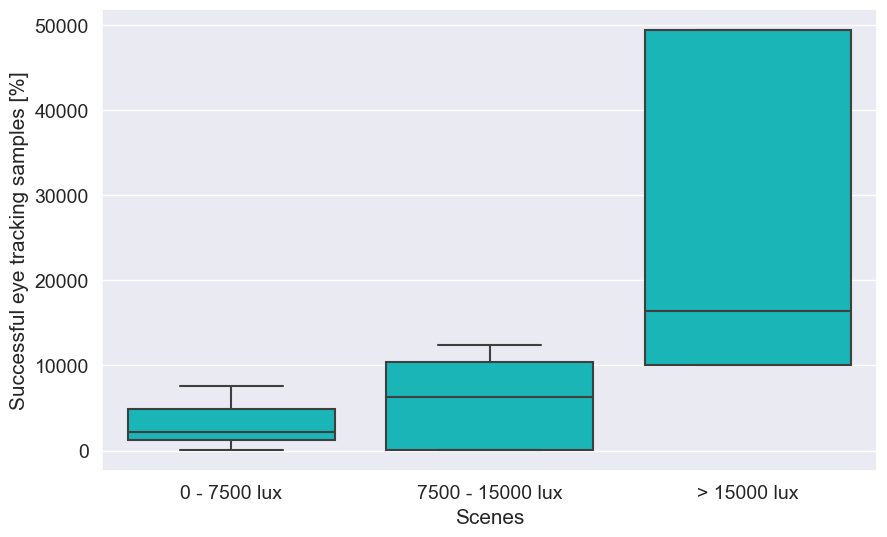

In [56]:
#Plot für ET quality in three differently intense light regimes!
import pandas as pd

dataset_ETQ = [ETQ_1, ETQ_2, ETQ_3]
df_ETQ = pd.DataFrame(dataset_ETQ).T
print(ETQ_1)
print(ETQ_2)
print(ETQ_3)

column_names = ["0 - 7500 lux", "7500 - 15000 lux", "> 15000 lux"]
df_ETQ.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.boxplot(data=df_ETQ, color="darkturquoise")
plt.xlabel('Scenes',family='Arial', fontsize=15)
plt.ylabel('Successful eye tracking samples [%]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
#plt.yticks(range(1, 11), family='Arial')

In [57]:
#Statistical Tests#
import scipy.stats as stats
#ANOVA --> Gibt es SSU zwischen den Szenen im Hinblick auf die Metriken?

###ANOVA - Average Pupil Size
f_statistic, p_value = stats.f_oneway(*dataset_ETQ)
print("ETQ - F-statistic:", f_statistic)
print("ETQ - P-value:", p_value)

ETQ - F-statistic: 21.110317864015034
ETQ - P-value: 3.414667997278366e-07


In [58]:
#Tukeys HSD posthoc test for et quality between the light intensity regimes
import numpy as np
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
Q1 = np.array(ETQ_1).flatten()
Q2 = np.array(ETQ_2).flatten()
Q3 = np.array(ETQ_3).flatten()


# Combine all data into one array
all_data = np.concatenate([Q1, Q2, Q3])

# Create labels for each group
labels = ['Q1'] * len(Q1) + ['Q2'] * len(Q2) + \
         ['Q3'] * len(Q3) 

# Create a DataFrame for the data
data = pd.DataFrame({'data': all_data, 'Q': labels})

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(data['data'], data['Q'], alpha=0.025)

# Print the results
print(tukey_results)
print("mean p-value for CS5: ")

    Multiple Comparison of Means - Tukey HSD, FWER=0.03    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
    Q1     Q2  2055.2262 0.664 -4381.7422  8492.1946  False
    Q1     Q3 23896.3333   0.0  13507.754 34284.9127   True
    Q2     Q3 21841.1071   0.0 12074.0271 31608.1872   True
-----------------------------------------------------------
mean p-value for CS5: 


In [59]:
###ET-Quality Analysis 2####
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.linear_model import LinearRegression


Illu_0_10 = []
Illu_10_=[]

#Funktionen zum Finden der korrekten Zahlenwerte bzw. umwandeln
def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False
data_dict1= {}
csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Light/mcs15_ET1.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict1:
        data_dict1[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict1[participant]:
                data_dict1[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict1[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict1[participant][col_name].append(float(str(value).replace(',', '.')))

print(data_dict1)

count = 101
for participant in data_dict1:
    if len(Illu_0_10) < 18:
        if count not in (108, 110):
            if count not in (102, 120):
                S456_participant = data_dict1.get(count, {})
                S456_participant_data_list = list(S456_participant.values())
                #print(S5_participant_data_list)
                S456_float_list = [item[0] for item in S456_participant_data_list]
                #print(S456_float_list)
                if S456_float_list[7] < 10000:
                    print("1")
                    #print(count)
                    Illu_0_10.append(S456_float_list[7])
                    count = count + 1
                elif S456_float_list[10] < 10000:
                    print("2")
                    #print(count)
                    Illu_0_10.append(S456_float_list[10])
                    count = count + 1
                elif S456_float_list[13] < 10000:
                    print("3")
                   # print(count)
                    Illu_0_10.append(S456_float_list[13])
                    count = count + 1
                else:
                    count = count + 1
                    continue
            else:
                S456_participant = data_dict1.get(count, {})
                S456_participant_data_list = list(S456_participant.values())
                #print(S5_participant_data_list)
                S456_float_list = [item[0] for item in S456_participant_data_list]
                #print(S4_float_list)
                if S456_float_list[1] < 10000:
                    print(S456_float_list[7])
                    Illu_0_10.append(S456_float_list[1])
                    count = count + 1
                elif S456_float_list[4] < 10000:
                    Illu_0_10.append(S456_float_list[4])
                    count = count + 1
                elif S456_float_list[7] < 10000:
                    Illu_0_10.append(S456_float_list[7])
                    count = count + 1
                else:
                    count = count + 1
                    continue
        else: 
            count = count + 1
            continue

count = 101
for participant in data_dict1:
    if len(Illu_10_) < 18:
        if count not in (108, 110):
            if count not in (102, 120):
                S456_participant = data_dict1.get(count, {})
                S456_participant_data_list = list(S456_participant.values())
                #print(S5_participant_data_list)
                S456_float_list = [item[0] for item in S456_participant_data_list]
                #print(S456_float_list)
                if S456_float_list[7] > 10000:
                    print("1")
                    print(count)
                    Illu_10_.append(S456_float_list[7])
                    count = count + 1
                elif S456_float_list[10] > 10000:
                    print("2")
                    print(count)
                    Illu_10_.append(S456_float_list[10])
                    count = count + 1
                elif S456_float_list[13] > 10000:
                    print("3")
                    print(count)
                    Illu_10_.append(S456_float_list[13])
                    count = count + 1
                else:
                    count = count + 1
                    continue
            else:
                S456_participant = data_dict1.get(count, {})
                S456_participant_data_list = list(S456_participant.values())
                #print(S5_participant_data_list)
                S456_float_list = [item[0] for item in S456_participant_data_list]
                #print(S4_float_list)
                if S456_float_list[1] > 10000:
                    print("4")
                    print(count)
                    Illu_10_.append(S456_float_list[1])
                    count = count + 1
                elif S456_float_list[4] > 10000:
                    print("5")
                    print(count)
                    Illu_10_.append(S456_float_list[4])
                    count = count + 1
                elif S456_float_list[7] > 10000:
                    print("6")
                    print(count)
                    Illu_10_.append(S456_float_list[7])
                    count = count + 1
                else:
                    count = count + 1
                    continue
        else: 
            count = count + 1
            continue
print("Illu kleiner 10000")
print(Illu_10_)
print("Illu größer 10000")
print(Illu_0_10)

ETQ_1=[]
ETQ_2=[]

p1_list_S4 = [103,104,105,107,111,112,113,115,116,117,118]
p1_list_S5 = [105,106,109,111,112,115,116]
p1_list_S6 = [101,102,103,105,112,114,115,118]

p2_list_S4 = [101,102,106,109,114]
p2_list_S5 = [101,102,103,104,107,113,114,117,118]
p2_list_S6 = [104,106,107,109,111,113,116,117]

###Alles unter 7500
for i in p1_list_S4:
    if len(ETQ_1) < 1000:
        if i not in (108, 110):
            if i not in (102, 120):
                S4_participant = data_dict1.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                ETQ_1.append(S4_float_list[8])
                count = count +1
            else:
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                #print(S5_float_list)
                ETQ_1.append(S4_float_list[2])
                count = count +1
        else:
            count = count +1
for i in p1_list_S5:
    if len(ETQ_1) < 1000:
        if i not in (108, 110):
            if i not in (102, 120):
                S4_participant = data_dict1.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                ETQ_1.append(S4_float_list[11])
                count = count +1
            else:
                S4_participant = data_dict.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                #print(S5_float_list)
                ETQ_1.append(S4_float_list[5])
                count = count +1
        else:
            count = count +1
for i in p1_list_S6:
    if len(ETQ_1) < 1000:
        if i not in (108, 110):
            if i not in (102, 120):
                S4_participant = data_dict1.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                ETQ_1.append(S4_float_list[14])
                count = count +1
            else:
                S4_participant = data_dict1.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                #print(S5_float_list)
                ETQ_1.append(S4_float_list[8])
                count = count +1
        else:
            count = count +1
print("ETQ_kleiner_10000")
print(ETQ_1)

#####Alles zwischen 7500 und 15000
count = 101
for i in p2_list_S4:
    if len(ETQ_2) < 1000:
        if i not in (108, 110):
            if i not in (102, 120):
                S4_participant = data_dict1.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                ETQ_2.append(S4_float_list[8])
                count = count +1
            else:
                S4_participant = data_dict1.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                #print(S5_float_list)
                ETQ_2.append(S4_float_list[2])
                count = count +1
        else:
            count = count +1
for i in p2_list_S5:
    if len(ETQ_2) < 1000:
        if i not in (108, 110):
            if i not in (102, 120):
                S4_participant = data_dict1.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                ETQ_2.append(S4_float_list[11])
                count = count +1
            else:
                S4_participant = data_dict1.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                #print(S5_float_list)
                ETQ_2.append(S4_float_list[5])
                count = count +1
        else:
            count = count +1
for i in p2_list_S6:
    if len(ETQ_2) < 1000:
        if i not in (108, 110):
            if i not in (102, 120):
                S4_participant = data_dict1.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                ETQ_2.append(S4_float_list[14])
                count = count +1
            else:
                S4_participant = data_dict1.get(i, {})
                S4_participant_data_list = list(S4_participant.values())
                #print(S5_participant_data_list)
                S4_float_list = [item[0] for item in S4_participant_data_list]
                #print(S5_float_list)
                ETQ_2.append(S4_float_list[8])
                count = count +1
        else:
            count = count +1
print("ETQ_größer_10000")
print(ETQ_2)



{101.0: {'Participant': [101.0], 'Photopic S1': [150.7], 'Melanopic S1 (W/m_)': [78.43], 'Photopic S2': [1069.0], 'Melanopic S2': [837.8], 'Photopic S3': [717.9], 'Melanopic S3': [589.7], 'Photopic S4': [18080.0], 'ET_DataQS4': [69.0], 'Melanopic S4': [16350.0], 'Photopic S5': [11810.0], 'ET_DataQS5': [80.0], 'Melanopic S5': [11620.0], 'Photopic S6': [9506.0], 'ET_DataQS6': [74.0], 'Melanopic S6': [9137.0]}, 102.0: {'Participant': [102.0], 'Photopic S4': [13010.0], 'ET_DataQS4': [79.0], 'Melanopic S4': [11850.0], 'Photopic S5': [11250.0], 'ET_DataQS5': [34.0], 'Melanopic S5': [11380.0], 'Photopic S6': [8261.0], 'ET_DataQS6': [42.0], 'Melanopic S6': [8148.0]}, 103.0: {'Participant': [103.0], 'Photopic S1': [141.6], 'Melanopic S1 (W/m_)': [73.64], 'Photopic S2': [485.1], 'Melanopic S2': [323.7], 'Photopic S3': [508.0], 'Melanopic S3': [389.1], 'Photopic S4': [4964.0], 'ET_DataQS4': [98.0], 'Melanopic S4': [4524.0], 'Photopic S5': [13520.0], 'ET_DataQS5': [91.0], 'Melanopic S5': [12930.0]

mean group1 90.53846153846153
mean group2 77.86363636363636
mean difference 12.674825174825173
pooled sd 18.591169273254234
Cohen's d: 0.6817658958686114
[98.0, 99.0, 98.0, 90.0, 97.0, 93.0, 93.0, 100.0, 100.0, 98.0, 82.0, 98.0, 33.0, 96.0, 97.0, 89.0, 99.0, 99.0, 74.0, 42.0, 99.0, 97.0, 93.0, 93.0, 99.0, 98.0]
[69.0, 79.0, 64.0, 92.0, 95.0, 80.0, 34.0, 91.0, 90.0, 74.0, 62.0, 71.0, 97.0, 73.0, 69.0, 64.0, 94.0, 96.0, 98.0, 23.0, 100.0, 98.0]


(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

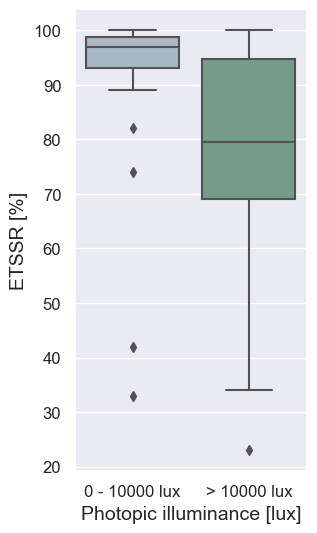

In [101]:
#Basis for Publication-ready ETSSR plotting
import pandas as pd

dataset_ETQ = [ETQ_1, ETQ_2]

df_ETQ = pd.DataFrame(dataset_ETQ).T
#print(df_ETQ)

column_names = ["0 - 10000 lux", "> 10000 lux"]
my_pal_IO1 = {"0 - 10000 lux": "#a3b8c8", "> 10000 lux": "#6fa287"}

# Calculate Cohen's d
def cohen_d(group1, group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    n1, n2 = len(group1), len(group2)
    #Using pooled SD as the group sizes are different between Indoor and Outdoor
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    pooled_sd = np.sqrt(pooled_var)
    print("mean group1 " + str(np.mean(group1)))
    print("mean group2 " + str(np.mean(group2)))
    print("mean difference " + str(mean_diff))
    print("pooled sd " + str(pooled_sd))
    d = mean_diff / pooled_sd
    return d

cohen_d_value = cohen_d(ETQ_1, ETQ_2)
print("Cohen's d:", cohen_d_value)

df_ETQ.columns = column_names
####
print(ETQ_1)
print(ETQ_2)
plt.figure(figsize=(3, 6))
sea.boxplot(data=df_ETQ, palette=my_pal_IO1)
plt.xlabel('Photopic illuminance [lux]',family='Arial', fontsize=14)
plt.ylabel('ETSSR [%]', family='Arial', fontsize=14)
plt.xticks(fontsize=12, family='Arial')
#plt.xscale('log')
plt.yticks(fontsize=12, family='Arial')
#plt.yticks(range(0, 100), family='Arial')

(0.0, 1.0, 0.0, 1.0)

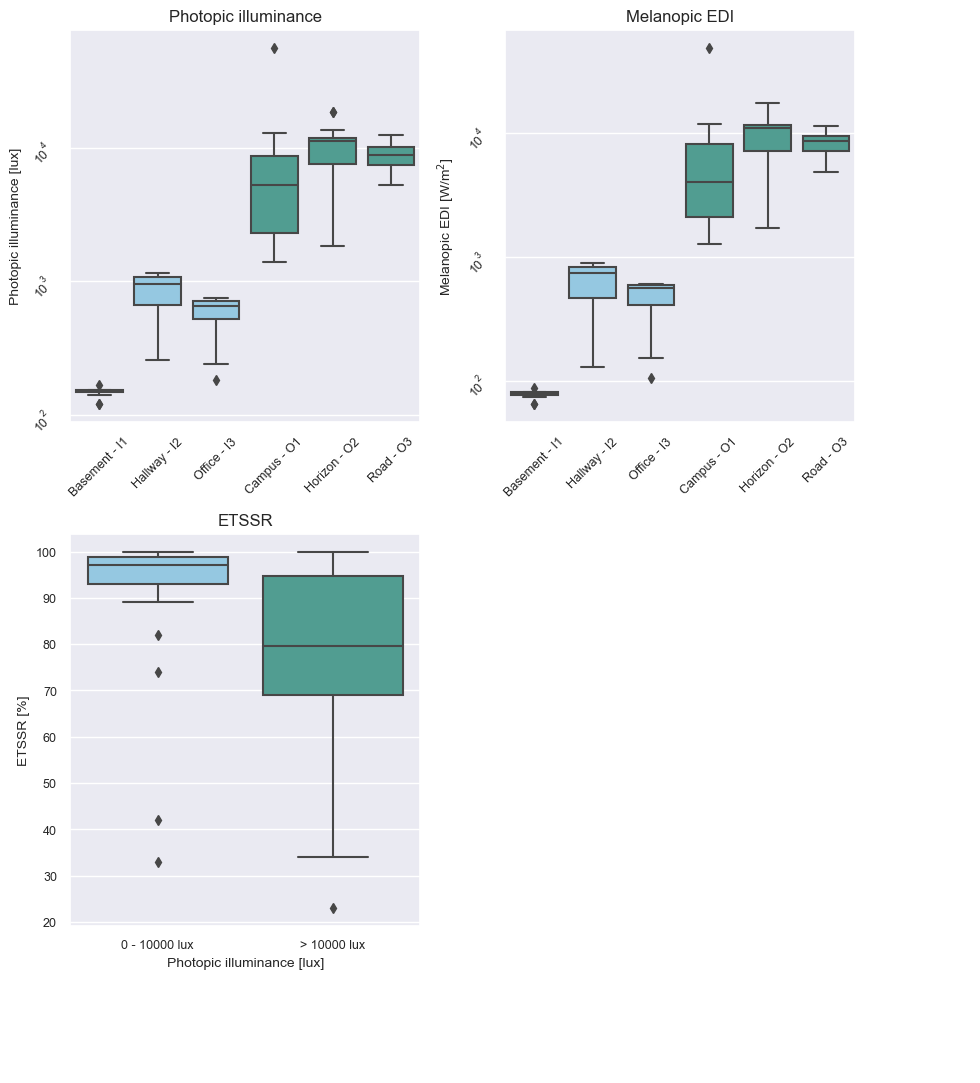

In [61]:
#Combination of Photopic illuminance, melanopic irradiance and ETSSR --> Publication ready
my_pal_all1 = {"Basement - I1": "#88CCEE", "Hallway - I2": "#88CCEE", "Office - I3": "#88CCEE", "Campus - O1": "#44AA99", "Horizon - O2": "#44AA99", "Road - O3": "#44AA99"}
my_pal_IO1 = {"0 - 10000 lux": "#88CCEE", "> 10000 lux": "#44AA99"}

fig, axes = plt.subplots(2, 2, figsize=(10,12))  # You can adjust the figsize as needed
#Create boxplot in each subplot
sea.boxplot(data=df_illu, ax=axes[0,0], palette=my_pal_all1)
axes[0,0].set_ylabel('Photopic illuminance [lux]', family="Arial", fontsize=10)  # Add y-label as needed
axes[0,0].set_yscale('log')
axes[0,0].set_title("Photopic illuminance",fontsize=12)
axes[0,0].tick_params(labelsize=9,labelrotation=45)
axes[0,0].set_position([0, 0.6525, 0.35, 0.3269])


sea.boxplot(data=df_mel, ax=axes[0,1], palette=my_pal_all1)
axes[0,1].set_ylabel('Melanopic EDI [W/m$^2$]', family="Arial", fontsize=10)
axes[0,1].set_title('Melanopic EDI',fontsize=12)
axes[0,1].set_yscale('log')
axes[0,1].tick_params(labelsize=9,labelrotation=45)
axes[0,1].set_position([0.435, 0.6525, 0.35, 0.3269])


sea.boxplot(data=df_ETQ, ax=axes[1,0], palette=my_pal_IO1)
axes[1,0].set_ylabel('ETSSR [%]', family="Arial", fontsize=10)
axes[1,0].set_xlabel('Photopic illuminance [lux]', family="Arial", fontsize=10)
axes[1,0].set_title('ETSSR',fontsize=12)
axes[1,0].tick_params(labelsize=9)
axes[1,0].set_position([0, 0.6525-0.42, 0.35, 0.3269])

#Create boxplot in each subplot
axes[1, 1].axis('off')

In [261]:
#Statisical test for ETSSR above and below 10000 lux
import scipy.stats as stats
t_statistic, p_value = stats.ttest_ind(ETQ_1, ETQ_2)
print("Average Frequency of Saccades T-Statistic:", t_statistic)
print("Average Frequency of Saccades P-Value:", p_value)
mean_ETQ_1 = sum(ETQ_1)/len(ETQ_1)
mean_ETQ_2 = sum(ETQ_2)/len(ETQ_2)
print("mean ETQ1 is: " + str(mean_ETQ_1))
print("mean ETQ1 is: " + str(mean_ETQ_2))

Average Frequency of Saccades T-Statistic: 2.3534916853837053
Average Frequency of Saccades P-Value: 0.022927170219215937
mean ETQ1 is: 90.53846153846153
mean ETQ1 is: 77.86363636363636


['$m^1$', '$m^2$', '$m^3$']
CC für Peak Velo & Pupil: 0.08578013746553072
P-value für Peak Velo & Pupil: 0.4214607016430687
CC für Duration & Pupil: 0.1612927125280641
P-value für Duration & Pupil: 0.12883033573001082
CC für freq_sacc_all & avr_peak_velo_all: 0.3727126805778491
P-value für freq_sacc_all & avr_peak_velo_all: 0.0002972253552641093
CC für Amplitude & avr_peak_velo_all: 0.3325403361394271
P-value für Amplitude & avr_peak_velo_all: 0.0013633000444580614
CC für Fix_Freq & avr_peak_velo_all: 0.3243281063505782
P-value für Fix_Freq & avr_peak_velo_all: 0.0018171531293411083
CC für Sleep & avr_peak_velo_all: 0.2945411926253732
P-value für Sleep & avr_peak_velo_all: 0.004832321176151412
CC für Amplitude & Saccade Frequency: 0.24915212401742798
P-value für Amplitude & Saccade Frequency: 0.017879762619714943
CC für Amplitude & Saccade Frequency: 0.5558628637280323
P-value für Amplitude & Saccade Frequency: 1.2905723985606524e-08
CC für Sleep & Saccade Frequency: 0.1519379157204457

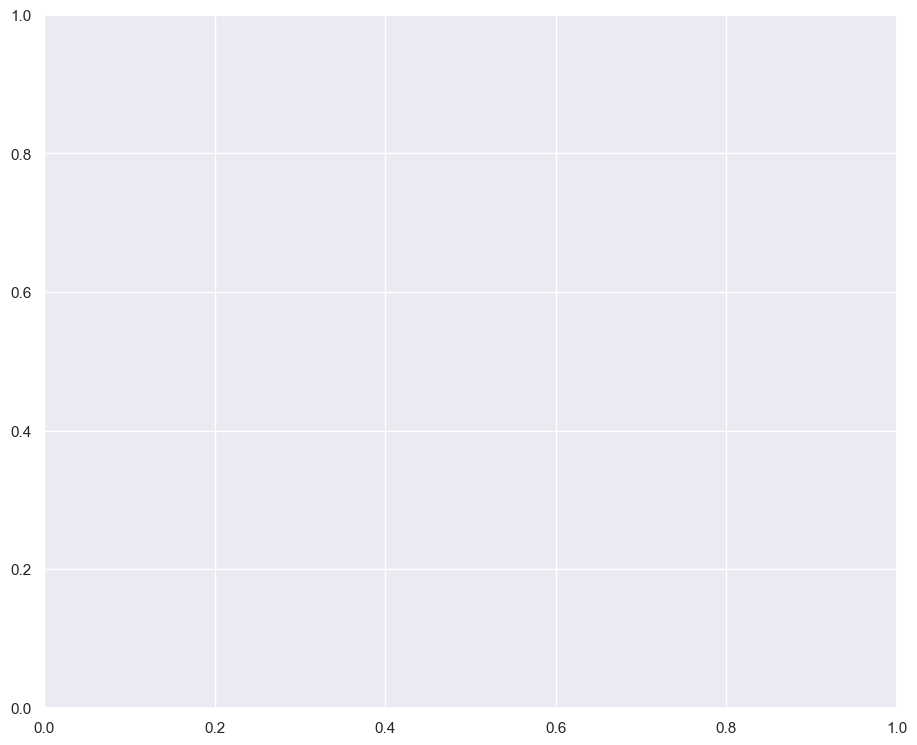

In [393]:
#Creating the correlation values and also the p-values for all indoor measurements and questionnaires
######Corr_in######
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
pupil_list_in = avr_pupil_S1+avr_pupil_S2+avr_pupil_S3
pupil_list_out = avr_pupil_S4+avr_pupil_S5+avr_pupil_S6
pupil_list_all = avr_pupil_S1+avr_pupil_S2+avr_pupil_S3+avr_pupil_S4+avr_pupil_S5+avr_pupil_S6
freq_sacc_in = freq_sacc_S1+freq_sacc_S2+freq_sacc_S3
freq_sacc_out = freq_sacc_S4+freq_sacc_S5+freq_sacc_S6
freq_sacc_all = freq_sacc_S1+freq_sacc_S2+freq_sacc_S3+freq_sacc_S4+freq_sacc_S5+freq_sacc_S6
avr_peak_velo_in = avr_peak_velo_S1+avr_peak_velo_S2+avr_peak_velo_S3
avr_peak_velo_out = avr_peak_velo_S4+avr_peak_velo_S5+avr_peak_velo_S6
avr_peak_velo_all = avr_peak_velo_S1+avr_peak_velo_S2+avr_peak_velo_S3+avr_peak_velo_S4+avr_peak_velo_S5+avr_peak_velo_S6
avr_amp_in = avr_amp_S1+avr_amp_S2+avr_amp_S3
avr_amp_out = avr_amp_S4+avr_amp_S5+avr_amp_S6
avr_amp_all = avr_amp_S1+avr_amp_S2+avr_amp_S3+avr_amp_S4+avr_amp_S5+avr_amp_S6
freq_fix_in = freq_fix_S1+ freq_fix_S2+ freq_fix_S3
freq_fix_out = freq_fix_S4+ freq_fix_S5+ freq_fix_S6
freq_fix_all = freq_fix_S1+ freq_fix_S2+ freq_fix_S3+ freq_fix_S4+ freq_fix_S5+ freq_fix_S6
avr_dur_in = avg_fix_dur_S1+ avg_fix_dur_S2+ avg_fix_dur_S3
avr_dur_out = avr_fix_dur_S4+ avr_fix_dur_S5+ avr_dur_fix_S6
avr_dur_all = avg_fix_dur_S1+ avg_fix_dur_S2+ avg_fix_dur_S3+ avr_fix_dur_S4+ avr_fix_dur_S5+ avr_dur_fix_S6
Melano123 = melanopic_S1+ melanopic_S2+ melanopic_S3+ melanopic_S4+ melanopic_S5+ melanopic_S6
Melano123_in = melanopic_S1+ melanopic_S2+ melanopic_S3
Melano123_out = melanopic_S4+ melanopic_S5+ melanopic_S6
Photopic123 = photopic_S1+ photopic_S2+ photopic_S3+ photopic_S4+ photopic_S5+ photopic_S6
Photopic123_in = photopic_S1+ photopic_S2+ photopic_S3
Photopic123_out = photopic_S4+ photopic_S5+ photopic_S6
BeautyQ = S1_Q1+S2_Q1+S3_Q1+S4_Q1+S5_Q1+S6_Q1
BeautyQ_in = S1_Q1+S2_Q1+S3_Q1
BeautyQ_out = S4_Q1+S5_Q1+S6_Q1
BrightnessQ = S1_Q2+S2_Q2+S3_Q2+S4_Q2+S5_Q2+S6_Q2
BrightnessQ_in = S1_Q2+S2_Q2+S3_Q2
BrightnessQ_out = S4_Q2+S5_Q2+S6_Q2
ComplexityQ = S1_Q4+S2_Q4+S3_Q4+S4_Q4+S5_Q4+S6_Q4
ComplexityQ_in = S1_Q4+S2_Q4+S3_Q4
ComplexityQ_out = S4_Q4+S5_Q4+S6_Q4
SleepinessQ = S1_Q5+S2_Q5+S3_Q5+S4_Q5+S5_Q5+S6_Q5
SleepinessQ_in = S1_Q5+S2_Q5+S3_Q5
SleepinessQ_out = S4_Q5+S5_Q5+S6_Q5


csv1_file_path_in = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/AOI Data/correlation_in.csv"

# CSV-Datei in einen DataFrame laden
df_in = pd.read_csv(csv1_file_path_in)
#p_values1 = pd.read_csv(csv2_file_path)
#p_values = pd.DataFrame(data=p_values1)
# DataFrame anzeigen
#print(df2)
#dataframe_corr = pd.DataFrame(df2).T

# Annotate the heatmap with p-values

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)), columns=list(ascii_letters[26:])
exponent = []
x = [1,2,3]
exponent.append([f"$m^{i}$" for i in x])
print(exponent[0])
x = [2]        
# Rename columns if needed
new_column_names = {
    'Pupil Size [mm]': 'Pupil Size [mm]',
    'Average Peak Velocity of Saccades [°/s]': 'Average Peak Velocity of Saccades [°/s]',
    'Average Frequency of Saccades [n/s]': 'Average Frequency of Saccades [n/s]',
    'Average Amplitude of Saccades [°]': 'Average Amplitude of Saccades [°]',
    'Average Frequency of Fixations [n/s]': 'Average Frequency of Fixations [n/s]',
    'Average Duration of Fixations [n/s]': 'Average Duration of Fixations [n/s]',
    'Photopic illuminance [lux]': 'Photopic illuminance [lux]',
    'Melanopic irradiance [W/m2]': "Melanopic irradiance [W/$m^2$]",
    'Beauty rating': 'Beauty rating',
    'Complexity rating': 'Complexity rating',
    'Brightness rating': 'Brightness rating',
    'Sleepiness rating': 'Sleepiness rating',
    # ... and so on
}
df_in.rename(columns=new_column_names, inplace=True)
# Compute the correlation matrix
corr_in = df_in.corr(method='spearman')
#print(corr)
# Generate a mask for the upper triangle
mask_in = np.triu(np.ones_like(corr_in, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
#print(correlation_coefficient)
########## VERWENDEN ZUR P-WERT BERECHNUNG #########
correlation_coefficient, p_value = stats.spearmanr(avr_peak_velo_all, pupil_list_all)
print("CC für Peak Velo & Pupil: " + str(correlation_coefficient))
print("P-value für Peak Velo & Pupil: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(avr_dur_all, pupil_list_all)
print("CC für Duration & Pupil: " + str(correlation_coefficient))
print("P-value für Duration & Pupil: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(freq_sacc_all, avr_peak_velo_all)
print("CC für freq_sacc_all & avr_peak_velo_all: " + str(correlation_coefficient))
print("P-value für freq_sacc_all & avr_peak_velo_all: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(avr_amp_all, avr_peak_velo_all)
print("CC für Amplitude & avr_peak_velo_all: " + str(correlation_coefficient))
print("P-value für Amplitude & avr_peak_velo_all: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(freq_fix_all, avr_peak_velo_all)
print("CC für Fix_Freq & avr_peak_velo_all: " + str(correlation_coefficient))
print("P-value für Fix_Freq & avr_peak_velo_all: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(SleepinessQ, avr_peak_velo_all)
print("CC für Sleep & avr_peak_velo_all: " + str(correlation_coefficient))
print("P-value für Sleep & avr_peak_velo_all: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(avr_amp_all, freq_sacc_all)
print("CC für Amplitude & Saccade Frequency: " + str(correlation_coefficient))
print("P-value für Amplitude & Saccade Frequency: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(freq_fix_all, freq_sacc_all)
print("CC für Amplitude & Saccade Frequency: " + str(correlation_coefficient))
print("P-value für Amplitude & Saccade Frequency: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(SleepinessQ, freq_sacc_all)
print("CC für Sleep & Saccade Frequency: " + str(correlation_coefficient))
print("P-value für Sleep & Saccade Frequency: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(avr_dur_all, avr_amp_all)
print("CC für Duration & Amplitude: " + str(correlation_coefficient))
print("P-value für Duration & Amplitude: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(SleepinessQ, freq_fix_all)
print("CC für Duration & Amplitude: " + str(correlation_coefficient))
print("P-value für Duration & Amplitude: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(BrightnessQ, Photopic123)
print("CC für Brightness & Photopic: " + str(correlation_coefficient))
print("P-value für Brightness & Photopic: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(BeautyQ, Photopic123)
print("CC für Beauty & Photopic: " + str(correlation_coefficient))
print("P-value für Beauty & Photopic: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(Melano123, Photopic123)
print("CC für Melano & Photopic: " + str(correlation_coefficient))
print("P-value für Melano & Photopic: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(BrightnessQ, Melano123)
print("CC für Brightness & Melano: " + str(correlation_coefficient))
print("P-value für Brightness & Melano: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(BeautyQ, Melano123)
print("CC für BeautyQ & Melano: " + str(correlation_coefficient))
print("P-value für BeautyQ & Melano: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(BrightnessQ, BeautyQ)
print("CC für Brightness & BeautyQ: " + str(correlation_coefficient))
print("P-value für Brightness & BeautyQ: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(BeautyQ, ComplexityQ)
print("CC für BeautyQ & ComplexityQ: " + str(correlation_coefficient))
print("P-value für BeautyQ & ComplexityQ: " + str(p_value))
########## VERWENDEN ZUR P-WERT BERECHNUNG #########

data_list_list2 = [
    pupil_list_in,
    pupil_list_out,
    pupil_list_all,
    avr_peak_velo_in,
    avr_peak_velo_out,
    avr_peak_velo_all,
    freq_sacc_in,
    freq_sacc_out,
    freq_sacc_all,
    avr_amp_in,
    avr_amp_out,
    avr_amp_all,
    freq_fix_in,
    freq_fix_out,
    freq_fix_all,
    avr_dur_in,
    avr_dur_out,
    avr_dur_all,
    Photopic123_in,
    Photopic123_out,
    Photopic123,
    Melano123_in,
    Melano123_out,
    Melano123,
    BeautyQ_in,
    BeautyQ_out,
    BeautyQ,
    ComplexityQ_in,
    ComplexityQ_out,
    ComplexityQ,
    BrightnessQ_in,
    BrightnessQ_out,
    BrightnessQ,
    SleepinessQ_in,
    SleepinessQ_out,
    SleepinessQ
]
p_values = []
control1 = []     
control2 = []        
control3 = []        
control4 = []        
control5 = []        
control6 = []        
control7 = []        
control8 = []        
control9 = []        
control10 = []        
control11 = []        

#p_values für APVS
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 1 and count_out < 2 and count_all < 3:
        correlation_coefficient, p_value = stats.spearmanr(avr_peak_velo_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(avr_peak_velo_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(avr_peak_velo_all, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break
        
#p_values für AFS
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 4 and count_out < 5 and count_all < 6:
        correlation_coefficient, p_value = stats.spearmanr(freq_sacc_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(freq_sacc_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(freq_sacc_all, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break

#p_values für AAS
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 7 and count_out < 8 and count_all < 9:
        correlation_coefficient, p_value = stats.spearmanr(avr_amp_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(avr_amp_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(avr_amp_all, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break
        
#p_values für AFF
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 10 and count_out < 11 and count_all < 12:
        correlation_coefficient, p_value = stats.spearmanr(freq_fix_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(freq_fix_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(freq_fix_all, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break

#p_values für ADF
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 13 and count_out < 14 and count_all < 15:
        correlation_coefficient, p_value = stats.spearmanr(avr_dur_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(avr_dur_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(avr_dur_all, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break

#p_values für PI
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 16 and count_out < 17 and count_all < 18:
        correlation_coefficient, p_value = stats.spearmanr(Photopic123_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(Photopic123_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(Photopic123, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break
        
#p_values für MI
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 19 and count_out < 20 and count_all < 21:
        correlation_coefficient, p_value = stats.spearmanr(Melano123_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(Melano123_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(Melano123, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break

#p_values für beauty
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 22 and count_out < 23 and count_all < 24:
        correlation_coefficient, p_value = stats.spearmanr(BeautyQ_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(BeautyQ_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(BeautyQ, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break

#p_values für complexity
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 25 and count_out < 26 and count_all < 27:
        correlation_coefficient, p_value = stats.spearmanr(ComplexityQ_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(ComplexityQ_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(ComplexityQ, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break


#p_values für brightness
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 28 and count_out < 29 and count_all < 30:
        correlation_coefficient, p_value = stats.spearmanr(BrightnessQ_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(BrightnessQ_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(BrightnessQ, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break

#p_values für SleepinessQ
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 31 and count_out < 32 and count_all < 33:
        correlation_coefficient, p_value = stats.spearmanr(SleepinessQ_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(SleepinessQ_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(SleepinessQ, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break

        

# Generate a custom diverging colormap
cmap_in = sns.diverging_palette(230, 10, as_cmap=True)




    Pupil Size [mm]  Average Peak Velocity of Saccades [°/s]  \
0           3.71009                                   211.80   
1           3.40685                                   235.30   
2           4.04744                                   242.41   
3           3.57457                                   249.99   
4           3.34055                                   256.39   
..              ...                                      ...   
85          1.69013                                   217.38   
86          2.00816                                   232.56   
87          2.17180                                   208.11   
88          1.80788                                   234.64   
89          1.62716                                   210.79   

    Average Frequency of Saccades [n/s]  Average Amplitude of Saccades [°]  \
0                              1.115014                               4.65   
1                              1.179760                               6.81 

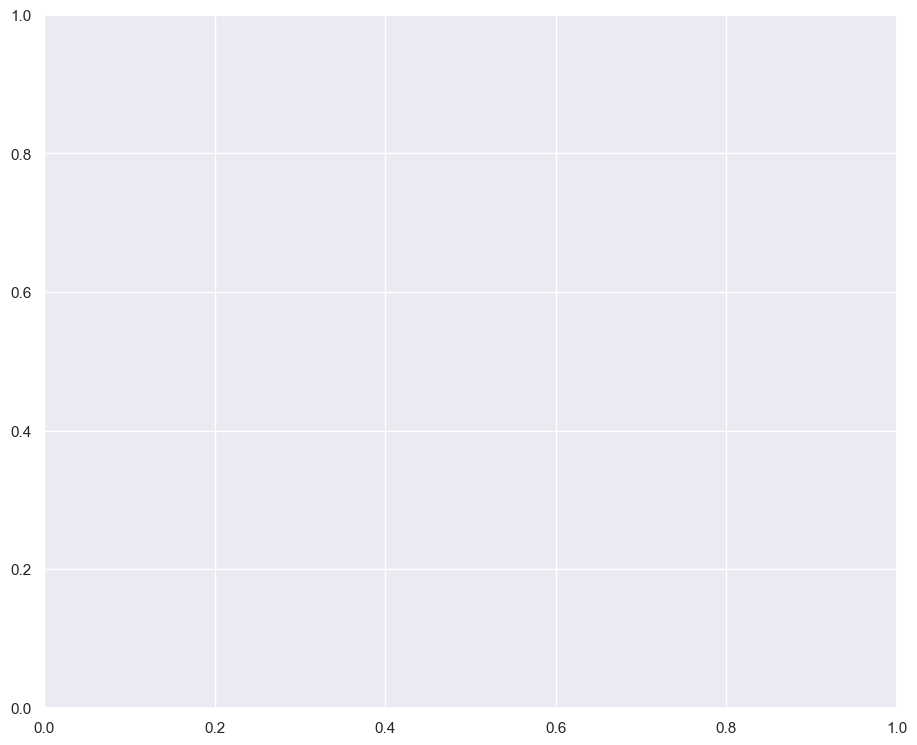

In [394]:
#Creating the correlation values and also the p-values for all measurements and questionnaires
#######Corr_all######
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
pupil_list_in = avr_pupil_S1+avr_pupil_S2+avr_pupil_S3
pupil_list_out = avr_pupil_S4+avr_pupil_S5+avr_pupil_S6
pupil_list_all = avr_pupil_S1+avr_pupil_S2+avr_pupil_S3+avr_pupil_S4+avr_pupil_S5+avr_pupil_S6
freq_sacc_in = freq_sacc_S1+freq_sacc_S2+freq_sacc_S3
freq_sacc_out = freq_sacc_S4+freq_sacc_S5+freq_sacc_S6
freq_sacc_all = freq_sacc_S1+freq_sacc_S2+freq_sacc_S3+freq_sacc_S4+freq_sacc_S5+freq_sacc_S6
avr_peak_velo_in = avr_peak_velo_S1+avr_peak_velo_S2+avr_peak_velo_S3
avr_peak_velo_out = avr_peak_velo_S4+avr_peak_velo_S5+avr_peak_velo_S6
avr_peak_velo_all = avr_peak_velo_S1+avr_peak_velo_S2+avr_peak_velo_S3+avr_peak_velo_S4+avr_peak_velo_S5+avr_peak_velo_S6
avr_amp_in = avr_amp_S1+avr_amp_S2+avr_amp_S3
avr_amp_out = avr_amp_S4+avr_amp_S5+avr_amp_S6
avr_amp_all = avr_amp_S1+avr_amp_S2+avr_amp_S3+avr_amp_S4+avr_amp_S5+avr_amp_S6
freq_fix_in = freq_fix_S1+ freq_fix_S2+ freq_fix_S3
freq_fix_out = freq_fix_S4+ freq_fix_S5+ freq_fix_S6
freq_fix_all = freq_fix_S1+ freq_fix_S2+ freq_fix_S3+ freq_fix_S4+ freq_fix_S5+ freq_fix_S6
avr_dur_in = avg_fix_dur_S1+ avg_fix_dur_S2+ avg_fix_dur_S3
avr_dur_out = avr_fix_dur_S4+ avr_fix_dur_S5+ avr_dur_fix_S6
avr_dur_all = avg_fix_dur_S1+ avg_fix_dur_S2+ avg_fix_dur_S3+ avr_fix_dur_S4+ avr_fix_dur_S5+ avr_dur_fix_S6
Melano123 = melanopic_S1+ melanopic_S2+ melanopic_S3+ melanopic_S4+ melanopic_S5+ melanopic_S6
Melano123_in = melanopic_S1+ melanopic_S2+ melanopic_S3
Melano123_out = melanopic_S4+ melanopic_S5+ melanopic_S6
Photopic123 = photopic_S1+ photopic_S2+ photopic_S3+ photopic_S4+ photopic_S5+ photopic_S6
Photopic123_in = photopic_S1+ photopic_S2+ photopic_S3
Photopic123_out = photopic_S4+ photopic_S5+ photopic_S6
BeautyQ = S1_Q1+S2_Q1+S3_Q1+S4_Q1+S5_Q1+S6_Q1
BeautyQ_in = S1_Q1+S2_Q1+S3_Q1
BeautyQ_out = S4_Q1+S5_Q1+S6_Q1
BrightnessQ = S1_Q2+S2_Q2+S3_Q2+S4_Q2+S5_Q2+S6_Q2
BrightnessQ_in = S1_Q2+S2_Q2+S3_Q2
BrightnessQ_out = S4_Q2+S5_Q2+S6_Q2
ComplexityQ = S1_Q4+S2_Q4+S3_Q4+S4_Q4+S5_Q4+S6_Q4
ComplexityQ_in = S1_Q4+S2_Q4+S3_Q4
ComplexityQ_out = S4_Q4+S5_Q4+S6_Q4
SleepinessQ = S1_Q5+S2_Q5+S3_Q5+S4_Q5+S5_Q5+S6_Q5
SleepinessQ_in = S1_Q5+S2_Q5+S3_Q5
SleepinessQ_out = S4_Q5+S5_Q5+S6_Q5

csv1_file_path_all = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/AOI Data/correlation_all.csv"

df_all = pd.read_csv(csv1_file_path_all)

dataframe_corr = pd.DataFrame(df_all).T

new_column_names = {
    'Pupil Size [mm]': 'Pupil Size [mm]',
    'Average Peak Velocity of Saccades [°/s]': 'Average Peak Velocity of Saccades [°/s]',
    'Average Frequency of Saccades [s$^-$$^1$]': 'Average Frequency of Saccades [s$^-$$^1$]',
    'Average Amplitude of Saccades [°]': 'Average Amplitude of Saccades [°]',
    'Average Frequency of Fixations [s$^-$$^1$]': 'Average Frequency of Fixations [s$^-$$^1$]',
    'Average Duration of Fixations [s$^-$$^1$]': 'Average Duration of Fixations [s$^-$$^1$]',
    'Photopic illuminance [lux]': 'Photopic illuminance [lux]',
    'Melanopic irradiance [W/m2]': "Melanopic irradiance [W/$m^2$]",
    'Beauty rating': 'Beauty rating',
    'Complexity rating': 'Complexity rating',
    'Brightness rating': 'Brightness rating',
    'Sleepiness rating': 'Sleepiness rating',
    # ... and so on
}
df_all.rename(columns=new_column_names, inplace=True)
# Compute the correlation matrix
corr_all = df_all.corr(method='spearman')
#print(corr)
# Generate a mask for the upper triangle
mask_all = np.triu(np.ones_like(corr_all, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

########## VERWENDEN ZUR P-WERT BERECHNUNG #########
correlation_coefficient, p_value = stats.spearmanr(avr_peak_velo_all, pupil_list_all)
print("CC für Peak Velo & Pupil: " + str(correlation_coefficient))
print("P-value für Peak Velo & Pupil: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(avr_dur_all, pupil_list_all)
print("CC für Duration & Pupil: " + str(correlation_coefficient))
print("P-value für Duration & Pupil: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(freq_sacc_all, avr_peak_velo_all)
print("CC für freq_sacc_all & avr_peak_velo_all: " + str(correlation_coefficient))
print("P-value für freq_sacc_all & avr_peak_velo_all: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(avr_amp_all, avr_peak_velo_all)
print("CC für Amplitude & avr_peak_velo_all: " + str(correlation_coefficient))
print("P-value für Amplitude & avr_peak_velo_all: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(freq_fix_all, avr_peak_velo_all)
print("CC für Fix_Freq & avr_peak_velo_all: " + str(correlation_coefficient))
print("P-value für Fix_Freq & avr_peak_velo_all: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(SleepinessQ, avr_peak_velo_all)
print("CC für Sleep & avr_peak_velo_all: " + str(correlation_coefficient))
print("P-value für Sleep & avr_peak_velo_all: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(avr_amp_all, freq_sacc_all)
print("CC für Amplitude & Saccade Frequency: " + str(correlation_coefficient))
print("P-value für Amplitude & Saccade Frequency: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(freq_fix_all, freq_sacc_all)
print("CC für Amplitude & Saccade Frequency: " + str(correlation_coefficient))
print("P-value für Amplitude & Saccade Frequency: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(SleepinessQ, freq_sacc_all)
print("CC für Sleep & Saccade Frequency: " + str(correlation_coefficient))
print("P-value für Sleep & Saccade Frequency: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(avr_dur_all, avr_amp_all)
print("CC für Duration & Amplitude: " + str(correlation_coefficient))
print("P-value für Duration & Amplitude: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(SleepinessQ, freq_fix_all)
print("CC für Duration & Amplitude: " + str(correlation_coefficient))
print("P-value für Duration & Amplitude: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(BrightnessQ, Photopic123)
print("CC für Brightness & Photopic: " + str(correlation_coefficient))
print("P-value für Brightness & Photopic: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(BeautyQ, Photopic123)
print("CC für Beauty & Photopic: " + str(correlation_coefficient))
print("P-value für Beauty & Photopic: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(Melano123, Photopic123)
print("CC für Melano & Photopic: " + str(correlation_coefficient))
print("P-value für Melano & Photopic: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(BrightnessQ, Melano123)
print("CC für Brightness & Melano: " + str(correlation_coefficient))
print("P-value für Brightness & Melano: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(BeautyQ, Melano123)
print("CC für BeautyQ & Melano: " + str(correlation_coefficient))
print("P-value für BeautyQ & Melano: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(BrightnessQ, BeautyQ)
print("CC für Brightness & BeautyQ: " + str(correlation_coefficient))
print("P-value für Brightness & BeautyQ: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(BeautyQ, ComplexityQ)
print("CC für BeautyQ & ComplexityQ: " + str(correlation_coefficient))
print("P-value für BeautyQ & ComplexityQ: " + str(p_value))
########## VERWENDEN ZUR P-WERT BERECHNUNG #########

data_list_list2 = [
    pupil_list_in,
    pupil_list_out,
    pupil_list_all,
    avr_peak_velo_in,
    avr_peak_velo_out,
    avr_peak_velo_all,
    freq_sacc_in,
    freq_sacc_out,
    freq_sacc_all,
    avr_amp_in,
    avr_amp_out,
    avr_amp_all,
    freq_fix_in,
    freq_fix_out,
    freq_fix_all,
    avr_dur_in,
    avr_dur_out,
    avr_dur_all,
    Photopic123_in,
    Photopic123_out,
    Photopic123,
    Melano123_in,
    Melano123_out,
    Melano123,
    BeautyQ_in,
    BeautyQ_out,
    BeautyQ,
    ComplexityQ_in,
    ComplexityQ_out,
    ComplexityQ,
    BrightnessQ_in,
    BrightnessQ_out,
    BrightnessQ,
    SleepinessQ_in,
    SleepinessQ_out,
    SleepinessQ
]
p_values = []
control1 = []     
control2 = []        
control3 = []        
control4 = []        
control5 = []        
control6 = []        
control7 = []        
control8 = []        
control9 = []        
control10 = []        
control11 = []        

#p_values für APVS
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 1 and count_out < 2 and count_all < 3:
        correlation_coefficient, p_value = stats.spearmanr(avr_peak_velo_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(avr_peak_velo_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(avr_peak_velo_all, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break
        
#p_values für AFS
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 4 and count_out < 5 and count_all < 6:
        correlation_coefficient, p_value = stats.spearmanr(freq_sacc_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(freq_sacc_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(freq_sacc_all, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break

#p_values für AAS
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 7 and count_out < 8 and count_all < 9:
        correlation_coefficient, p_value = stats.spearmanr(avr_amp_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(avr_amp_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(avr_amp_all, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break
        
#p_values für AFF
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 10 and count_out < 11 and count_all < 12:
        correlation_coefficient, p_value = stats.spearmanr(freq_fix_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(freq_fix_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(freq_fix_all, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break

#p_values für ADF
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 13 and count_out < 14 and count_all < 15:
        correlation_coefficient, p_value = stats.spearmanr(avr_dur_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(avr_dur_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(avr_dur_all, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break

#p_values für PI
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 16 and count_out < 17 and count_all < 18:
        correlation_coefficient, p_value = stats.spearmanr(Photopic123_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(Photopic123_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(Photopic123, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break
        
#p_values für MI
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 19 and count_out < 20 and count_all < 21:
        correlation_coefficient, p_value = stats.spearmanr(Melano123_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(Melano123_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(Melano123, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break

#p_values für beauty
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 22 and count_out < 23 and count_all < 24:
        correlation_coefficient, p_value = stats.spearmanr(BeautyQ_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(BeautyQ_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(BeautyQ, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break

#p_values für complexity
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 25 and count_out < 26 and count_all < 27:
        correlation_coefficient, p_value = stats.spearmanr(ComplexityQ_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(ComplexityQ_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(ComplexityQ, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break


#p_values für brightness
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 28 and count_out < 29 and count_all < 30:
        correlation_coefficient, p_value = stats.spearmanr(BrightnessQ_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(BrightnessQ_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(BrightnessQ, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break

#p_values für SleepinessQ
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 31 and count_out < 32 and count_all < 33:
        correlation_coefficient, p_value = stats.spearmanr(SleepinessQ_in, data_list_list2[count_in])
        p_values.append(p_value)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(SleepinessQ_out, data_list_list2[count_out])
        p_values.append(p_value)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(SleepinessQ, data_list_list2[count_all])
        p_values.append(p_value)
        count_all = count_all + 3
    else: 
        break

        



    Pupil Size [mm]  Average Peak Velocity of Saccades [°/s]  \
0           2.00761                                   195.30   
1           2.11340                                   210.78   
2           2.07322                                   246.97   
3           2.78498                                   233.19   
4           2.13962                                   213.33   
5           2.11535                                   162.41   
6           2.74262                                   234.91   
7           2.94333                                   238.88   
8           2.27391                                   201.11   
9           1.93459                                   240.50   
10          2.23601                                   236.36   
11          2.48258                                   200.62   
12          2.22655                                   243.12   
13          1.70426                                   195.63   
14          1.93474                     

NameError: name 'cmap_all' is not defined

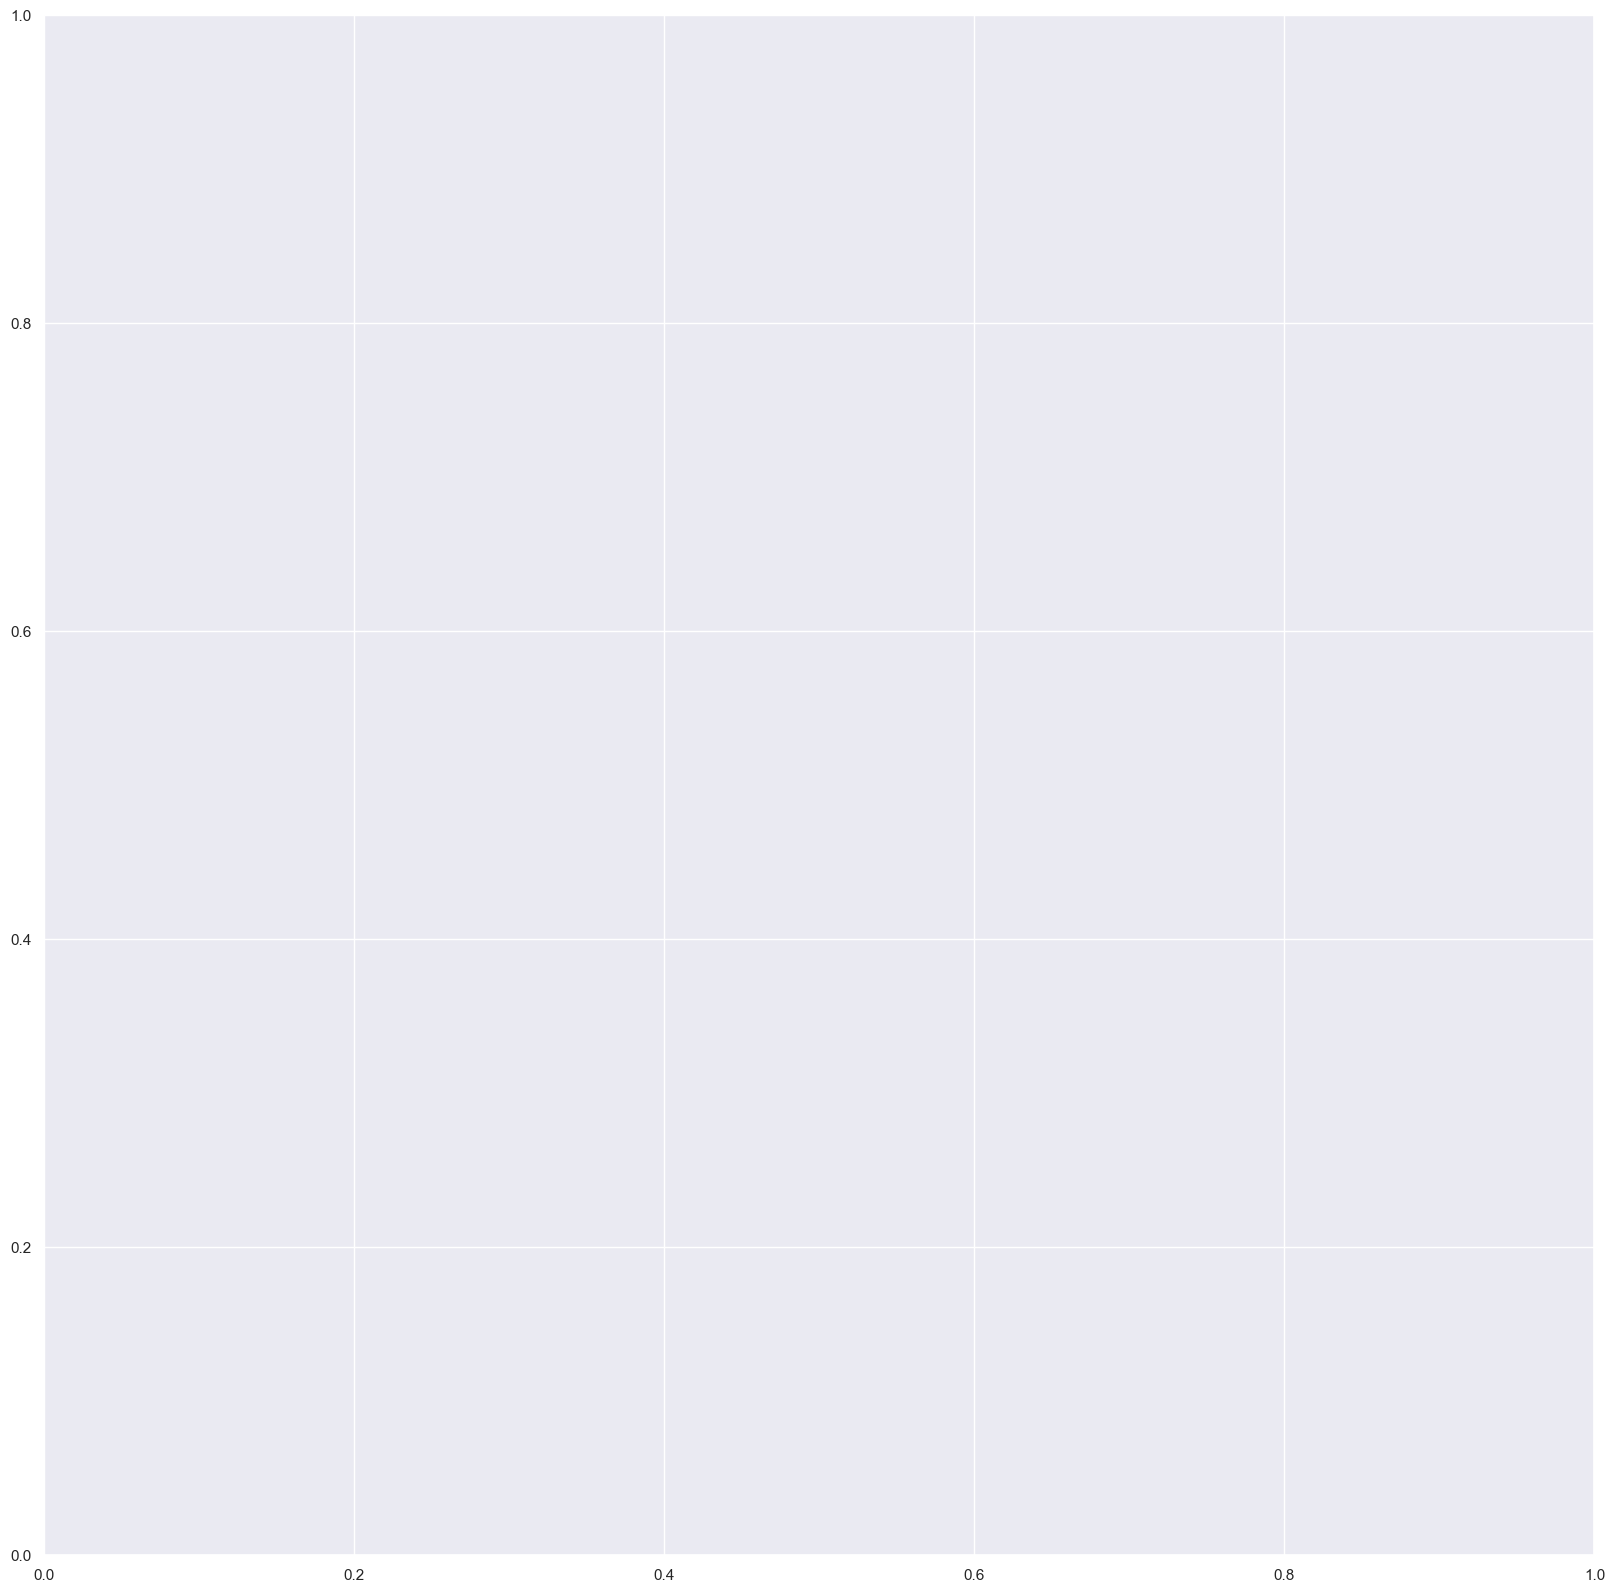

In [395]:
#Creating the correlation values and also the p-values for all indoor measurements and questionnaires
####Corr_out#####
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
pupil_list_in = avr_pupil_S1+avr_pupil_S2+avr_pupil_S3
pupil_list_out = avr_pupil_S4+avr_pupil_S5+avr_pupil_S6
pupil_list_all = avr_pupil_S1+avr_pupil_S2+avr_pupil_S3+avr_pupil_S4+avr_pupil_S5+avr_pupil_S6
freq_sacc_in = freq_sacc_S1+freq_sacc_S2+freq_sacc_S3
freq_sacc_out = freq_sacc_S4+freq_sacc_S5+freq_sacc_S6
freq_sacc_all = freq_sacc_S1+freq_sacc_S2+freq_sacc_S3+freq_sacc_S4+freq_sacc_S5+freq_sacc_S6
avr_peak_velo_in = avr_peak_velo_S1+avr_peak_velo_S2+avr_peak_velo_S3
avr_peak_velo_out = avr_peak_velo_S4+avr_peak_velo_S5+avr_peak_velo_S6
avr_peak_velo_all = avr_peak_velo_S1+avr_peak_velo_S2+avr_peak_velo_S3+avr_peak_velo_S4+avr_peak_velo_S5+avr_peak_velo_S6
avr_amp_in = avr_amp_S1+avr_amp_S2+avr_amp_S3
avr_amp_out = avr_amp_S4+avr_amp_S5+avr_amp_S6
avr_amp_all = avr_amp_S1+avr_amp_S2+avr_amp_S3+avr_amp_S4+avr_amp_S5+avr_amp_S6
freq_fix_in = freq_fix_S1+ freq_fix_S2+ freq_fix_S3
freq_fix_out = freq_fix_S4+ freq_fix_S5+ freq_fix_S6
freq_fix_all = freq_fix_S1+ freq_fix_S2+ freq_fix_S3+ freq_fix_S4+ freq_fix_S5+ freq_fix_S6
avr_dur_in = avg_fix_dur_S1+ avg_fix_dur_S2+ avg_fix_dur_S3
avr_dur_out = avr_fix_dur_S4+ avr_fix_dur_S5+ avr_dur_fix_S6
avr_dur_all = avg_fix_dur_S1+ avg_fix_dur_S2+ avg_fix_dur_S3+ avr_fix_dur_S4+ avr_fix_dur_S5+ avr_dur_fix_S6
Melano123 = melanopic_S1+ melanopic_S2+ melanopic_S3+ melanopic_S4+ melanopic_S5+ melanopic_S6
Melano123_in = melanopic_S1+ melanopic_S2+ melanopic_S3
Melano123_out = melanopic_S4+ melanopic_S5+ melanopic_S6
Photopic123 = photopic_S1+ photopic_S2+ photopic_S3+ photopic_S4+ photopic_S5+ photopic_S6
Photopic123_in = photopic_S1+ photopic_S2+ photopic_S3
Photopic123_out = photopic_S4+ photopic_S5+ photopic_S6
BeautyQ = S1_Q1+S2_Q1+S3_Q1+S4_Q1+S5_Q1+S6_Q1
BeautyQ_in = S1_Q1+S2_Q1+S3_Q1
BeautyQ_out = S4_Q1+S5_Q1+S6_Q1
BrightnessQ = S1_Q2+S2_Q2+S3_Q2+S4_Q2+S5_Q2+S6_Q2
BrightnessQ_in = S1_Q2+S2_Q2+S3_Q2
BrightnessQ_out = S4_Q2+S5_Q2+S6_Q2
ComplexityQ = S1_Q4+S2_Q4+S3_Q4+S4_Q4+S5_Q4+S6_Q4
ComplexityQ_in = S1_Q4+S2_Q4+S3_Q4
ComplexityQ_out = S4_Q4+S5_Q4+S6_Q4
SleepinessQ = S1_Q5+S2_Q5+S3_Q5+S4_Q5+S5_Q5+S6_Q5
SleepinessQ_in = S1_Q5+S2_Q5+S3_Q5
SleepinessQ_out = S4_Q5+S5_Q5+S6_Q5

csv1_file_path_out = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/AOI Data/correlation_out.csv"

df_out = pd.read_csv(csv1_file_path_out)

dataframe_corr1 = pd.DataFrame(df_out).T

        
new_column_names = {
    'Pupil Size [mm]': 'Pupil Size [mm]',
    'Average Peak Velocity of Saccades [°/s]': 'Average Peak Velocity of Saccades [°/s]',
    'Average Frequency of Saccades [s$^-$$^1$]': 'Average Frequency of Saccades [s$^-$$^1$]',
    'Average Amplitude of Saccades [°]': 'Average Amplitude of Saccades [°]',
    'Average Frequency of Fixations [s$^-$$^1$]': 'Average Frequency of Fixations [s$^-$$^1$]',
    'Average Duration of Fixations [ms]': 'Average Duration of Fixations [ms]',
    'Photopic illuminance [lux]': 'Photopic illuminance [lux]',
    'Melanopic irradiance [W/$m^2$]': "Melanopic irradiance [W/$m^2$]",
    'Beauty rating': 'Beauty rating',
    'Complexity rating': 'Complexity rating',
    'Brightness rating': 'Brightness rating',
    'Sleepiness rating': 'Sleepiness rating',
    # ... and so on
}
df_out.rename(columns=new_column_names, inplace=True)
# Compute the correlation matrix
corr_out = df_out.corr(method='spearman')
# Generate a mask for the upper triangle
mask_out = np.triu(np.ones_like(corr_out, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
########## VERWENDEN ZUR P-WERT BERECHNUNG #########
correlation_coefficient, p_value = stats.spearmanr(avr_peak_velo_all, pupil_list_all)
print("CC für Peak Velo & Pupil: " + str(correlation_coefficient))
print("P-value für Peak Velo & Pupil: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(avr_dur_all, pupil_list_all)
print("CC für Duration & Pupil: " + str(correlation_coefficient))
print("P-value für Duration & Pupil: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(freq_sacc_all, avr_peak_velo_all)
print("CC für freq_sacc_all & avr_peak_velo_all: " + str(correlation_coefficient))
print("P-value für freq_sacc_all & avr_peak_velo_all: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(avr_amp_all, avr_peak_velo_all)
print("CC für Amplitude & avr_peak_velo_all: " + str(correlation_coefficient))
print("P-value für Amplitude & avr_peak_velo_all: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(freq_fix_all, avr_peak_velo_all)
print("CC für Fix_Freq & avr_peak_velo_all: " + str(correlation_coefficient))
print("P-value für Fix_Freq & avr_peak_velo_all: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(SleepinessQ, avr_peak_velo_all)
print("CC für Sleep & avr_peak_velo_all: " + str(correlation_coefficient))
print("P-value für Sleep & avr_peak_velo_all: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(avr_amp_all, freq_sacc_all)
print("CC für Amplitude & Saccade Frequency: " + str(correlation_coefficient))
print("P-value für Amplitude & Saccade Frequency: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(freq_fix_all, freq_sacc_all)
print("CC für Amplitude & Saccade Frequency: " + str(correlation_coefficient))
print("P-value für Amplitude & Saccade Frequency: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(SleepinessQ, freq_sacc_all)
print("CC für Sleep & Saccade Frequency: " + str(correlation_coefficient))
print("P-value für Sleep & Saccade Frequency: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(avr_dur_all, avr_amp_all)
print("CC für Duration & Amplitude: " + str(correlation_coefficient))
print("P-value für Duration & Amplitude: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(SleepinessQ, freq_fix_all)
print("CC für Duration & Amplitude: " + str(correlation_coefficient))
print("P-value für Duration & Amplitude: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(BrightnessQ, Photopic123)
print("CC für Brightness & Photopic: " + str(correlation_coefficient))
print("P-value für Brightness & Photopic: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(BeautyQ, Photopic123)
print("CC für Beauty & Photopic: " + str(correlation_coefficient))
print("P-value für Beauty & Photopic: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(Melano123, Photopic123)
print("CC für Melano & Photopic: " + str(correlation_coefficient))
print("P-value für Melano & Photopic: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(BrightnessQ, Melano123)
print("CC für Brightness & Melano: " + str(correlation_coefficient))
print("P-value für Brightness & Melano: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(BeautyQ, Melano123)
print("CC für BeautyQ & Melano: " + str(correlation_coefficient))
print("P-value für BeautyQ & Melano: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(BrightnessQ, BeautyQ)
print("CC für Brightness & BeautyQ: " + str(correlation_coefficient))
print("P-value für Brightness & BeautyQ: " + str(p_value))

correlation_coefficient, p_value = stats.spearmanr(BeautyQ, ComplexityQ)
print("CC für BeautyQ & ComplexityQ: " + str(correlation_coefficient))
print("P-value für BeautyQ & ComplexityQ: " + str(p_value))
########## VERWENDEN ZUR P-WERT BERECHNUNG #########

data_list_list2 = [
    pupil_list_in,
    pupil_list_out,
    pupil_list_all,
    avr_peak_velo_in,
    avr_peak_velo_out,
    avr_peak_velo_all,
    freq_sacc_in,
    freq_sacc_out,
    freq_sacc_all,
    avr_amp_in,
    avr_amp_out,
    avr_amp_all,
    freq_fix_in,
    freq_fix_out,
    freq_fix_all,
    avr_dur_in,
    avr_dur_out,
    avr_dur_all,
    Photopic123_in,
    Photopic123_out,
    Photopic123,
    Melano123_in,
    Melano123_out,
    Melano123,
    BeautyQ_in,
    BeautyQ_out,
    BeautyQ,
    ComplexityQ_in,
    ComplexityQ_out,
    ComplexityQ,
    BrightnessQ_in,
    BrightnessQ_out,
    BrightnessQ,
    SleepinessQ_in,
    SleepinessQ_out,
    SleepinessQ
]
p_values = []
correlation_coefficients = []
control1 = []     
control2 = []        
control3 = []        
control4 = []        
control5 = []        
control6 = []        
control7 = []        
control8 = []        
control9 = []        
control10 = []        
control11 = []        

#p_values für APVS
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 1 and count_out < 2 and count_all < 3:
        correlation_coefficient, p_value = stats.spearmanr(avr_peak_velo_in, data_list_list2[count_in])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(avr_peak_velo_out, data_list_list2[count_out])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(avr_peak_velo_all, data_list_list2[count_all])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_all = count_all + 3
    else: 
        break
        
#p_values für AFS
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 4 and count_out < 5 and count_all < 6:
        correlation_coefficient, p_value = stats.spearmanr(freq_sacc_in, data_list_list2[count_in])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(freq_sacc_out, data_list_list2[count_out])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(freq_sacc_all, data_list_list2[count_all])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_all = count_all + 3
    else: 
        break

#p_values für AAS
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 7 and count_out < 8 and count_all < 9:
        correlation_coefficient, p_value = stats.spearmanr(avr_amp_in, data_list_list2[count_in])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(avr_amp_out, data_list_list2[count_out])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(avr_amp_all, data_list_list2[count_all])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_all = count_all + 3
    else: 
        break
        
#p_values für AFF
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 10 and count_out < 11 and count_all < 12:
        correlation_coefficient, p_value = stats.spearmanr(freq_fix_in, data_list_list2[count_in])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(freq_fix_out, data_list_list2[count_out])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(freq_fix_all, data_list_list2[count_all])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_all = count_all + 3
    else: 
        break

#p_values für ADF
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 13 and count_out < 14 and count_all < 15:
        correlation_coefficient, p_value = stats.spearmanr(avr_dur_in, data_list_list2[count_in])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(avr_dur_out, data_list_list2[count_out])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(avr_dur_all, data_list_list2[count_all])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_all = count_all + 3
    else: 
        break

#p_values für PI
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 16 and count_out < 17 and count_all < 18:
        correlation_coefficient, p_value = stats.spearmanr(Photopic123_in, data_list_list2[count_in])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(Photopic123_out, data_list_list2[count_out])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(Photopic123, data_list_list2[count_all])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_all = count_all + 3
    else: 
        break
        
#p_values für MI
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 19 and count_out < 20 and count_all < 21:
        correlation_coefficient, p_value = stats.spearmanr(Melano123_in, data_list_list2[count_in])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(Melano123_out, data_list_list2[count_out])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(Melano123, data_list_list2[count_all])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_all = count_all + 3
    else: 
        break

#p_values für beauty
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 22 and count_out < 23 and count_all < 24:
        correlation_coefficient, p_value = stats.spearmanr(BeautyQ_in, data_list_list2[count_in])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(BeautyQ_out, data_list_list2[count_out])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(BeautyQ, data_list_list2[count_all])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_all = count_all + 3
    else: 
        break

#p_values für complexity
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 25 and count_out < 26 and count_all < 27:
        correlation_coefficient, p_value = stats.spearmanr(ComplexityQ_in, data_list_list2[count_in])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(ComplexityQ_out, data_list_list2[count_out])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(ComplexityQ, data_list_list2[count_all])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_all = count_all + 3
    else: 
        break


#p_values für brightness
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 28 and count_out < 29 and count_all < 30:
        correlation_coefficient, p_value = stats.spearmanr(BrightnessQ_in, data_list_list2[count_in])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(BrightnessQ_out, data_list_list2[count_out])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(BrightnessQ, data_list_list2[count_all])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_all = count_all + 3
    else: 
        break

#p_values für SleepinessQ
count_in = 0
count_out = 1
count_all = 2
for element in data_list_list2:
    if count_in < 31 and count_out < 32 and count_all < 33:
        correlation_coefficient, p_value = stats.spearmanr(SleepinessQ_in, data_list_list2[count_in])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_in = count_in + 3
        correlation_coefficient, p_value = stats.spearmanr(SleepinessQ_out, data_list_list2[count_out])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_out = count_out + 3
        correlation_coefficient, p_value = stats.spearmanr(SleepinessQ, data_list_list2[count_all])
        p_values.append(p_value)
        correlation_coefficients.append(correlation_coefficient)
        count_all = count_all + 3
    else: 
        break

        

# Generate a custom diverging colormap
cmap_out = sns.diverging_palette(230, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask=mask_all, cmap=cmap_out, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, xticklabels=df.columns, yticklabels=df.columns)

count = 2
for i in range(corr_all.shape[0]):
    for j in range(corr_all.shape[1]):
        if mask_all[i, j] == False:  # Only annotate unmasked values
            #coeff = corr.iloc[i, j]
            pvall = p_values[count]
            if pvall <= 0.05:
                ax.text(j + 0.5, i + 0.5, f"{pvall:.3f}", ha="center", va="center", fontsize=14, weight='bold', color="black", family="Arial")
            else:
                ax.text(j + 0.5, i + 0.5, f"{pvall:.3f}", ha="center", va="center", fontsize=14, color="black", family="Arial")
            count = count + 3
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title("Correlation Heatmap - Indoor + Outdoor Condition", fontsize=14)
plt.show()

IN14
OUT10
ALL17


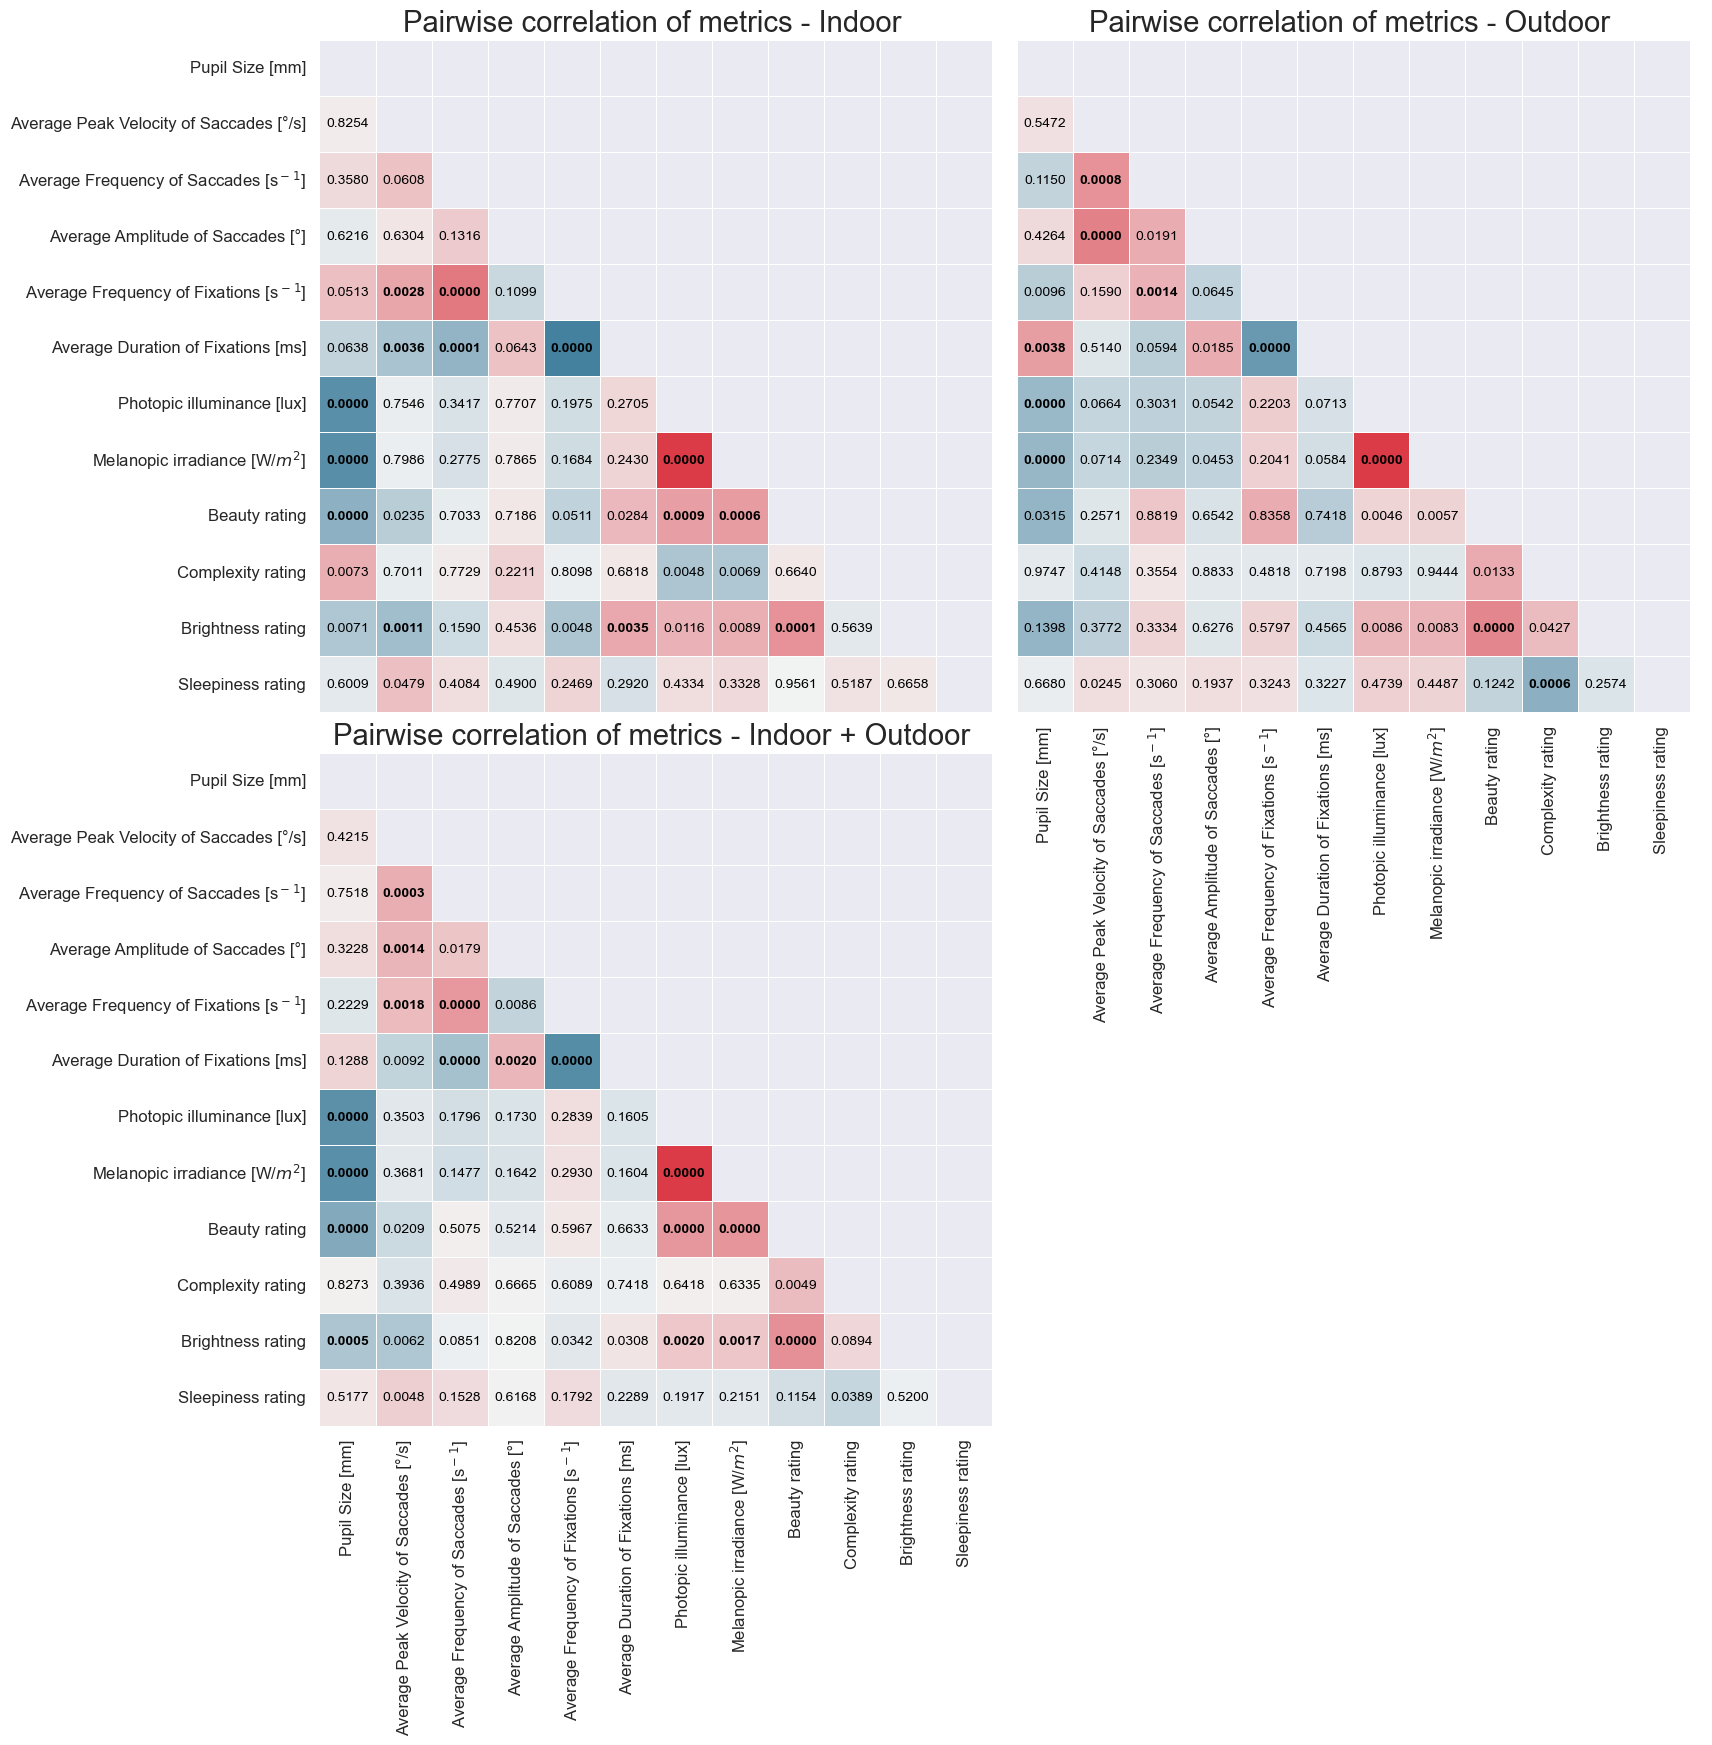

In [397]:
#########P-VALUES in correlation matrix############
####Bonferroni korrigiertes Signifikanzniveau (0.05/66)####
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

fig, axes = plt.subplots(2, 2, figsize=(18, 18))

count = 0
counterin = 0
for i in range(corr_in.shape[0]):
    for j in range(corr_in.shape[1]):
        if mask_in[i, j] == False:  # Only annotate unmasked values
            pvin = p_values[count]
            if pvin <= (0.05/11):
                axes[0, 0].text(j + 0.5, i + 0.5, f"{pvin:.4f}", ha="center", va="center", fontsize=10, weight='bold', color="black", family="Arial")
                counterin = counterin +1
            else:
                axes[0, 0].text(j + 0.5, i + 0.5, f"{pvin:.4f}", ha="center", va="center", fontsize=10, color="black", family="Arial")
            count = count + 3

sns.heatmap(corr_in, mask=mask_in, cmap=cmap_in, vmax=1, cbar=0, ax=axes[0, 0], center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, xticklabels=0, yticklabels=new_column_names)

count = 1
counterout = 0
for i in range(corr_out.shape[0]):
    for j in range(corr_out.shape[1]):
        if mask_out[i, j] == False:  # Only annotate unmasked values
            pvout = p_values[count]
            if pvout <= (0.05/11):
                axes[0, 1].text(j + 0.5, i + 0.5, f"{pvout:.4f}", ha="center", va="center", fontsize=10, weight='bold', color="black", family="Arial")
                counterout = counterout +1
            else:
                axes[0, 1].text(j + 0.5, i + 0.5, f"{pvout:.4f}", ha="center", va="center", fontsize=10, color="black", family="Arial")
            count = count + 3

sns.heatmap(corr_out, mask=mask_out, cmap=cmap_out, vmax=1, cbar=0, ax=axes[0, 1], center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, xticklabels=new_column_names, yticklabels=0)

count = 2
counterall = 0
for i in range(corr_all.shape[0]):
    for j in range(corr_all.shape[1]):
        if mask_all[i, j] == False:  # Only annotate unmasked values
            pvall = p_values[count]
            if pvall <= (0.05/11):
                axes[1, 0].text(j + 0.5, i + 0.5, f"{pvall:.4f}", ha="center", va="center", fontsize=10, weight='bold', color="black", family="Arial")
                counterall = counterall + 1
            else:
                axes[1, 0].text(j + 0.5, i + 0.5, f"{pvall:.4f}", ha="center", va="center", fontsize=10, color="black", family="Arial")
            count = count + 3

sns.heatmap(corr_all, mask=mask_all, cmap=cmap_out, vmax=1, cbar=0, ax=axes[1, 0], center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, xticklabels=new_column_names, yticklabels=new_column_names)

axes[0, 1].set_title('Pairwise correlation of metrics - Outdoor ',fontsize=21)
axes[0, 0].set_title('Pairwise correlation of metrics - Indoor ',fontsize=21)
axes[1, 0].set_title('Pairwise correlation of metrics - Indoor + Outdoor ',fontsize=21)

# Turn off the fourth subplot (axes[1,1])
axes[1, 1].axis('off')

axes[0, 0].tick_params(axis='x', labelsize=12)
axes[0, 0].tick_params(axis='y', labelsize=12)
axes[0, 1].tick_params(axis='x', labelsize=12)
axes[0, 1].tick_params(axis='y', labelsize=12)
axes[1, 0].tick_params(axis='x', labelsize=12)
axes[1, 0].tick_params(axis='y', labelsize=12)
# Adjust spacing between subplots
plt.subplots_adjust(wspace=0, hspace=0.06)
print("IN" + str(counterin))
print("OUT" + str(counterout))
print("ALL" + str(counterall))

# Show the plot
plt.show()

IN14
OUT8
ALL17


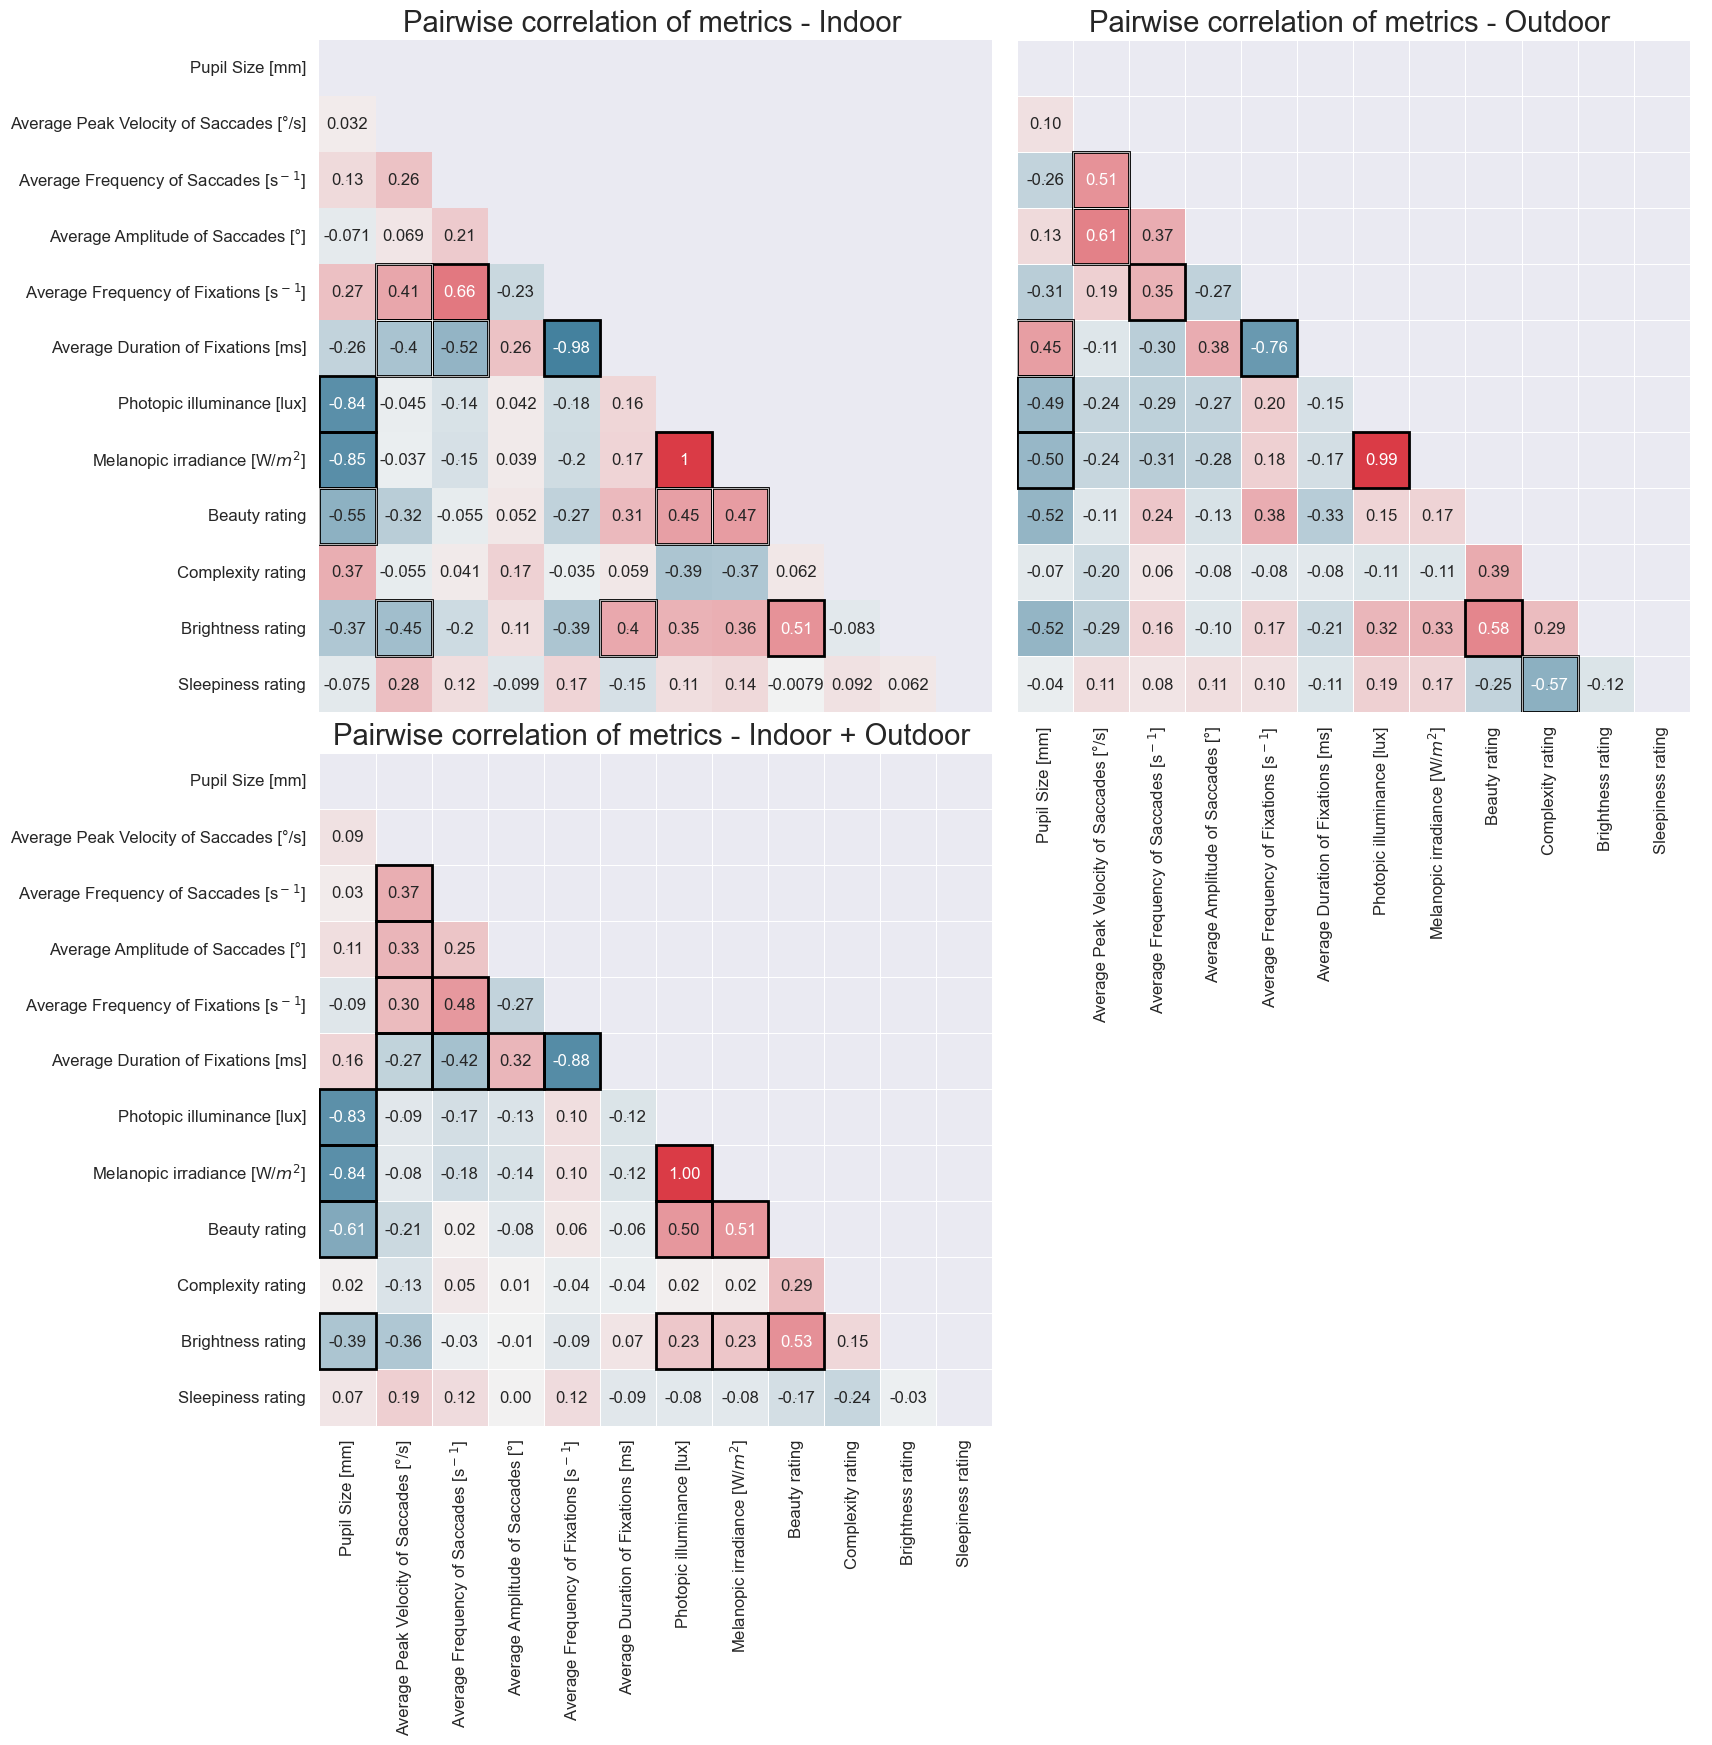

In [484]:
######Correlation matrix with correlation values and framed sqaures to indicate significance
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()

fig, axes = plt.subplots(2, 2, figsize=(18, 18))

corrvalues = ["*", "*", "*", "*", "*", "*", "*", "*", "*", "*", "*", "*","*", "*", "*", "*","*", "*"]

# Define the dimensions of the correlation matrices
n_rows = corr_in.shape[0]
n_cols = corr_in.shape[1]

# Create the mask arrays
mask_in1 = np.zeros((n_rows, n_cols))
mask_in2 = np.zeros((n_rows, n_cols))
mask_out1 = np.zeros((n_rows, n_cols))
mask_out2 = np.zeros((n_rows, n_cols))
mask_all1 = np.zeros((n_rows, n_cols))
mask_all2 = np.zeros((n_rows, n_cols))

# Define the indices for the black squares
black_square_indices_in = [(4, 1), (4, 2), (5, 1), (5, 2), (5, 4),(6, 0),(7, 0),(7, 6),(8, 0),(8, 6),(8, 7),(10, 1),(10, 5),(10, 8)]  # Adjust as needed
black_square_indices_out = [(2, 1), (3, 1), (4, 2), (5, 4), (5, 0),(6, 0),(7, 0),(7, 6),(10, 8),(11, 9)]  # Adjust as needed
black_square_indices_all = [(2, 1), (3, 1),(4, 1), (4, 2), (5, 1), (5, 2), (5, 3),(5, 4),(6, 0),(7, 0),(7, 6),(8, 0),(8, 6),(8, 7),(10, 0),(10, 6),(10, 7),(10, 8)] # Adjust as needed

# Set the corresponding elements in the mask arrays to 1
for idx in black_square_indices_in:
    mask_in1[idx] = 1
for idx in black_square_indices_out:
    mask_out1[idx] = 1
for idx in black_square_indices_all:
    mask_all1[idx] = 1


# Annotate the first heatmap (axes[0,0]) with p-values
count = 0
counterin = 0
corrcounter = 0
for i in range(corr_in.shape[0]):
    for j in range(corr_in.shape[1]):
        if mask_in[i, j] == False:  ## Only annotate unmasked values
            pvin = p_values[count]
            if pvin <= (0.05/11):
                if i in (4,100,111) and j in (2,100,111):
                    continue
                else:
                    pvin = corrvalues[corrcounter]  # Take value from corrvaluesIN
                    #axes[0, 0].text(j + 0.85, i + 0.3, pvin, ha="center", va="center", fontsize=17, weight='bold', color="black", family="Arial")
                    counterin = counterin + 1
                    corrcounter = corrcounter + 1
            else:
                axes[0, 0].text(j + 0.5, i + 0.5, f"{pvout:.2f}", ha="center", va="center", fontsize=0, color="black", family="Arial")  # Empty string
            count = count + 3
        if mask_in1[i, j] == 1:
            rect = plt.Rectangle((j, i), 1,1, linewidth=1, edgecolor='black', facecolor='none')
            axes[0, 0].add_patch(rect)

# Create the first heatmap (axes[0,0]) with the correlation values
sns.heatmap(corr_in, mask=mask_in, cmap=cmap_in, vmax=1, cbar=False, ax=axes[0, 0], center=0, square=True, linewidths=0,
            xticklabels=0, yticklabels=new_column_names, annot=True)

corrcounter = 0

count = 1
counterout = 0
for i in range(corr_out.shape[0]):
    for j in range(corr_out.shape[1]):
        if mask_out[i, j] == False:  # Only annotate unmasked values
                if i == 4:
                    continue
                if i == 6:
                    continue
                if i == 8:
                    continue
                if i == 7:
                    continue
                if i == 5 and j == 3:
                    continue
                if i == 5 and j == 2:
                    continue
                if i == 5 and j == 4:
                    continue
                else:
                    pvout = p_values[count]
                    if pvout <= (0.05/11):
                        pout = corrvalues[corrcounter]  # Take value from corrvaluesIN
                        #axes[0, 1].text(j + 0.85, i + 0.3, pout, ha="center", va="center", fontsize=17, weight='bold', color="black", family="Arial")
                        counterout = counterout +1
                    else:
                        axes[0, 1].text(j + 0.5, i + 0.5, f"{pvout:.2f}", ha="center", va="center", fontsize=0, color="black", family="Arial")
                    count = count + 3
                if mask_out1[i, j] == 1:
                    rect = plt.Rectangle((j, i), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
                    axes[0, 1].add_patch(rect)
                    corrcounter = 0

sns.heatmap(corr_out, mask=mask_out, cmap=cmap_out, vmax=1, cbar=0, ax=axes[0, 1], center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, xticklabels=new_column_names, yticklabels=0, annot=True, fmt=".2f")

count = 2
counterall = 0
for i in range(corr_all.shape[0]):
    for j in range(corr_all.shape[1]):
        if mask_all[i, j] == False:  # Only annotate unmasked values
            pvall = p_values[count]
            if pvall <= (0.05/11):
                pvall = corrvalues[corrcounter]  # Take value from corrvaluesIN
                #axes[1, 0].text(j + 0.85, i + 0.3, pvall, ha="center", va="center", fontsize=17, weight='bold', color="black", family="Arial")
                counterall = counterall + 1
            else:
                axes[1, 0].text(j + 0.5, i + 0.5, f"{pvall:.2f}", ha="center", va="center", fontsize=0, color="black", family="Arial")
            count = count + 3
        if mask_all1[i, j] == 1:
            rect = plt.Rectangle((j, i), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
            axes[1, 0].add_patch(rect)

sns.heatmap(corr_all, mask=mask_all, cmap=cmap_out, vmax=1, cbar=0, ax=axes[1, 0], center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, xticklabels=new_column_names, yticklabels=new_column_names, annot=True, fmt=".2f")


# Draw black frames around specified squares in the first heatmap
for i in range(corr_in.shape[0]):
    for j in range(corr_in.shape[1]):
        if mask_in1[i, j] == 1:
            rect = plt.Rectangle((j, i), 1, 1, linewidth=2, edgecolor='black', facecolor='none')
            axes[0, 0].add_patch(rect)

# Create the second heatmap (axes[0,1]) with the original code and black frames around specified squares
sns.heatmap(corr_out, mask=mask_out, cmap=cmap_out, vmax=1, cbar=False, ax=axes[0, 1], center=0, square=True, linewidths=.5,
            xticklabels=new_column_names, yticklabels=0, annot=False)

for i in range(corr_out.shape[0]):
        for j in range(corr_out.shape[1]):
            if mask_out1[i, j] == 1:
                    rect = plt.Rectangle((j, i), 1, 1, linewidth=2, edgecolor='black', facecolor='none')
                    axes[0, 1].add_patch(rect)

sns.heatmap(corr_all, mask=mask_all, cmap=cmap_out, vmax=1, cbar=False, ax=axes[1, 0], center=0, square=True, linewidths=.5,
            xticklabels=new_column_names, yticklabels=new_column_names, annot=False)


for i in range(corr_all.shape[0]):
    for j in range(corr_all.shape[1]):
        if mask_all1[i, j] == 1:
            rect = plt.Rectangle((j, i), 1, 1, linewidth=2, edgecolor='black', facecolor='none')
            axes[1, 0].add_patch(rect)


            
            
# Define the indices for the ORANGE squares
orange_square_indices_in = [(4, 1), (5, 1), (5, 2),(8, 0),(8, 6),(8, 7),(10, 1),(10, 5)]  # Adjust as needed
orange_square_indices_out = [(2, 1), (3, 1), (5, 0),(11, 9)]  # Adjust as needed
orange_square_indices_all = [(2, 1), (3, 1),(4, 1), (4, 2), (5, 1), (5, 2), (5, 3),(5, 4),(6, 0),(7, 0),(7, 6),(8, 0),(8, 6),(8, 7),(10, 0),(10, 6),(10, 7),(10, 8)] # Adjust as needed

# Set the corresponding elements in the mask arrays to 1
for idx in orange_square_indices_in:
    mask_in2[idx] = 1
for idx in orange_square_indices_out:
    mask_out2[idx] = 1
for idx in orange_square_indices_all:
    mask_all2[idx] = 1

# Draw orange frames around specified squares in the first heatmap
for i in range(corr_in.shape[0]):
    for j in range(corr_in.shape[1]):
        if mask_in2[i, j] == 1:
            rect = plt.Rectangle((j, i), 1, 1, linewidth=0.5, edgecolor='white', facecolor='none')
            axes[0, 0].add_patch(rect)


# Draw black frames around specified squares in the second heatmap
for i in range(corr_out.shape[0]):
        for j in range(corr_out.shape[1]):
            if mask_out2[i, j] == 1:
                    rect = plt.Rectangle((j, i), 1, 1, linewidth=.5, edgecolor='white', facecolor='none')
                    axes[0, 1].add_patch(rect)


axes[0, 1].set_title('Pairwise correlation of metrics - Outdoor ',fontsize=21)
axes[0, 0].set_title('Pairwise correlation of metrics - Indoor ',fontsize=21)
axes[1, 0].set_title('Pairwise correlation of metrics - Indoor + Outdoor ',fontsize=21)

# Turn off the fourth subplot (axes[1,1])
axes[1, 1].axis('off')

#Change label sizes for rows and columns of heatmap
axes[0, 0].tick_params(axis='x', labelsize=12)
axes[0, 0].tick_params(axis='y', labelsize=12)
axes[0, 1].tick_params(axis='x', labelsize=12)
axes[0, 1].tick_params(axis='y', labelsize=12)
axes[1, 0].tick_params(axis='x', labelsize=12)
axes[1, 0].tick_params(axis='y', labelsize=12)
plt.subplots_adjust(wspace=0, hspace=0.06)
#plt.title("Correlation Heatmap - Indoor and Outdoor Condition", fontsize=14)
print("IN" + str(counterin))
print("OUT" + str(counterout))
print("ALL" + str(counterall))

# Show the plot
plt.show()

In [ ]:
###Image analysis Scene 3###
from PIL import Image

# Load the image
image = Image.open("/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/AOI Data/image_analysis/aoi_i3.png")

# Define the target color (in RGB format)
target_color = (69, 69, 69)  # GREEN; RED; BLUE

S3_cupboard1 = (152, 255, 0)  # GREEN; RED; BLUE
S3_cupboard2 = (53, 255, 0)  # GREEN; RED; BLUE
S3_ceiling = (52, 0, 255)  # GREEN; RED; BLUE
S3_plant1 = (255, 0, 113)  # GREEN; RED; BLUE
S3_plant2 = (124, 0, 255)  # GREEN; RED; BLUE
S3_plant3 = (0, 219, 255)  # GREEN; RED; BLUE
S3_plant4 = (0, 255, 19)  # GREEN; RED; BLUE
S3_printer = (80, 255, 0)  # GREEN; RED; BLUE
S3_door = (0, 255, 191)  # GREEN; RED; BLUE
S3_heater1 = (255, 85, 0)  # GREEN; RED; BLUE
S3_heater2 = (255, 184, 0)  # GREEN; RED; BLUE####
S3_window1 = (0, 146, 255)  # GREEN; RED; BLUE
S3_window2 = (179, 255, 0)  # GREEN; RED; BLUE
S3_window3 = (255, 0, 86)  # GREEN; RED; BLUE
S3_light1 = (0, 20, 255)  # GREEN; RED; BLUE
S3_light2 = (251, 0, 255)  # GREEN; RED; BLUE
S3_fex = (0, 47, 255)  # GREEN; RED; BLUE
S3_fexsign = (255, 0, 186)  # GREEN; RED; BLUE
S3_jackets = (255, 158, 0)  # GREEN; RED; BLUE
S3_tv = (255, 58, 0)  # GREEN; RED; BLUE
S3_tvstand = (0, 255, 45)  # GREEN; RED; BLU
S3_table1 = (25, 0, 255)  # GREEN; RED; BLUE
S3_table2 = (255, 0, 212)  # GREEN; RED; BLUE

# Define a list of target colors (in RGB format)
aoi_s3 = [S3_cupboard1,S3_cupboard2,S3_ceiling,S3_plant1,S3_plant2,S3_plant3,S3_plant4,
         S3_printer,S3_door,S3_heater1,S3_heater2,S3_window1,S3_window2,S3_window3,
         S3_light1,S3_light2,S3_fex,S3_fexsign,S3_jackets,S3_tv,S3_tvstand,S3_table1,
         S3_table2]
# Define a tolerance level for color matching
tolerance = 0  # You can adjust this value based on your needs

# Initialize a dictionary to store counts for each target color
color_counts = {tuple(target_color): 0 for target_color in aoi_s3}
data = []
# Iterate through the pixels
for x in range(image.width):
    for y in range(image.height):
        pixel_color = image.getpixel((x, y))
        # Check if the pixel color matches any of the target colors within the tolerance
        for target_color in aoi_s3:
            if all(abs(pixel_color[i] - target_color[i]) <= tolerance for i in range(3)):
                color_counts[tuple(target_color)] += 1
image_size = image.width*image.height

# Print the counts for each target color
for target_color, count in color_counts.items():
    data.append(count/image_size)
    print(f"Number of pixels matching {target_color}: {count/image_size}")
print(data)
#aoi_s3 = [S3_cupboard1,S3_cupboard2,S3_ceiling,S3_plant1,S3_plant2,S3_plant3,S3_plant4,
         #S3_printer,S3_door,S3_heater1,S3_heater2,S3_window1,S3_window2,S3_window3,
         #S3_light1,S3_light2,S3_fex,S3_fexsign,S3_jackets,S3_tv,S3_tvstand,S3_table1,
         #S3_table2]
# Dateiname für die CSV-Datei
import csv
csv_file = 'aoi_data_I3.csv'

# CSV-Datei öffnen und Daten schreiben
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Schreibe die Daten Zeile für Zeile (Liste von Listen)
    writer.writerows([data])

print(f'Die CSV-Datei mit den Pixelzählungen wurde erfolgreich erstellt und in "{csv_file}" gespeichert.')


In [ ]:
###Image analysis Scene2###
from PIL import Image

# Load the image
image = Image.open("/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/AOI Data/image_analysis/aoi_i2.png")
S2_Ceiling = (255, 0, 73)  # GREEN; RED; BLUE
S2_door = (0, 255, 31)  # GREEN; RED; BLUE
S2_Elevator = (40, 255, 0)  # GREEN; RED; BLUE
S2_Floor = (0, 255, 58)  # GREEN; RED; BLUE
S2_railing = (255, 197, 0)  # GREEN; RED; BLUE
S2_heater = (164, 0, 255)  # GREEN; RED; BLUE
S2_light1 = (255, 0, 173)  # GREEN; RED; BLUE
S2_light2 = (255, 98, 0)  # GREEN; RED; BLUE
S2_light3 = (140, 255, 0)  # GREEN; RED; BLUE
S2_Painting = (0, 34, 255)  # GREEN; RED; BLUE
S2_Plant1 = (255, 0, 1)  # GREEN; RED; BLUE
S2_Plant2 = (239, 255, 0)  # GREEN; RED; BLUE
S2_sign = (65, 0, 255)  # GREEN; RED; BLUE
S2_wall1 = (0, 255, 230)  # GREEN; RED; BLUE
S2_wall2 = (0, 255, 131)  # GREEN; RED; BLUE
S2_windows = (0, 206, 255)  # GREEN; RED; BLUE


# Define a list of target colors (in RGB format)
aoi_s1 = [S2_Ceiling,S2_door,S2_Elevator,S2_Floor,S2_railing,S2_heater,S2_light1,
         S2_light2,S2_light3,S2_Painting,S2_Plant1,S2_Plant2,S2_sign,S2_wall1,S2_wall2,S2_windows]
# Define a tolerance level for color matching
tolerance = 0  # You can adjust this value based on your needs

# Initialize a dictionary to store counts for each target color
color_counts = {tuple(target_color): 0 for target_color in aoi_s1}

# Iterate through the pixels
for x in range(image.width):
    for y in range(image.height):
        pixel_color = image.getpixel((x, y))
        # Check if the pixel color matches any of the target colors within the tolerance
        for target_color in aoi_s1:
            if all(abs(pixel_color[i] - target_color[i]) <= tolerance for i in range(3)):
                color_counts[tuple(target_color)] += 1
image_size = image.width*image.height
# Print the counts for each target color
data=[]
for target_color, count in color_counts.items():
    data.append(count/image_size)
    print(f"Number of pixels matching {target_color}: {count/image_size}")
########aoi_s1 = [S1_sphere,S1_wall,S1_screen1,S1_screen2,S1_computers,S1_fridges,S1_whiteboard,
########S1_floor,S1_ceiling,S1_shelf]
import csv
csv_file = 'aoi_data_I2.csv'

# CSV-Datei öffnen und Daten schreiben
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Schreibe die Daten Zeile für Zeile (Liste von Listen)
    writer.writerows([data])

print(f'Die CSV-Datei mit den Pixelzählungen wurde erfolgreich erstellt und in "{csv_file}" gespeichert.')


In [2]:
###Image analysis Scene 4###
from PIL import Image

# Load the image
image = Image.open("/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/AOI Data/image_analysis/aoi_o1.png")

# Define the target color (in RGB format)
target_color = (69, 69, 69)  # GREEN; RED; BLUE

S4_tree1 = (0, 77, 255)  # GREEN; RED; BLUE
S4_tree2 = (110, 255, 0)  # GREEN; RED; BLUE
S4_tree3 = (255, 0, 44)  # GREEN; RED; BLUE
S4_grass = (21, 0, 255)  # GREEN; RED; BLUE
S4_construction = (0, 249, 255)  # GREEN; RED; BLUE
S4_workshop = (0, 150, 255)  # GREEN; RED; BLUE
S4_road = (0, 255, 87)  # GREEN; RED; BLUE
S4_is = (121, 0, 255)  # GREEN; RED; BLUE
S4_sky = (193, 0, 255)  # GREEN; RED; BLUE
S4_wall1 = (255, 0, 216)  # GREEN; RED; BLUE
S4_wall2 = (255, 54, 0)  # GREEN; RED; BLUE
S4_bio = (183, 255, 0)  # GREEN; RED; BLUE
S4_fml1 = (11, 255, 0)  # GREEN; RED; BLUE
S4_fml2 = (63, 255, 0)  # GREEN; RED; BLUE



# Define a list of target colors (in RGB format)
aoi_s4 = [S4_tree1,S4_tree2,S4_tree3,S4_grass,S4_construction,S4_workshop,S4_road,
         S4_is,S4_sky,S4_wall1,S4_wall2,S4_bio,S4_fml1,S4_fml2]
# Define a tolerance level for color matching
tolerance = 0  # You can adjust this value based on your needs

# Initialize a dictionary to store counts for each target color
color_counts = {tuple(target_color): 0 for target_color in aoi_s4}

# Iterate through the pixels
for x in range(image.width):
    for y in range(image.height):
        pixel_color = image.getpixel((x, y))
        # Check if the pixel color matches any of the target colors within the tolerance
        for target_color in aoi_s4:
            if all(abs(pixel_color[i] - target_color[i]) <= tolerance for i in range(3)):
                color_counts[tuple(target_color)] += 1
image_size = image.width*image.height

data=[]
for target_color, count in color_counts.items():
    data.append(count/image_size)
    print(f"Number of pixels matching {target_color}: {count/image_size}")
########aoi_s1 = [S1_sphere,S1_wall,S1_screen1,S1_screen2,S1_computers,S1_fridges,S1_whiteboard,
########S1_floor,S1_ceiling,S1_shelf]
import csv
csv_file = 'aoi_data_O1.csv'

# CSV-Datei öffnen und Daten schreiben
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Schreibe die Daten Zeile für Zeile (Liste von Listen)
    writer.writerows([data])

print(f'Die CSV-Datei mit den Pixelzählungen wurde erfolgreich erstellt und in "{csv_file}" gespeichert.')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/AOI Data/image_analysis/aoi_o1.png'

In [ ]:
###Image analysis Scene 5###
from PIL import Image

# Load the image
image = Image.open("/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/AOI Data/image_analysis/aoi_o2.png")

# Define the target color (in RGB format)
target_color = (69, 69, 69)  # GREEN; RED; BLUE

S5_sah = (99, 255, 0)  # GREEN; RED; BLUE
S5_suh = (106, 0, 255)  # GREEN; RED; BLUE
S5_buiback1 = (0, 255, 165)  # GREEN; RED; BLUE
S5_buiback2 = (255, 232, 0)  # GREEN; RED; BLUE
S5_forest = (0, 244, 255)  # GREEN; RED; BLUE
S5_parkinglot = (255, 0, 211)  # GREEN; RED; BLUE
S5_greenarea1 = (78, 255, 0)  # GREEN; RED; BLUE
S5_greenarea2 = (255,0,111)
S5_greenarea3 = (126,0,255)
S5_greenarea4 = (0,144,255)
S5_cyberneum = (0, 72, 255)  # GREEN; RED; BLUE
S5_sky = (255, 0, 12)  # GREEN; RED; BLUE
S5_road1 = (255, 60, 0)  # GREEN; RED; BLUE
S5_road2 = (178, 255, 0)  # GREEN; RED; BLUE
S5_buifront1 = (255, 0, 39)  # GREEN; RED; BLUE
S5_buifront2 = (0, 45, 255)  # GREEN; RED; BLUE
S5_stairs = (255, 159, 0)  # GREEN; RED; BLUE
S5_trees = (226, 0, 255)  # GREEN; RED; BLUE



# Define a list of target colors (in RGB format)
aoi_s5 = [S5_sah,S5_suh,S5_buiback1,S5_buiback2,S5_forest,S5_parkinglot,S5_greenarea1,
         S5_greenarea2,S5_greenarea3,S5_greenarea4,S5_cyberneum,S5_sky,S5_road1,S5_road2, 
         S5_buifront1,S5_buifront2,S5_stairs,S5_trees]
# Define a tolerance level for color matching
tolerance = 0  # You can adjust this value based on your needs

# Initialize a dictionary to store counts for each target color
color_counts = {tuple(target_color): 0 for target_color in aoi_s5}

# Iterate through the pixels
for x in range(image.width):
    for y in range(image.height):
        pixel_color = image.getpixel((x, y))
        # Check if the pixel color matches any of the target colors within the tolerance
        for target_color in aoi_s5:
            if all(abs(pixel_color[i] - target_color[i]) <= tolerance for i in range(3)):
                color_counts[tuple(target_color)] += 1
image_size = image.width*image.height

data=[]
for target_color, count in color_counts.items():
    data.append(count/image_size)
    print(f"Number of pixels matching {target_color}: {count/image_size}")
########aoi_s1 = [S1_sphere,S1_wall,S1_screen1,S1_screen2,S1_computers,S1_fridges,S1_whiteboard,
########S1_floor,S1_ceiling,S1_shelf]
import csv
csv_file = 'aoi_data_O2.csv'

# CSV-Datei öffnen und Daten schreiben
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Schreibe die Daten Zeile für Zeile (Liste von Listen)
    writer.writerows([data])

print(f'Die CSV-Datei mit den Pixelzählungen wurde erfolgreich erstellt und in "{csv_file}" gespeichert.')
# Define a list of target colors (in RGB format)
aoi_s5 = [S5_sah,S5_suh,S5_buiback1,S5_buiback2,S5_forest,S5_parkinglot,S5_greenarea1,
         S5_greenarea2,S5_greenarea3,S5_greenarea4,S5_cyberneum,S5_sky,S5_road1,S5_road2, 
         S5_buifront1,S5_buifront2,S5_stairs,S5_trees]

In [1]:
###Image analysis Scene 6###
from PIL import Image

# Load the image
image = Image.open("/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/AOI Data/image_analysis/aoi_o3.png")

# Define the target color (in RGB format)
target_color = (69, 69, 69)  # GREEN; RED; BLUE

S6_sah = (0, 255, 144)  # GREEN; RED; BLUE
S6_suh = (127, 255, 0)  # GREEN; RED; BLUE
S6_buiback = (0, 255, 114)  # GREEN; RED; BLUE
S6_road1 = (0, 255, 14)  # GREEN; RED; BLUE
S6_road2 = (255,253,0)
S6_road3 = (0,223,255)
S6_road4 = (48,0,255)
S6_road5 = (0,51,255)
S6_road6 = (120,0,255)
S6_road7 = (0,150,255)
S6_road8 = (84,255,0)
S6_crossing = (255,0,117)
S6_green1 = (255,54,0)
S6_green2 = (255,0,217)
S6_green3 = (21,0,255)
S6_green4 = (255,81,0)
S6_roadmarkings = (0,255,186)
S6_sky = (157, 255, 0)  # GREEN; RED; BLUE
S6_trees = (255, 0, 18)  # GREEN; RED; BLUE



# Define a list of target colors (in RGB format)
aoi_s6 = [S6_sah,S6_suh,S6_buiback,S6_road1,S6_road2,S6_road3,S6_road4,
         S6_road5,S6_road6,S6_road7,S6_road8,S6_crossing,S6_green1,S6_green2, 
         S6_green3,S6_green4,S6_roadmarkings,S6_sky,S6_trees]
# Define a tolerance level for color matching
tolerance = 0  # You can adjust this value based on your needs

# Initialize a dictionary to store counts for each target color
color_counts = {tuple(target_color): 0 for target_color in aoi_s6}

# Iterate through the pixels
for x in range(image.width):
    for y in range(image.height):
        pixel_color = image.getpixel((x, y))
        # Check if the pixel color matches any of the target colors within the tolerance
        for target_color in aoi_s6:
            if all(abs(pixel_color[i] - target_color[i]) <= tolerance for i in range(3)):
                color_counts[tuple(target_color)] += 1
image_size = image.width*image.height

data=[]
for target_color, count in color_counts.items():
    data.append(count/image_size)
    print(f"Number of pixels matching {target_color}: {count/image_size}")
########aoi_s1 = [S1_sphere,S1_wall,S1_screen1,S1_screen2,S1_computers,S1_fridges,S1_whiteboard,
########S1_floor,S1_ceiling,S1_shelf]
import csv
csv_file = 'aoi_data_O3.csv'

# CSV-Datei öffnen und Daten schreiben
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Schreibe die Daten Zeile für Zeile (Liste von Listen)
    writer.writerows([data])

print(f'Die CSV-Datei mit den Pixelzählungen wurde erfolgreich erstellt und in "{csv_file}" gespeichert.')
# Define a list of target colors (in RGB format)
aoi_s6 = [S6_sah,S6_suh,S6_buiback,S6_road1,S6_road2,S6_road3,S6_road4,
         S6_road5,S6_road6,S6_road7,S6_road8,S6_crossing,S6_green1,S6_green2, 
         S6_green3,S6_green4,S6_roadmarkings,S6_sky,S6_trees]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/AOI Data/image_analysis/aoi_o3.png'

In [ ]:
#beauty
dataset_Q1_in = S1_Q1+S2_Q1+S3_Q1
dataset_Q1_out = S4_Q1+S5_Q1+S6_Q1

import numpy as np
from scipy import stats

# Example data for dataset_Q1_in and dataset_Q1_out


# Perform Welch's t-test
t_statistic, p_value = stats.ttest_ind(dataset_Q1_in, dataset_Q1_out, equal_var=False)

# Print the results
print("Welch's T-statistic Q1:", t_statistic)
print("P-value Q1:", p_value)

#brightness
dataset_Q1_in = S1_Q2+S2_Q2+S3_Q2
dataset_Q1_out = S4_Q2+S5_Q2+S6_Q2

import numpy as np
from scipy import stats

# Example data for dataset_Q1_in and dataset_Q1_out


# Perform Welch's t-test
t_statistic, p_value = stats.ttest_ind(dataset_Q1_in, dataset_Q1_out, equal_var=False)

# Print the results
print("Welch's T-statistic Q2:", t_statistic)
print("P-value Q2:", p_value)

#comfort
dataset_Q1_in = S1_Q3+S2_Q3+S3_Q3
dataset_Q1_out = S4_Q3+S5_Q3+S6_Q3

import numpy as np
from scipy import stats

# Example data for dataset_Q1_in and dataset_Q1_out


# Perform Welch's t-test
t_statistic, p_value = stats.ttest_ind(dataset_Q1_in, dataset_Q1_out, equal_var=False)

# Print the results
print("Welch's T-statistic Q3:", t_statistic)
print("P-value Q3:", p_value)

#complexity
dataset_Q1_in = S1_Q4+S2_Q4+S3_Q4
dataset_Q1_out = S4_Q4+S5_Q4+S6_Q4

import numpy as np
from scipy import stats

# Example data for dataset_Q1_in and dataset_Q1_out


# Perform Welch's t-test
t_statistic, p_value = stats.ttest_ind(dataset_Q1_in, dataset_Q1_out, equal_var=False)

# Print the results
print("Welch's T-statistic Q4:", t_statistic)
print("P-value Q4:", p_value)

#sleepiness
dataset_Q1_in = S1_Q5+S2_Q5+S3_Q5
dataset_Q1_out = S4_Q5+S5_Q5+S6_Q5

import numpy as np
from scipy import stats

# Example data for dataset_Q1_in and dataset_Q1_out


# Perform Welch's t-test
t_statistic, p_value = stats.ttest_ind(dataset_Q1_in, dataset_Q1_out, equal_var=False)

# Print the results
print("Welch's T-statistic Q5:", t_statistic)
print("P-value Q5:", p_value)

In [282]:
####MEANS INDOOR VS OUTDOOR####
import statistics
pupil_in = avr_pupil_S1+avr_pupil_S2+avr_pupil_S3
pupil_out = avr_pupil_S4+avr_pupil_S5+avr_pupil_S6
freqfix_in = freq_fix_S1+freq_fix_S2+freq_fix_S3
freqfix_out = freq_fix_S4+freq_fix_S5+freq_fix_S6
dur_in = avg_fix_dur_S1+avg_fix_dur_S2+avg_fix_dur_S3
dur_out = avr_fix_dur_S4+avr_fix_dur_S5+avr_dur_fix_S6
freq_in = freq_sacc_S1+freq_sacc_S2+freq_sacc_S3
freq_out = freq_sacc_S4+freq_sacc_S5+freq_sacc_S6
amp_in = avr_amp_S1+avr_amp_S2+avr_amp_S3
amp_out = avr_amp_S4+avr_amp_S5+avr_amp_S6
velo_in = avr_peak_velo_S1+avr_peak_velo_S2+avr_peak_velo_S3
velo_out = avr_peak_velo_S4+avr_peak_velo_S5+avr_peak_velo_S6

#Mean Pupil size Indoor
print("Mean Pupil size Indoor = " + str(mean_pupil_in))
std_deviation = statistics.stdev(pupil_in)
print(std_deviation)
#Mean Pupil size Outdoor
print("Mean Pupil size Outdoor = " + str(mean_pupil_out))
std_deviation = statistics.stdev(pupil_out)
print(std_deviation)
#Mean ADF Indoor
print("Mean ADF Indoor = " + str(mean_dur_in))
std_deviation = statistics.stdev(dur_in)
print(std_deviation)
#Mean ADF Outdoor
print("Mean ADF Outdoor = " + str(mean_dur_out))
std_deviation = statistics.stdev(dur_out)
print(std_deviation)
#Mean AFF Indoor
print("Mean Fixation Frequency Indoor = " + str(mean_freqfix_in))
std_deviation = statistics.stdev(freqfix_in)
print(std_deviation)
#Mean AFF Outdoor
print("Mean Fixation Frequency Outdoor = " + str(mean_freqfix_out))
std_deviation = statistics.stdev(freqfix_out)
print(std_deviation)
#Mean ASF Indoor
print("Mean ASF Indoor = " + str(mean_freq_in))
std_deviation = statistics.stdev(freq_in)
print(std_deviation)
#Mean ASF Outdoor
print("Mean ASF Outdoor = " + str(mean_freq_out))
std_deviation = statistics.stdev(freq_out)
print(std_deviation)
#Mean ASA Indoor
print("Mean ASA Indoor = " + str(mean_amp_in))
std_deviation = statistics.stdev(amp_in)
print(std_deviation)
#Mean ASA Outdoor
print("Mean ASA Outdoor = " + str(mean_amp_out))
std_deviation = statistics.stdev(amp_out)
print(std_deviation)
#Mean APVS Indoor
print("Mean APVS Indoor = " + str(mean_velo_in))
std_deviation = statistics.stdev(velo_in)
print(std_deviation)
#Mean APVS Outdoor
print("Mean APVS Outdoor = " + str(mean_velo_out))
std_deviation = statistics.stdev(velo_out)
print(std_deviation)


Mean Pupil size Indoor = 2.885654509803922
0.7139050553268655
Mean Pupil size Outdoor = 2.067477948717949
0.32382097928834147
Mean ADF Indoor = 653.7254901960785
421.1128152137559
Mean ADF Outdoor = 524.0
214.44518376989785
Mean Fixation Frequency Indoor = 1.5868170303963305
0.5297505229276044
Mean Fixation Frequency Outdoor = 1.7468205378440484
0.5099607579242932
Mean ASF Indoor = 1.0712804218034182
0.3466112834838187
Mean ASF Outdoor = 1.0298572854932186
0.2997580132667029
Mean ASA Indoor = 7.351372549019609
1.1674399678062133
Mean ASA Outdoor = 6.936666666666666
1.3879335895938274
Mean APVS Indoor = 220.41450980392156
19.910852549675063
Mean APVS Outdoor = 217.7994871794872
21.155133624665737
